In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import *
from math import sqrt
from matplotlib import pyplot
import numpy as np

In [2]:
df = pd.read_csv('CAP5.csv')
df["datetime"] = pd.to_datetime(df["datetime"],format = "%Y-%m-%d %H:%M:%S")
df.drop(["datetime","cycle","ambient_temperature"],inplace=True,axis=1)
ds = df.values
ds = ds.astype('float32')

In [3]:
train_size = int(len(ds) * 0.9) 
train_dataset, test_dataset = ds[0:train_size,:], ds[train_size:len(ds),:]

In [38]:
def exp(step_back,repeat_num,neuron_number,epochs,batch_number):
    arr = []
    for i in range(repeat_num):
        X_train, Y_train = [], []
        for i in range(len(train_dataset)-step_back - 1):
            a = train_dataset[i:(i+step_back), 0]
            X_train.append(a)
            Y_train.append(train_dataset[i + step_back, 0])
        X_train = np.array(X_train)
        Y_train = np.array(Y_train)
        X_test, Y_test = [], []
        for i in range(len(test_dataset)-step_back - 1):
            a = test_dataset[i:(i+step_back), 0]
            X_test.append(a)
            Y_test.append(test_dataset[i + step_back, 0])
        X_test = np.array(X_test)
        Y_test = np.array(Y_test)
        model = Sequential()
        model.add(InputLayer((step_back,1)))
        model.add(LSTM(neuron_number))
        #model.add(Dense(neuron_number_2, 'relu'))
        #model.add(layers.BatchNormalization())
        model.add(Dense(units = 1))
        model.summary()
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(X_train, Y_train, epochs=epochs,verbose=2)   
        trainScore = model.evaluate(X_train, Y_train, verbose=1)
        print('Train Score: %.4f MSE (%.5f RMSE)' % (trainScore, np.sqrt(trainScore)))
        testScore = model.evaluate(X_test, Y_test, verbose=1)
        print('Test Score: %.4f MSE (%.5f RMSE)' % (testScore, np.sqrt(testScore)))
        arr.append(np.sqrt(testScore))
    return arr

In [39]:
import seaborn as sns 
#step_back_number
dic = {}
for i in [2,3,4,5,6,7,8,9,10,15]:
    dic[i] = exp(i,5,128,100,2)
df_1 = pd.DataFrame(dic)
df_melted = pd.melt(df_1)

Model: "sequential_139"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_139 (LSTM)             (None, 128)               66560     
                                                                 
 dense_226 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 1s - loss: 2.3295 - 1s/epoch - 299ms/step
Epoch 2/100
5/5 - 0s - loss: 1.8865 - 21ms/epoch - 4ms/step
Epoch 3/100
5/5 - 0s - loss: 1.4758 - 24ms/epoch - 5ms/step
Epoch 4/100
5/5 - 0s - loss: 1.0960 - 23ms/epoch - 5ms/step
Epoch 5/100
5/5 - 0s - loss: 0.7380 - 25ms/epoch - 5ms/step
Epoch 6/100
5/5 - 0s - loss: 0.4180 - 23ms/epoch - 5ms/step
Epoch 7/100
5/5 - 0s - loss: 0.1689 - 24ms/epoch - 5ms/step
Epoch 8/100
5/5 - 0s - l

Epoch 5/100
5/5 - 0s - loss: 0.6118 - 22ms/epoch - 4ms/step
Epoch 6/100
5/5 - 0s - loss: 0.3064 - 21ms/epoch - 4ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0970 - 19ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0080 - 19ms/epoch - 4ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0155 - 19ms/epoch - 4ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0367 - 19ms/epoch - 4ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0266 - 18ms/epoch - 4ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0076 - 18ms/epoch - 4ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0012 - 16ms/epoch - 3ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0030 - 16ms/epoch - 3ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0043 - 16ms/epoch - 3ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0030 - 16ms/epoch - 3ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0014 - 18ms/epoch - 4ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0010 - 17ms/epoch - 3ms/step
Epoch 19/100
5/5 - 0s - loss: 0.0013 - 16ms/epoch - 3ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0013 - 15ms/epoch - 3ms/step
Epoch 21/100
5/5 - 0s - loss:

Epoch 20/100
5/5 - 0s - loss: 0.0012 - 21ms/epoch - 4ms/step
Epoch 21/100
5/5 - 0s - loss: 0.0010 - 20ms/epoch - 4ms/step
Epoch 22/100
5/5 - 0s - loss: 8.8950e-04 - 16ms/epoch - 3ms/step
Epoch 23/100
5/5 - 0s - loss: 8.4847e-04 - 17ms/epoch - 3ms/step
Epoch 24/100
5/5 - 0s - loss: 8.8212e-04 - 17ms/epoch - 3ms/step
Epoch 25/100
5/5 - 0s - loss: 8.7017e-04 - 17ms/epoch - 3ms/step
Epoch 26/100
5/5 - 0s - loss: 8.4649e-04 - 15ms/epoch - 3ms/step
Epoch 27/100
5/5 - 0s - loss: 8.3386e-04 - 15ms/epoch - 3ms/step
Epoch 28/100
5/5 - 0s - loss: 8.3373e-04 - 16ms/epoch - 3ms/step
Epoch 29/100
5/5 - 0s - loss: 8.3182e-04 - 15ms/epoch - 3ms/step
Epoch 30/100
5/5 - 0s - loss: 8.2074e-04 - 16ms/epoch - 3ms/step
Epoch 31/100
5/5 - 0s - loss: 8.1652e-04 - 15ms/epoch - 3ms/step
Epoch 32/100
5/5 - 0s - loss: 8.1002e-04 - 16ms/epoch - 3ms/step
Epoch 33/100
5/5 - 0s - loss: 8.0496e-04 - 16ms/epoch - 3ms/step
Epoch 34/100
5/5 - 0s - loss: 8.0007e-04 - 15ms/epoch - 3ms/step
Epoch 35/100
5/5 - 0s - loss: 7.9

Epoch 35/100
5/5 - 0s - loss: 0.0012 - 20ms/epoch - 4ms/step
Epoch 36/100
5/5 - 0s - loss: 0.0012 - 21ms/epoch - 4ms/step
Epoch 37/100
5/5 - 0s - loss: 0.0012 - 29ms/epoch - 6ms/step
Epoch 38/100
5/5 - 0s - loss: 0.0011 - 24ms/epoch - 5ms/step
Epoch 39/100
5/5 - 0s - loss: 0.0011 - 20ms/epoch - 4ms/step
Epoch 40/100
5/5 - 0s - loss: 0.0011 - 20ms/epoch - 4ms/step
Epoch 41/100
5/5 - 0s - loss: 0.0011 - 21ms/epoch - 4ms/step
Epoch 42/100
5/5 - 0s - loss: 0.0011 - 16ms/epoch - 3ms/step
Epoch 43/100
5/5 - 0s - loss: 0.0011 - 19ms/epoch - 4ms/step
Epoch 44/100
5/5 - 0s - loss: 0.0011 - 21ms/epoch - 4ms/step
Epoch 45/100
5/5 - 0s - loss: 0.0011 - 23ms/epoch - 5ms/step
Epoch 46/100
5/5 - 0s - loss: 0.0011 - 23ms/epoch - 5ms/step
Epoch 47/100
5/5 - 0s - loss: 0.0011 - 22ms/epoch - 4ms/step
Epoch 48/100
5/5 - 0s - loss: 0.0011 - 23ms/epoch - 5ms/step
Epoch 49/100
5/5 - 0s - loss: 0.0011 - 20ms/epoch - 4ms/step
Epoch 50/100
5/5 - 0s - loss: 0.0010 - 21ms/epoch - 4ms/step
Epoch 51/100
5/5 - 0s - 

Epoch 52/100
5/5 - 0s - loss: 9.7224e-04 - 22ms/epoch - 4ms/step
Epoch 53/100
5/5 - 0s - loss: 9.6523e-04 - 24ms/epoch - 5ms/step
Epoch 54/100
5/5 - 0s - loss: 9.5719e-04 - 21ms/epoch - 4ms/step
Epoch 55/100
5/5 - 0s - loss: 9.5075e-04 - 23ms/epoch - 5ms/step
Epoch 56/100
5/5 - 0s - loss: 9.4068e-04 - 23ms/epoch - 5ms/step
Epoch 57/100
5/5 - 0s - loss: 9.3338e-04 - 22ms/epoch - 4ms/step
Epoch 58/100
5/5 - 0s - loss: 9.2727e-04 - 22ms/epoch - 4ms/step
Epoch 59/100
5/5 - 0s - loss: 9.1908e-04 - 22ms/epoch - 4ms/step
Epoch 60/100
5/5 - 0s - loss: 9.1000e-04 - 24ms/epoch - 5ms/step
Epoch 61/100
5/5 - 0s - loss: 9.0267e-04 - 21ms/epoch - 4ms/step
Epoch 62/100
5/5 - 0s - loss: 8.9484e-04 - 22ms/epoch - 4ms/step
Epoch 63/100
5/5 - 0s - loss: 8.8821e-04 - 21ms/epoch - 4ms/step
Epoch 64/100
5/5 - 0s - loss: 8.8044e-04 - 21ms/epoch - 4ms/step
Epoch 65/100
5/5 - 0s - loss: 8.7175e-04 - 23ms/epoch - 5ms/step
Epoch 66/100
5/5 - 0s - loss: 8.6661e-04 - 22ms/epoch - 4ms/step
Epoch 67/100
5/5 - 0s - l

Epoch 66/100
5/5 - 0s - loss: 3.6208e-04 - 21ms/epoch - 4ms/step
Epoch 67/100
5/5 - 0s - loss: 3.5789e-04 - 20ms/epoch - 4ms/step
Epoch 68/100
5/5 - 0s - loss: 3.5621e-04 - 19ms/epoch - 4ms/step
Epoch 69/100
5/5 - 0s - loss: 3.5102e-04 - 20ms/epoch - 4ms/step
Epoch 70/100
5/5 - 0s - loss: 3.5064e-04 - 20ms/epoch - 4ms/step
Epoch 71/100
5/5 - 0s - loss: 3.4593e-04 - 20ms/epoch - 4ms/step
Epoch 72/100
5/5 - 0s - loss: 3.4652e-04 - 19ms/epoch - 4ms/step
Epoch 73/100
5/5 - 0s - loss: 3.4289e-04 - 21ms/epoch - 4ms/step
Epoch 74/100
5/5 - 0s - loss: 3.3801e-04 - 20ms/epoch - 4ms/step
Epoch 75/100
5/5 - 0s - loss: 3.3660e-04 - 20ms/epoch - 4ms/step
Epoch 76/100
5/5 - 0s - loss: 3.3364e-04 - 21ms/epoch - 4ms/step
Epoch 77/100
5/5 - 0s - loss: 3.3435e-04 - 20ms/epoch - 4ms/step
Epoch 78/100
5/5 - 0s - loss: 3.2454e-04 - 19ms/epoch - 4ms/step
Epoch 79/100
5/5 - 0s - loss: 3.2896e-04 - 19ms/epoch - 4ms/step
Epoch 80/100
5/5 - 0s - loss: 3.1917e-04 - 20ms/epoch - 4ms/step
Epoch 81/100
5/5 - 0s - l

5/5 - 0s - loss: 3.8369e-04 - 23ms/epoch - 5ms/step
Epoch 80/100
5/5 - 0s - loss: 3.7935e-04 - 23ms/epoch - 5ms/step
Epoch 81/100
5/5 - 0s - loss: 3.7519e-04 - 22ms/epoch - 4ms/step
Epoch 82/100
5/5 - 0s - loss: 3.7324e-04 - 22ms/epoch - 4ms/step
Epoch 83/100
5/5 - 0s - loss: 3.6775e-04 - 20ms/epoch - 4ms/step
Epoch 84/100
5/5 - 0s - loss: 3.6515e-04 - 21ms/epoch - 4ms/step
Epoch 85/100
5/5 - 0s - loss: 3.6061e-04 - 22ms/epoch - 4ms/step
Epoch 86/100
5/5 - 0s - loss: 3.6058e-04 - 22ms/epoch - 4ms/step
Epoch 87/100
5/5 - 0s - loss: 3.5568e-04 - 21ms/epoch - 4ms/step
Epoch 88/100
5/5 - 0s - loss: 3.5226e-04 - 23ms/epoch - 5ms/step
Epoch 89/100
5/5 - 0s - loss: 3.4692e-04 - 22ms/epoch - 4ms/step
Epoch 90/100
5/5 - 0s - loss: 3.4812e-04 - 22ms/epoch - 4ms/step
Epoch 91/100
5/5 - 0s - loss: 3.5002e-04 - 22ms/epoch - 4ms/step
Epoch 92/100
5/5 - 0s - loss: 3.4253e-04 - 21ms/epoch - 4ms/step
Epoch 93/100
5/5 - 0s - loss: 3.3743e-04 - 20ms/epoch - 4ms/step
Epoch 94/100
5/5 - 0s - loss: 3.3381e-

Epoch 93/100
5/5 - 0s - loss: 3.4512e-04 - 23ms/epoch - 5ms/step
Epoch 94/100
5/5 - 0s - loss: 3.4164e-04 - 19ms/epoch - 4ms/step
Epoch 95/100
5/5 - 0s - loss: 3.3958e-04 - 20ms/epoch - 4ms/step
Epoch 96/100
5/5 - 0s - loss: 3.3549e-04 - 19ms/epoch - 4ms/step
Epoch 97/100
5/5 - 0s - loss: 3.3347e-04 - 19ms/epoch - 4ms/step
Epoch 98/100
5/5 - 0s - loss: 3.3013e-04 - 16ms/epoch - 3ms/step
Epoch 99/100
5/5 - 0s - loss: 3.2721e-04 - 18ms/epoch - 4ms/step
Epoch 100/100
5/5 - 0s - loss: 3.2586e-04 - 19ms/epoch - 4ms/step
5/5 [==============================] - 0s 3ms/step - loss: 3.2282e-04
Train Score: 0.0003 MSE (0.01797 RMSE)
1/1 [==============================] - 0s 20ms/step - loss: 2.6338e-04
Test Score: 0.0003 MSE (0.01623 RMSE)
Model: "sequential_147"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_147 (LSTM)             (None, 128)               66560     
                                       

 lstm_148 (LSTM)             (None, 128)               66560     
                                                                 
 dense_235 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 2.3210 - 2s/epoch - 348ms/step
Epoch 2/100
5/5 - 0s - loss: 1.5825 - 31ms/epoch - 6ms/step
Epoch 3/100
5/5 - 0s - loss: 0.9604 - 31ms/epoch - 6ms/step
Epoch 4/100
5/5 - 0s - loss: 0.4435 - 30ms/epoch - 6ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0934 - 30ms/epoch - 6ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0153 - 29ms/epoch - 6ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0798 - 30ms/epoch - 6ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0470 - 31ms/epoch - 6ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0044 - 29ms/epoch - 6ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0070 - 29ms/epoch - 6ms/step

Epoch 7/100
5/5 - 0s - loss: 0.0045 - 32ms/epoch - 6ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0240 - 29ms/epoch - 6ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0178 - 31ms/epoch - 6ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0026 - 26ms/epoch - 5ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0036 - 26ms/epoch - 5ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0046 - 28ms/epoch - 6ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0012 - 29ms/epoch - 6ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0014 - 29ms/epoch - 6ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0015 - 28ms/epoch - 6ms/step
Epoch 16/100
5/5 - 0s - loss: 7.2582e-04 - 29ms/epoch - 6ms/step
Epoch 17/100
5/5 - 0s - loss: 8.4648e-04 - 27ms/epoch - 5ms/step
Epoch 18/100
5/5 - 0s - loss: 8.2951e-04 - 28ms/epoch - 6ms/step
Epoch 19/100
5/5 - 0s - loss: 7.0337e-04 - 26ms/epoch - 5ms/step
Epoch 20/100
5/5 - 0s - loss: 7.0803e-04 - 27ms/epoch - 5ms/step
Epoch 21/100
5/5 - 0s - loss: 6.4304e-04 - 27ms/epoch - 5ms/step
Epoch 22/100
5/5 - 0s - loss: 6.7302e-04 - 26ms/epoch - 5ms/step

Epoch 21/100
5/5 - 0s - loss: 7.8215e-04 - 27ms/epoch - 5ms/step
Epoch 22/100
5/5 - 0s - loss: 7.1846e-04 - 26ms/epoch - 5ms/step
Epoch 23/100
5/5 - 0s - loss: 7.3599e-04 - 26ms/epoch - 5ms/step
Epoch 24/100
5/5 - 0s - loss: 7.1166e-04 - 25ms/epoch - 5ms/step
Epoch 25/100
5/5 - 0s - loss: 6.9149e-04 - 27ms/epoch - 5ms/step
Epoch 26/100
5/5 - 0s - loss: 6.8537e-04 - 27ms/epoch - 5ms/step
Epoch 27/100
5/5 - 0s - loss: 6.7472e-04 - 27ms/epoch - 5ms/step
Epoch 28/100
5/5 - 0s - loss: 6.6781e-04 - 26ms/epoch - 5ms/step
Epoch 29/100
5/5 - 0s - loss: 6.6075e-04 - 26ms/epoch - 5ms/step
Epoch 30/100
5/5 - 0s - loss: 6.4900e-04 - 27ms/epoch - 5ms/step
Epoch 31/100
5/5 - 0s - loss: 6.4224e-04 - 25ms/epoch - 5ms/step
Epoch 32/100
5/5 - 0s - loss: 6.3904e-04 - 26ms/epoch - 5ms/step
Epoch 33/100
5/5 - 0s - loss: 6.2610e-04 - 27ms/epoch - 5ms/step
Epoch 34/100
5/5 - 0s - loss: 6.2191e-04 - 28ms/epoch - 6ms/step
Epoch 35/100
5/5 - 0s - loss: 6.1060e-04 - 25ms/epoch - 5ms/step
Epoch 36/100
5/5 - 0s - l

5/5 - 0s - loss: 5.7484e-04 - 25ms/epoch - 5ms/step
Epoch 35/100
5/5 - 0s - loss: 5.6802e-04 - 25ms/epoch - 5ms/step
Epoch 36/100
5/5 - 0s - loss: 5.5818e-04 - 25ms/epoch - 5ms/step
Epoch 37/100
5/5 - 0s - loss: 5.5539e-04 - 26ms/epoch - 5ms/step
Epoch 38/100
5/5 - 0s - loss: 5.4898e-04 - 24ms/epoch - 5ms/step
Epoch 39/100
5/5 - 0s - loss: 5.4580e-04 - 25ms/epoch - 5ms/step
Epoch 40/100
5/5 - 0s - loss: 5.4006e-04 - 25ms/epoch - 5ms/step
Epoch 41/100
5/5 - 0s - loss: 5.3383e-04 - 26ms/epoch - 5ms/step
Epoch 42/100
5/5 - 0s - loss: 5.2557e-04 - 26ms/epoch - 5ms/step
Epoch 43/100
5/5 - 0s - loss: 5.1311e-04 - 25ms/epoch - 5ms/step
Epoch 44/100
5/5 - 0s - loss: 5.0573e-04 - 25ms/epoch - 5ms/step
Epoch 45/100
5/5 - 0s - loss: 5.0141e-04 - 25ms/epoch - 5ms/step
Epoch 46/100
5/5 - 0s - loss: 4.9318e-04 - 26ms/epoch - 5ms/step
Epoch 47/100
5/5 - 0s - loss: 4.8829e-04 - 26ms/epoch - 5ms/step
Epoch 48/100
5/5 - 0s - loss: 4.8162e-04 - 25ms/epoch - 5ms/step
Epoch 49/100
5/5 - 0s - loss: 4.7608e-

Epoch 48/100
5/5 - 0s - loss: 4.4523e-04 - 27ms/epoch - 5ms/step
Epoch 49/100
5/5 - 0s - loss: 4.4312e-04 - 27ms/epoch - 5ms/step
Epoch 50/100
5/5 - 0s - loss: 4.3558e-04 - 24ms/epoch - 5ms/step
Epoch 51/100
5/5 - 0s - loss: 4.2889e-04 - 26ms/epoch - 5ms/step
Epoch 52/100
5/5 - 0s - loss: 4.2677e-04 - 27ms/epoch - 5ms/step
Epoch 53/100
5/5 - 0s - loss: 4.2710e-04 - 28ms/epoch - 6ms/step
Epoch 54/100
5/5 - 0s - loss: 4.1364e-04 - 25ms/epoch - 5ms/step
Epoch 55/100
5/5 - 0s - loss: 4.1138e-04 - 26ms/epoch - 5ms/step
Epoch 56/100
5/5 - 0s - loss: 4.0618e-04 - 26ms/epoch - 5ms/step
Epoch 57/100
5/5 - 0s - loss: 4.0773e-04 - 27ms/epoch - 5ms/step
Epoch 58/100
5/5 - 0s - loss: 3.9826e-04 - 24ms/epoch - 5ms/step
Epoch 59/100
5/5 - 0s - loss: 3.9405e-04 - 27ms/epoch - 5ms/step
Epoch 60/100
5/5 - 0s - loss: 3.9276e-04 - 27ms/epoch - 5ms/step
Epoch 61/100
5/5 - 0s - loss: 3.8451e-04 - 26ms/epoch - 5ms/step
Epoch 62/100
5/5 - 0s - loss: 3.7918e-04 - 27ms/epoch - 5ms/step
Epoch 63/100
5/5 - 0s - l

5/5 - 0s - loss: 4.1073e-04 - 27ms/epoch - 5ms/step
Epoch 62/100
5/5 - 0s - loss: 4.0603e-04 - 27ms/epoch - 5ms/step
Epoch 63/100
5/5 - 0s - loss: 4.0204e-04 - 27ms/epoch - 5ms/step
Epoch 64/100
5/5 - 0s - loss: 3.9640e-04 - 25ms/epoch - 5ms/step
Epoch 65/100
5/5 - 0s - loss: 3.9156e-04 - 25ms/epoch - 5ms/step
Epoch 66/100
5/5 - 0s - loss: 3.8965e-04 - 24ms/epoch - 5ms/step
Epoch 67/100
5/5 - 0s - loss: 3.8193e-04 - 25ms/epoch - 5ms/step
Epoch 68/100
5/5 - 0s - loss: 3.7752e-04 - 27ms/epoch - 5ms/step
Epoch 69/100
5/5 - 0s - loss: 3.7331e-04 - 27ms/epoch - 5ms/step
Epoch 70/100
5/5 - 0s - loss: 3.7023e-04 - 28ms/epoch - 6ms/step
Epoch 71/100
5/5 - 0s - loss: 3.6664e-04 - 28ms/epoch - 6ms/step
Epoch 72/100
5/5 - 0s - loss: 3.6416e-04 - 26ms/epoch - 5ms/step
Epoch 73/100
5/5 - 0s - loss: 3.6218e-04 - 25ms/epoch - 5ms/step
Epoch 74/100
5/5 - 0s - loss: 3.5462e-04 - 25ms/epoch - 5ms/step
Epoch 75/100
5/5 - 0s - loss: 3.6067e-04 - 26ms/epoch - 5ms/step
Epoch 76/100
5/5 - 0s - loss: 3.4687e-

Epoch 75/100
5/5 - 0s - loss: 3.5770e-04 - 30ms/epoch - 6ms/step
Epoch 76/100
5/5 - 0s - loss: 3.4766e-04 - 31ms/epoch - 6ms/step
Epoch 77/100
5/5 - 0s - loss: 3.5274e-04 - 26ms/epoch - 5ms/step
Epoch 78/100
5/5 - 0s - loss: 3.3864e-04 - 26ms/epoch - 5ms/step
Epoch 79/100
5/5 - 0s - loss: 3.4038e-04 - 25ms/epoch - 5ms/step
Epoch 80/100
5/5 - 0s - loss: 3.3766e-04 - 26ms/epoch - 5ms/step
Epoch 81/100
5/5 - 0s - loss: 3.3574e-04 - 27ms/epoch - 5ms/step
Epoch 82/100
5/5 - 0s - loss: 3.2824e-04 - 26ms/epoch - 5ms/step
Epoch 83/100
5/5 - 0s - loss: 3.2547e-04 - 25ms/epoch - 5ms/step
Epoch 84/100
5/5 - 0s - loss: 3.2099e-04 - 26ms/epoch - 5ms/step
Epoch 85/100
5/5 - 0s - loss: 3.1972e-04 - 26ms/epoch - 5ms/step
Epoch 86/100
5/5 - 0s - loss: 3.1662e-04 - 26ms/epoch - 5ms/step
Epoch 87/100
5/5 - 0s - loss: 3.1518e-04 - 26ms/epoch - 5ms/step
Epoch 88/100
5/5 - 0s - loss: 3.1017e-04 - 25ms/epoch - 5ms/step
Epoch 89/100
5/5 - 0s - loss: 3.1080e-04 - 28ms/epoch - 6ms/step
Epoch 90/100
5/5 - 0s - l

5/5 - 0s - loss: 3.2509e-04 - 30ms/epoch - 6ms/step
Epoch 89/100
5/5 - 0s - loss: 3.0581e-04 - 28ms/epoch - 6ms/step
Epoch 90/100
5/5 - 0s - loss: 3.2440e-04 - 25ms/epoch - 5ms/step
Epoch 91/100
5/5 - 0s - loss: 3.0591e-04 - 25ms/epoch - 5ms/step
Epoch 92/100
5/5 - 0s - loss: 3.0750e-04 - 25ms/epoch - 5ms/step
Epoch 93/100
5/5 - 0s - loss: 3.0478e-04 - 25ms/epoch - 5ms/step
Epoch 94/100
5/5 - 0s - loss: 3.0382e-04 - 27ms/epoch - 5ms/step
Epoch 95/100
5/5 - 0s - loss: 3.0372e-04 - 24ms/epoch - 5ms/step
Epoch 96/100
5/5 - 0s - loss: 3.0172e-04 - 25ms/epoch - 5ms/step
Epoch 97/100
5/5 - 0s - loss: 3.0513e-04 - 26ms/epoch - 5ms/step
Epoch 98/100
5/5 - 0s - loss: 2.9558e-04 - 25ms/epoch - 5ms/step
Epoch 99/100
5/5 - 0s - loss: 3.0274e-04 - 26ms/epoch - 5ms/step
Epoch 100/100
5/5 - 0s - loss: 2.9530e-04 - 24ms/epoch - 5ms/step
5/5 [==============================] - 0s 4ms/step - loss: 2.9383e-04
Train Score: 0.0003 MSE (0.01714 RMSE)
1/1 [==============================] - 0s 18ms/step - loss

5/5 [==============================] - 0s 3ms/step - loss: 3.0878e-04
Train Score: 0.0003 MSE (0.01757 RMSE)
1/1 [==============================] - 0s 20ms/step - loss: 7.3127e-05
Test Score: 0.0001 MSE (0.00855 RMSE)
Model: "sequential_157"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_157 (LSTM)             (None, 128)               66560     
                                                                 
 dense_244 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 2.2784 - 2s/epoch - 337ms/step
Epoch 2/100
5/5 - 0s - loss: 0.9271 - 34ms/epoch - 7ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1405 - 33ms/epoch - 7ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0898 - 34ms/epo

Epoch 1/100
5/5 - 1s - loss: 2.3397 - 1s/epoch - 299ms/step
Epoch 2/100
5/5 - 0s - loss: 1.2451 - 41ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 0.3943 - 37ms/epoch - 7ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0292 - 39ms/epoch - 8ms/step
Epoch 5/100
5/5 - 0s - loss: 0.1502 - 39ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0361 - 38ms/epoch - 8ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0126 - 38ms/epoch - 8ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0332 - 37ms/epoch - 7ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0153 - 39ms/epoch - 8ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0019 - 39ms/epoch - 8ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0069 - 40ms/epoch - 8ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0041 - 37ms/epoch - 7ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0014 - 38ms/epoch - 8ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0024 - 37ms/epoch - 7ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0014 - 38ms/epoch - 8ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0012 - 37ms/epoch - 7ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0

Epoch 16/100
5/5 - 0s - loss: 0.0010 - 40ms/epoch - 8ms/step
Epoch 17/100
5/5 - 0s - loss: 9.2326e-04 - 39ms/epoch - 8ms/step
Epoch 18/100
5/5 - 0s - loss: 9.8262e-04 - 39ms/epoch - 8ms/step
Epoch 19/100
5/5 - 0s - loss: 8.4609e-04 - 32ms/epoch - 6ms/step
Epoch 20/100
5/5 - 0s - loss: 8.7935e-04 - 36ms/epoch - 7ms/step
Epoch 21/100
5/5 - 0s - loss: 8.2049e-04 - 35ms/epoch - 7ms/step
Epoch 22/100
5/5 - 0s - loss: 8.1300e-04 - 38ms/epoch - 8ms/step
Epoch 23/100
5/5 - 0s - loss: 8.0080e-04 - 36ms/epoch - 7ms/step
Epoch 24/100
5/5 - 0s - loss: 7.7878e-04 - 36ms/epoch - 7ms/step
Epoch 25/100
5/5 - 0s - loss: 7.6345e-04 - 41ms/epoch - 8ms/step
Epoch 26/100
5/5 - 0s - loss: 7.5571e-04 - 37ms/epoch - 7ms/step
Epoch 27/100
5/5 - 0s - loss: 7.4156e-04 - 37ms/epoch - 7ms/step
Epoch 28/100
5/5 - 0s - loss: 7.4495e-04 - 34ms/epoch - 7ms/step
Epoch 29/100
5/5 - 0s - loss: 7.1685e-04 - 38ms/epoch - 8ms/step
Epoch 30/100
5/5 - 0s - loss: 7.1079e-04 - 36ms/epoch - 7ms/step
Epoch 31/100
5/5 - 0s - loss:

Epoch 30/100
5/5 - 0s - loss: 7.7867e-04 - 37ms/epoch - 7ms/step
Epoch 31/100
5/5 - 0s - loss: 7.6465e-04 - 38ms/epoch - 8ms/step
Epoch 32/100
5/5 - 0s - loss: 7.5197e-04 - 32ms/epoch - 6ms/step
Epoch 33/100
5/5 - 0s - loss: 7.5089e-04 - 32ms/epoch - 6ms/step
Epoch 34/100
5/5 - 0s - loss: 7.2584e-04 - 32ms/epoch - 6ms/step
Epoch 35/100
5/5 - 0s - loss: 7.1184e-04 - 32ms/epoch - 6ms/step
Epoch 36/100
5/5 - 0s - loss: 7.1090e-04 - 32ms/epoch - 6ms/step
Epoch 37/100
5/5 - 0s - loss: 6.8542e-04 - 32ms/epoch - 6ms/step
Epoch 38/100
5/5 - 0s - loss: 6.8384e-04 - 31ms/epoch - 6ms/step
Epoch 39/100
5/5 - 0s - loss: 6.6237e-04 - 32ms/epoch - 6ms/step
Epoch 40/100
5/5 - 0s - loss: 6.6019e-04 - 43ms/epoch - 9ms/step
Epoch 41/100
5/5 - 0s - loss: 6.3914e-04 - 31ms/epoch - 6ms/step
Epoch 42/100
5/5 - 0s - loss: 6.3930e-04 - 31ms/epoch - 6ms/step
Epoch 43/100
5/5 - 0s - loss: 6.2550e-04 - 31ms/epoch - 6ms/step
Epoch 44/100
5/5 - 0s - loss: 6.0866e-04 - 32ms/epoch - 6ms/step
Epoch 45/100
5/5 - 0s - l

5/5 - 0s - loss: 5.4984e-04 - 36ms/epoch - 7ms/step
Epoch 44/100
5/5 - 0s - loss: 5.4241e-04 - 35ms/epoch - 7ms/step
Epoch 45/100
5/5 - 0s - loss: 5.2937e-04 - 33ms/epoch - 7ms/step
Epoch 46/100
5/5 - 0s - loss: 5.2647e-04 - 37ms/epoch - 7ms/step
Epoch 47/100
5/5 - 0s - loss: 5.1361e-04 - 36ms/epoch - 7ms/step
Epoch 48/100
5/5 - 0s - loss: 5.0216e-04 - 36ms/epoch - 7ms/step
Epoch 49/100
5/5 - 0s - loss: 4.9376e-04 - 37ms/epoch - 7ms/step
Epoch 50/100
5/5 - 0s - loss: 4.8827e-04 - 37ms/epoch - 7ms/step
Epoch 51/100
5/5 - 0s - loss: 4.8352e-04 - 36ms/epoch - 7ms/step
Epoch 52/100
5/5 - 0s - loss: 4.6670e-04 - 37ms/epoch - 7ms/step
Epoch 53/100
5/5 - 0s - loss: 4.7071e-04 - 34ms/epoch - 7ms/step
Epoch 54/100
5/5 - 0s - loss: 4.5061e-04 - 37ms/epoch - 7ms/step
Epoch 55/100
5/5 - 0s - loss: 4.6058e-04 - 36ms/epoch - 7ms/step
Epoch 56/100
5/5 - 0s - loss: 4.4452e-04 - 35ms/epoch - 7ms/step
Epoch 57/100
5/5 - 0s - loss: 4.4258e-04 - 37ms/epoch - 7ms/step
Epoch 58/100
5/5 - 0s - loss: 4.2921e-

Epoch 58/100
5/5 - 0s - loss: 5.7239e-04 - 35ms/epoch - 7ms/step
Epoch 59/100
5/5 - 0s - loss: 5.5835e-04 - 35ms/epoch - 7ms/step
Epoch 60/100
5/5 - 0s - loss: 5.4924e-04 - 35ms/epoch - 7ms/step
Epoch 61/100
5/5 - 0s - loss: 5.3853e-04 - 35ms/epoch - 7ms/step
Epoch 62/100
5/5 - 0s - loss: 5.3174e-04 - 34ms/epoch - 7ms/step
Epoch 63/100
5/5 - 0s - loss: 5.2016e-04 - 34ms/epoch - 7ms/step
Epoch 64/100
5/5 - 0s - loss: 5.1213e-04 - 33ms/epoch - 7ms/step
Epoch 65/100
5/5 - 0s - loss: 5.0416e-04 - 31ms/epoch - 6ms/step
Epoch 66/100
5/5 - 0s - loss: 4.8809e-04 - 32ms/epoch - 6ms/step
Epoch 67/100
5/5 - 0s - loss: 4.8621e-04 - 34ms/epoch - 7ms/step
Epoch 68/100
5/5 - 0s - loss: 4.8043e-04 - 36ms/epoch - 7ms/step
Epoch 69/100
5/5 - 0s - loss: 4.6639e-04 - 35ms/epoch - 7ms/step
Epoch 70/100
5/5 - 0s - loss: 4.5726e-04 - 34ms/epoch - 7ms/step
Epoch 71/100
5/5 - 0s - loss: 4.4740e-04 - 34ms/epoch - 7ms/step
Epoch 72/100
5/5 - 0s - loss: 4.4797e-04 - 35ms/epoch - 7ms/step
Epoch 73/100
5/5 - 0s - l

Epoch 72/100
5/5 - 0s - loss: 4.1419e-04 - 43ms/epoch - 9ms/step
Epoch 73/100
5/5 - 0s - loss: 4.1156e-04 - 41ms/epoch - 8ms/step
Epoch 74/100
5/5 - 0s - loss: 4.0699e-04 - 39ms/epoch - 8ms/step
Epoch 75/100
5/5 - 0s - loss: 4.0366e-04 - 41ms/epoch - 8ms/step
Epoch 76/100
5/5 - 0s - loss: 3.9468e-04 - 39ms/epoch - 8ms/step
Epoch 77/100
5/5 - 0s - loss: 3.8768e-04 - 42ms/epoch - 8ms/step
Epoch 78/100
5/5 - 0s - loss: 3.8608e-04 - 40ms/epoch - 8ms/step
Epoch 79/100
5/5 - 0s - loss: 3.8160e-04 - 42ms/epoch - 8ms/step
Epoch 80/100
5/5 - 0s - loss: 3.7526e-04 - 39ms/epoch - 8ms/step
Epoch 81/100
5/5 - 0s - loss: 3.7181e-04 - 42ms/epoch - 8ms/step
Epoch 82/100
5/5 - 0s - loss: 3.6840e-04 - 40ms/epoch - 8ms/step
Epoch 83/100
5/5 - 0s - loss: 3.6794e-04 - 41ms/epoch - 8ms/step
Epoch 84/100
5/5 - 0s - loss: 3.6833e-04 - 39ms/epoch - 8ms/step
Epoch 85/100
5/5 - 0s - loss: 3.8171e-04 - 41ms/epoch - 8ms/step
Epoch 86/100
5/5 - 0s - loss: 3.5787e-04 - 40ms/epoch - 8ms/step
Epoch 87/100
5/5 - 0s - l

5/5 - 0s - loss: 3.5418e-04 - 37ms/epoch - 7ms/step
Epoch 87/100
5/5 - 0s - loss: 3.5191e-04 - 40ms/epoch - 8ms/step
Epoch 88/100
5/5 - 0s - loss: 3.4107e-04 - 39ms/epoch - 8ms/step
Epoch 89/100
5/5 - 0s - loss: 3.5849e-04 - 47ms/epoch - 9ms/step
Epoch 90/100
5/5 - 0s - loss: 3.4732e-04 - 43ms/epoch - 9ms/step
Epoch 91/100
5/5 - 0s - loss: 3.3338e-04 - 46ms/epoch - 9ms/step
Epoch 92/100
5/5 - 0s - loss: 3.3504e-04 - 47ms/epoch - 9ms/step
Epoch 93/100
5/5 - 0s - loss: 3.3384e-04 - 43ms/epoch - 9ms/step
Epoch 94/100
5/5 - 0s - loss: 3.3760e-04 - 43ms/epoch - 9ms/step
Epoch 95/100
5/5 - 0s - loss: 3.4709e-04 - 44ms/epoch - 9ms/step
Epoch 96/100
5/5 - 0s - loss: 3.3989e-04 - 45ms/epoch - 9ms/step
Epoch 97/100
5/5 - 0s - loss: 3.3461e-04 - 43ms/epoch - 9ms/step
Epoch 98/100
5/5 - 0s - loss: 3.4635e-04 - 43ms/epoch - 9ms/step
Epoch 99/100
5/5 - 0s - loss: 3.3169e-04 - 45ms/epoch - 9ms/step
Epoch 100/100
5/5 - 0s - loss: 3.2247e-04 - 46ms/epoch - 9ms/step
5/5 [==============================] 

5/5 - 0s - loss: 3.2788e-04 - 35ms/epoch - 7ms/step
5/5 [==============================] - 0s 5ms/step - loss: 3.2355e-04
Train Score: 0.0003 MSE (0.01799 RMSE)
1/1 [==============================] - 0s 18ms/step - loss: 9.4556e-05
Test Score: 0.0001 MSE (0.00972 RMSE)
Model: "sequential_166"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_166 (LSTM)             (None, 128)               66560     
                                                                 
 dense_253 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 2.7544 - 2s/epoch - 364ms/step
Epoch 2/100
5/5 - 0s - loss: 0.9894 - 44ms/epoch - 9ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0828 - 43ms/epoch - 9ms

_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 2.1408 - 2s/epoch - 353ms/step
Epoch 2/100
5/5 - 0s - loss: 0.6714 - 46ms/epoch - 9ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0521 - 44ms/epoch - 9ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1753 - 46ms/epoch - 9ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0135 - 42ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0360 - 39ms/epoch - 8ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0389 - 47ms/epoch - 9ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0069 - 41ms/epoch - 8ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0071 - 44ms/epoch - 9ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0086 - 43ms/epoch - 9ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0021 - 41ms/epoch - 8ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0036 - 43ms/epoch - 9ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0024 - 43ms/epoch - 9ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0014 - 39ms/epoch - 8ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0020 - 42ms/epoch - 8ms/step
Epoch 16/100
5/5 - 0s - loss

5/5 - 0s - loss: 0.0014 - 36ms/epoch - 7ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0013 - 37ms/epoch - 7ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0013 - 38ms/epoch - 8ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0010 - 37ms/epoch - 7ms/step
Epoch 19/100
5/5 - 0s - loss: 0.0012 - 37ms/epoch - 7ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0011 - 37ms/epoch - 7ms/step
Epoch 21/100
5/5 - 0s - loss: 0.0011 - 37ms/epoch - 7ms/step
Epoch 22/100
5/5 - 0s - loss: 0.0011 - 37ms/epoch - 7ms/step
Epoch 23/100
5/5 - 0s - loss: 9.9668e-04 - 36ms/epoch - 7ms/step
Epoch 24/100
5/5 - 0s - loss: 9.8513e-04 - 37ms/epoch - 7ms/step
Epoch 25/100
5/5 - 0s - loss: 9.7609e-04 - 37ms/epoch - 7ms/step
Epoch 26/100
5/5 - 0s - loss: 9.5335e-04 - 37ms/epoch - 7ms/step
Epoch 27/100
5/5 - 0s - loss: 9.4546e-04 - 36ms/epoch - 7ms/step
Epoch 28/100
5/5 - 0s - loss: 9.1373e-04 - 35ms/epoch - 7ms/step
Epoch 29/100
5/5 - 0s - loss: 9.1258e-04 - 37ms/epoch - 7ms/step
Epoch 30/100
5/5 - 0s - loss: 8.7361e-04 - 37ms/epoch - 7ms/step
Epoch

Epoch 30/100
5/5 - 0s - loss: 0.0012 - 41ms/epoch - 8ms/step
Epoch 31/100
5/5 - 0s - loss: 0.0012 - 40ms/epoch - 8ms/step
Epoch 32/100
5/5 - 0s - loss: 0.0011 - 41ms/epoch - 8ms/step
Epoch 33/100
5/5 - 0s - loss: 0.0011 - 40ms/epoch - 8ms/step
Epoch 34/100
5/5 - 0s - loss: 0.0011 - 40ms/epoch - 8ms/step
Epoch 35/100
5/5 - 0s - loss: 0.0010 - 40ms/epoch - 8ms/step
Epoch 36/100
5/5 - 0s - loss: 0.0010 - 40ms/epoch - 8ms/step
Epoch 37/100
5/5 - 0s - loss: 0.0010 - 40ms/epoch - 8ms/step
Epoch 38/100
5/5 - 0s - loss: 9.5774e-04 - 39ms/epoch - 8ms/step
Epoch 39/100
5/5 - 0s - loss: 9.2948e-04 - 37ms/epoch - 7ms/step
Epoch 40/100
5/5 - 0s - loss: 9.0314e-04 - 39ms/epoch - 8ms/step
Epoch 41/100
5/5 - 0s - loss: 8.7477e-04 - 39ms/epoch - 8ms/step
Epoch 42/100
5/5 - 0s - loss: 8.5618e-04 - 43ms/epoch - 9ms/step
Epoch 43/100
5/5 - 0s - loss: 8.2908e-04 - 43ms/epoch - 9ms/step
Epoch 44/100
5/5 - 0s - loss: 8.0724e-04 - 46ms/epoch - 9ms/step
Epoch 45/100
5/5 - 0s - loss: 7.8719e-04 - 44ms/epoch - 9

Epoch 45/100
5/5 - 0s - loss: 6.9488e-04 - 44ms/epoch - 9ms/step
Epoch 46/100
5/5 - 0s - loss: 6.8801e-04 - 44ms/epoch - 9ms/step
Epoch 47/100
5/5 - 0s - loss: 6.5132e-04 - 44ms/epoch - 9ms/step
Epoch 48/100
5/5 - 0s - loss: 6.5569e-04 - 41ms/epoch - 8ms/step
Epoch 49/100
5/5 - 0s - loss: 6.2308e-04 - 43ms/epoch - 9ms/step
Epoch 50/100
5/5 - 0s - loss: 6.1061e-04 - 42ms/epoch - 8ms/step
Epoch 51/100
5/5 - 0s - loss: 6.0221e-04 - 41ms/epoch - 8ms/step
Epoch 52/100
5/5 - 0s - loss: 5.8974e-04 - 43ms/epoch - 9ms/step
Epoch 53/100
5/5 - 0s - loss: 5.6987e-04 - 40ms/epoch - 8ms/step
Epoch 54/100
5/5 - 0s - loss: 5.6442e-04 - 43ms/epoch - 9ms/step
Epoch 55/100
5/5 - 0s - loss: 5.5484e-04 - 43ms/epoch - 9ms/step
Epoch 56/100
5/5 - 0s - loss: 5.3760e-04 - 41ms/epoch - 8ms/step
Epoch 57/100
5/5 - 0s - loss: 5.1878e-04 - 43ms/epoch - 9ms/step
Epoch 58/100
5/5 - 0s - loss: 5.0777e-04 - 41ms/epoch - 8ms/step
Epoch 59/100
5/5 - 0s - loss: 4.9450e-04 - 42ms/epoch - 8ms/step
Epoch 60/100
5/5 - 0s - l

Epoch 59/100
5/5 - 0s - loss: 4.7354e-04 - 44ms/epoch - 9ms/step
Epoch 60/100
5/5 - 0s - loss: 4.6441e-04 - 42ms/epoch - 8ms/step
Epoch 61/100
5/5 - 0s - loss: 4.5278e-04 - 41ms/epoch - 8ms/step
Epoch 62/100
5/5 - 0s - loss: 4.4505e-04 - 43ms/epoch - 9ms/step
Epoch 63/100
5/5 - 0s - loss: 4.3788e-04 - 44ms/epoch - 9ms/step
Epoch 64/100
5/5 - 0s - loss: 4.2921e-04 - 40ms/epoch - 8ms/step
Epoch 65/100
5/5 - 0s - loss: 4.2488e-04 - 42ms/epoch - 8ms/step
Epoch 66/100
5/5 - 0s - loss: 4.1784e-04 - 40ms/epoch - 8ms/step
Epoch 67/100
5/5 - 0s - loss: 4.1281e-04 - 43ms/epoch - 9ms/step
Epoch 68/100
5/5 - 0s - loss: 4.0920e-04 - 41ms/epoch - 8ms/step
Epoch 69/100
5/5 - 0s - loss: 4.0335e-04 - 43ms/epoch - 9ms/step
Epoch 70/100
5/5 - 0s - loss: 3.9291e-04 - 43ms/epoch - 9ms/step
Epoch 71/100
5/5 - 0s - loss: 3.9928e-04 - 40ms/epoch - 8ms/step
Epoch 72/100
5/5 - 0s - loss: 3.8384e-04 - 42ms/epoch - 8ms/step
Epoch 73/100
5/5 - 0s - loss: 3.8102e-04 - 43ms/epoch - 9ms/step
Epoch 74/100
5/5 - 0s - l

Epoch 73/100
5/5 - 0s - loss: 3.9536e-04 - 40ms/epoch - 8ms/step
Epoch 74/100
5/5 - 0s - loss: 3.7675e-04 - 41ms/epoch - 8ms/step
Epoch 75/100
5/5 - 0s - loss: 3.7368e-04 - 41ms/epoch - 8ms/step
Epoch 76/100
5/5 - 0s - loss: 3.6356e-04 - 40ms/epoch - 8ms/step
Epoch 77/100
5/5 - 0s - loss: 3.4536e-04 - 40ms/epoch - 8ms/step
Epoch 78/100
5/5 - 0s - loss: 3.4415e-04 - 40ms/epoch - 8ms/step
Epoch 79/100
5/5 - 0s - loss: 3.4496e-04 - 41ms/epoch - 8ms/step
Epoch 80/100
5/5 - 0s - loss: 3.3751e-04 - 40ms/epoch - 8ms/step
Epoch 81/100
5/5 - 0s - loss: 3.3491e-04 - 40ms/epoch - 8ms/step
Epoch 82/100
5/5 - 0s - loss: 3.4416e-04 - 40ms/epoch - 8ms/step
Epoch 83/100
5/5 - 0s - loss: 3.3226e-04 - 40ms/epoch - 8ms/step
Epoch 84/100
5/5 - 0s - loss: 3.3074e-04 - 40ms/epoch - 8ms/step
Epoch 85/100
5/5 - 0s - loss: 3.3468e-04 - 40ms/epoch - 8ms/step
Epoch 86/100
5/5 - 0s - loss: 3.4805e-04 - 40ms/epoch - 8ms/step
Epoch 87/100
5/5 - 0s - loss: 3.2513e-04 - 40ms/epoch - 8ms/step
Epoch 88/100
5/5 - 0s - l

5/5 - 0s - loss: 3.9051e-04 - 43ms/epoch - 9ms/step
Epoch 88/100
5/5 - 0s - loss: 3.7736e-04 - 44ms/epoch - 9ms/step
Epoch 89/100
5/5 - 0s - loss: 3.7905e-04 - 43ms/epoch - 9ms/step
Epoch 90/100
5/5 - 0s - loss: 3.7581e-04 - 42ms/epoch - 8ms/step
Epoch 91/100
5/5 - 0s - loss: 3.7066e-04 - 44ms/epoch - 9ms/step
Epoch 92/100
5/5 - 0s - loss: 3.6658e-04 - 43ms/epoch - 9ms/step
Epoch 93/100
5/5 - 0s - loss: 3.6820e-04 - 43ms/epoch - 9ms/step
Epoch 94/100
5/5 - 0s - loss: 3.6419e-04 - 42ms/epoch - 8ms/step
Epoch 95/100
5/5 - 0s - loss: 3.6503e-04 - 41ms/epoch - 8ms/step
Epoch 96/100
5/5 - 0s - loss: 3.8748e-04 - 41ms/epoch - 8ms/step
Epoch 97/100
5/5 - 0s - loss: 3.6095e-04 - 44ms/epoch - 9ms/step
Epoch 98/100
5/5 - 0s - loss: 3.6017e-04 - 41ms/epoch - 8ms/step
Epoch 99/100
5/5 - 0s - loss: 3.5938e-04 - 43ms/epoch - 9ms/step
Epoch 100/100
5/5 - 0s - loss: 3.5442e-04 - 42ms/epoch - 8ms/step
5/5 [==============================] - 0s 5ms/step - loss: 3.5079e-04
Train Score: 0.0004 MSE (0.01873

5/5 [==============================] - 0s 5ms/step - loss: 3.1427e-04
Train Score: 0.0003 MSE (0.01773 RMSE)
1/1 [==============================] - 0s 21ms/step - loss: 1.2186e-04
Test Score: 0.0001 MSE (0.01104 RMSE)
Model: "sequential_175"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_175 (LSTM)             (None, 128)               66560     
                                                                 
 dense_262 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 1.5792 - 2s/epoch - 312ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1598 - 48ms/epoch - 10ms/step
Epoch 3/100
5/5 - 0s - loss: 0.2005 - 47ms/epoch - 9ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0176 - 41ms/ep

Epoch 1/100
5/5 - 2s - loss: 1.3578 - 2s/epoch - 337ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1129 - 48ms/epoch - 10ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1776 - 40ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0118 - 43ms/epoch - 9ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0503 - 46ms/epoch - 9ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0307 - 38ms/epoch - 8ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0032 - 40ms/epoch - 8ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0139 - 41ms/epoch - 8ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0035 - 40ms/epoch - 8ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0039 - 40ms/epoch - 8ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0037 - 40ms/epoch - 8ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0015 - 37ms/epoch - 7ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0023 - 39ms/epoch - 8ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0013 - 40ms/epoch - 8ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0015 - 40ms/epoch - 8ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0012 - 40ms/epoch - 8ms/step
Epoch 17/100
5/5 - 0s - loss: 0.

Epoch 16/100
5/5 - 0s - loss: 0.0017 - 37ms/epoch - 7ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0014 - 37ms/epoch - 7ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0015 - 37ms/epoch - 7ms/step
Epoch 19/100
5/5 - 0s - loss: 0.0014 - 37ms/epoch - 7ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0014 - 38ms/epoch - 8ms/step
Epoch 21/100
5/5 - 0s - loss: 0.0013 - 38ms/epoch - 8ms/step
Epoch 22/100
5/5 - 0s - loss: 0.0013 - 37ms/epoch - 7ms/step
Epoch 23/100
5/5 - 0s - loss: 0.0013 - 38ms/epoch - 8ms/step
Epoch 24/100
5/5 - 0s - loss: 0.0013 - 39ms/epoch - 8ms/step
Epoch 25/100
5/5 - 0s - loss: 0.0012 - 38ms/epoch - 8ms/step
Epoch 26/100
5/5 - 0s - loss: 0.0012 - 56ms/epoch - 11ms/step
Epoch 27/100
5/5 - 0s - loss: 0.0011 - 43ms/epoch - 9ms/step
Epoch 28/100
5/5 - 0s - loss: 0.0011 - 36ms/epoch - 7ms/step
Epoch 29/100
5/5 - 0s - loss: 0.0011 - 40ms/epoch - 8ms/step
Epoch 30/100
5/5 - 0s - loss: 0.0011 - 40ms/epoch - 8ms/step
Epoch 31/100
5/5 - 0s - loss: 0.0010 - 40ms/epoch - 8ms/step
Epoch 32/100
5/5 - 0s -

Epoch 31/100
5/5 - 0s - loss: 0.0010 - 57ms/epoch - 11ms/step
Epoch 32/100
5/5 - 0s - loss: 0.0010 - 52ms/epoch - 10ms/step
Epoch 33/100
5/5 - 0s - loss: 9.3913e-04 - 57ms/epoch - 11ms/step
Epoch 34/100
5/5 - 0s - loss: 9.4024e-04 - 53ms/epoch - 11ms/step
Epoch 35/100
5/5 - 0s - loss: 8.9786e-04 - 51ms/epoch - 10ms/step
Epoch 36/100
5/5 - 0s - loss: 8.7965e-04 - 53ms/epoch - 11ms/step
Epoch 37/100
5/5 - 0s - loss: 8.6404e-04 - 57ms/epoch - 11ms/step
Epoch 38/100
5/5 - 0s - loss: 8.2269e-04 - 56ms/epoch - 11ms/step
Epoch 39/100
5/5 - 0s - loss: 8.0637e-04 - 54ms/epoch - 11ms/step
Epoch 40/100
5/5 - 0s - loss: 7.9085e-04 - 54ms/epoch - 11ms/step
Epoch 41/100
5/5 - 0s - loss: 7.7950e-04 - 55ms/epoch - 11ms/step
Epoch 42/100
5/5 - 0s - loss: 7.4922e-04 - 56ms/epoch - 11ms/step
Epoch 43/100
5/5 - 0s - loss: 7.2691e-04 - 53ms/epoch - 11ms/step
Epoch 44/100
5/5 - 0s - loss: 7.0143e-04 - 58ms/epoch - 12ms/step
Epoch 45/100
5/5 - 0s - loss: 6.8202e-04 - 53ms/epoch - 11ms/step
Epoch 46/100
5/5 -

Epoch 44/100
5/5 - 0s - loss: 7.2558e-04 - 53ms/epoch - 11ms/step
Epoch 45/100
5/5 - 0s - loss: 6.8342e-04 - 56ms/epoch - 11ms/step
Epoch 46/100
5/5 - 0s - loss: 6.6770e-04 - 53ms/epoch - 11ms/step
Epoch 47/100
5/5 - 0s - loss: 6.4788e-04 - 53ms/epoch - 11ms/step
Epoch 48/100
5/5 - 0s - loss: 6.6509e-04 - 56ms/epoch - 11ms/step
Epoch 49/100
5/5 - 0s - loss: 6.2575e-04 - 54ms/epoch - 11ms/step
Epoch 50/100
5/5 - 0s - loss: 6.0738e-04 - 54ms/epoch - 11ms/step
Epoch 51/100
5/5 - 0s - loss: 5.8948e-04 - 56ms/epoch - 11ms/step
Epoch 52/100
5/5 - 0s - loss: 5.6914e-04 - 53ms/epoch - 11ms/step
Epoch 53/100
5/5 - 0s - loss: 5.5828e-04 - 56ms/epoch - 11ms/step
Epoch 54/100
5/5 - 0s - loss: 5.3943e-04 - 53ms/epoch - 11ms/step
Epoch 55/100
5/5 - 0s - loss: 5.4984e-04 - 53ms/epoch - 11ms/step
Epoch 56/100
5/5 - 0s - loss: 5.2045e-04 - 56ms/epoch - 11ms/step
Epoch 57/100
5/5 - 0s - loss: 5.1183e-04 - 54ms/epoch - 11ms/step
Epoch 58/100
5/5 - 0s - loss: 5.0543e-04 - 53ms/epoch - 11ms/step
Epoch 59/1

Epoch 57/100
5/5 - 0s - loss: 5.1488e-04 - 59ms/epoch - 12ms/step
Epoch 58/100
5/5 - 0s - loss: 5.1738e-04 - 55ms/epoch - 11ms/step
Epoch 59/100
5/5 - 0s - loss: 4.9046e-04 - 56ms/epoch - 11ms/step
Epoch 60/100
5/5 - 0s - loss: 4.9440e-04 - 56ms/epoch - 11ms/step
Epoch 61/100
5/5 - 0s - loss: 4.6944e-04 - 56ms/epoch - 11ms/step
Epoch 62/100
5/5 - 0s - loss: 4.6171e-04 - 55ms/epoch - 11ms/step
Epoch 63/100
5/5 - 0s - loss: 4.6053e-04 - 56ms/epoch - 11ms/step
Epoch 64/100
5/5 - 0s - loss: 4.4828e-04 - 56ms/epoch - 11ms/step
Epoch 65/100
5/5 - 0s - loss: 4.6460e-04 - 59ms/epoch - 12ms/step
Epoch 66/100
5/5 - 0s - loss: 4.3023e-04 - 55ms/epoch - 11ms/step
Epoch 67/100
5/5 - 0s - loss: 4.1873e-04 - 56ms/epoch - 11ms/step
Epoch 68/100
5/5 - 0s - loss: 4.4406e-04 - 57ms/epoch - 11ms/step
Epoch 69/100
5/5 - 0s - loss: 4.1025e-04 - 57ms/epoch - 11ms/step
Epoch 70/100
5/5 - 0s - loss: 4.0549e-04 - 55ms/epoch - 11ms/step
Epoch 71/100
5/5 - 0s - loss: 4.1581e-04 - 57ms/epoch - 11ms/step
Epoch 72/1

Epoch 70/100
5/5 - 0s - loss: 4.1889e-04 - 49ms/epoch - 10ms/step
Epoch 71/100
5/5 - 0s - loss: 4.0378e-04 - 49ms/epoch - 10ms/step
Epoch 72/100
5/5 - 0s - loss: 4.1484e-04 - 48ms/epoch - 10ms/step
Epoch 73/100
5/5 - 0s - loss: 4.3151e-04 - 50ms/epoch - 10ms/step
Epoch 74/100
5/5 - 0s - loss: 4.4344e-04 - 50ms/epoch - 10ms/step
Epoch 75/100
5/5 - 0s - loss: 3.7397e-04 - 47ms/epoch - 9ms/step
Epoch 76/100
5/5 - 0s - loss: 4.1967e-04 - 47ms/epoch - 9ms/step
Epoch 77/100
5/5 - 0s - loss: 3.8912e-04 - 46ms/epoch - 9ms/step
Epoch 78/100
5/5 - 0s - loss: 3.8826e-04 - 47ms/epoch - 9ms/step
Epoch 79/100
5/5 - 0s - loss: 3.7940e-04 - 47ms/epoch - 9ms/step
Epoch 80/100
5/5 - 0s - loss: 3.6737e-04 - 46ms/epoch - 9ms/step
Epoch 81/100
5/5 - 0s - loss: 3.6967e-04 - 46ms/epoch - 9ms/step
Epoch 82/100
5/5 - 0s - loss: 3.5589e-04 - 48ms/epoch - 10ms/step
Epoch 83/100
5/5 - 0s - loss: 3.6066e-04 - 48ms/epoch - 10ms/step
Epoch 84/100
5/5 - 0s - loss: 3.4589e-04 - 48ms/epoch - 10ms/step
Epoch 85/100
5/5 

5/5 - 0s - loss: 3.8778e-04 - 51ms/epoch - 10ms/step
Epoch 84/100
5/5 - 0s - loss: 3.8009e-04 - 52ms/epoch - 10ms/step
Epoch 85/100
5/5 - 0s - loss: 3.5968e-04 - 49ms/epoch - 10ms/step
Epoch 86/100
5/5 - 0s - loss: 3.5978e-04 - 51ms/epoch - 10ms/step
Epoch 87/100
5/5 - 0s - loss: 3.4895e-04 - 51ms/epoch - 10ms/step
Epoch 88/100
5/5 - 0s - loss: 3.5008e-04 - 52ms/epoch - 10ms/step
Epoch 89/100
5/5 - 0s - loss: 3.5287e-04 - 52ms/epoch - 10ms/step
Epoch 90/100
5/5 - 0s - loss: 3.6129e-04 - 52ms/epoch - 10ms/step
Epoch 91/100
5/5 - 0s - loss: 3.6033e-04 - 52ms/epoch - 10ms/step
Epoch 92/100
5/5 - 0s - loss: 3.4447e-04 - 52ms/epoch - 10ms/step
Epoch 93/100
5/5 - 0s - loss: 3.5178e-04 - 51ms/epoch - 10ms/step
Epoch 94/100
5/5 - 0s - loss: 3.5251e-04 - 53ms/epoch - 11ms/step
Epoch 95/100
5/5 - 0s - loss: 3.4590e-04 - 51ms/epoch - 10ms/step
Epoch 96/100
5/5 - 0s - loss: 3.3980e-04 - 48ms/epoch - 10ms/step
Epoch 97/100
5/5 - 0s - loss: 3.4503e-04 - 50ms/epoch - 10ms/step
Epoch 98/100
5/5 - 0s -

Epoch 96/100
5/5 - 0s - loss: 3.3071e-04 - 51ms/epoch - 10ms/step
Epoch 97/100
5/5 - 0s - loss: 3.2979e-04 - 50ms/epoch - 10ms/step
Epoch 98/100
5/5 - 0s - loss: 3.3407e-04 - 51ms/epoch - 10ms/step
Epoch 99/100
5/5 - 0s - loss: 3.3997e-04 - 50ms/epoch - 10ms/step
Epoch 100/100
5/5 - 0s - loss: 3.3993e-04 - 52ms/epoch - 10ms/step
5/5 [==============================] - 1s 7ms/step - loss: 3.2467e-04
Train Score: 0.0003 MSE (0.01802 RMSE)
1/1 [==============================] - 0s 25ms/step - loss: 1.8642e-04
Test Score: 0.0002 MSE (0.01365 RMSE)
Model: "sequential_184"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_184 (LSTM)             (None, 128)               66560     
                                                                 
 dense_271 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable 

 dense_272 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 1.5541 - 2s/epoch - 364ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1350 - 79ms/epoch - 16ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0936 - 76ms/epoch - 15ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0552 - 75ms/epoch - 15ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0650 - 75ms/epoch - 15ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0067 - 74ms/epoch - 15ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0201 - 75ms/epoch - 15ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0076 - 76ms/epoch - 15ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0050 - 74ms/epoch - 15ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0061 - 75ms/epoch - 15ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0022 - 74ms/epoch - 15ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0035 - 76ms/epoch - 15ms/ste

5/5 - 0s - loss: 0.0084 - 69ms/epoch - 14ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0048 - 67ms/epoch - 13ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0030 - 68ms/epoch - 14ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0033 - 67ms/epoch - 13ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0023 - 67ms/epoch - 13ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0027 - 65ms/epoch - 13ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0020 - 68ms/epoch - 14ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0024 - 66ms/epoch - 13ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0020 - 68ms/epoch - 14ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0021 - 68ms/epoch - 14ms/step
Epoch 19/100
5/5 - 0s - loss: 0.0018 - 67ms/epoch - 13ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0017 - 67ms/epoch - 13ms/step
Epoch 21/100
5/5 - 0s - loss: 0.0017 - 67ms/epoch - 13ms/step
Epoch 22/100
5/5 - 0s - loss: 0.0017 - 67ms/epoch - 13ms/step
Epoch 23/100
5/5 - 0s - loss: 0.0016 - 68ms/epoch - 14ms/step
Epoch 24/100
5/5 - 0s - loss: 0.0016 - 68ms/epoch - 14ms/step
Epoch 25/100
5/5 - 0s

Epoch 23/100
5/5 - 0s - loss: 0.0018 - 64ms/epoch - 13ms/step
Epoch 24/100
5/5 - 0s - loss: 0.0018 - 62ms/epoch - 12ms/step
Epoch 25/100
5/5 - 0s - loss: 0.0017 - 63ms/epoch - 13ms/step
Epoch 26/100
5/5 - 0s - loss: 0.0017 - 63ms/epoch - 13ms/step
Epoch 27/100
5/5 - 0s - loss: 0.0016 - 64ms/epoch - 13ms/step
Epoch 28/100
5/5 - 0s - loss: 0.0015 - 62ms/epoch - 12ms/step
Epoch 29/100
5/5 - 0s - loss: 0.0014 - 61ms/epoch - 12ms/step
Epoch 30/100
5/5 - 0s - loss: 0.0014 - 62ms/epoch - 12ms/step
Epoch 31/100
5/5 - 0s - loss: 0.0013 - 62ms/epoch - 12ms/step
Epoch 32/100
5/5 - 0s - loss: 0.0013 - 64ms/epoch - 13ms/step
Epoch 33/100
5/5 - 0s - loss: 0.0012 - 63ms/epoch - 13ms/step
Epoch 34/100
5/5 - 0s - loss: 0.0012 - 64ms/epoch - 13ms/step
Epoch 35/100
5/5 - 0s - loss: 0.0011 - 63ms/epoch - 13ms/step
Epoch 36/100
5/5 - 0s - loss: 0.0011 - 62ms/epoch - 12ms/step
Epoch 37/100
5/5 - 0s - loss: 0.0011 - 63ms/epoch - 13ms/step
Epoch 38/100
5/5 - 0s - loss: 0.0011 - 62ms/epoch - 12ms/step
Epoch 39

Epoch 37/100
5/5 - 0s - loss: 9.1541e-04 - 57ms/epoch - 11ms/step
Epoch 38/100
5/5 - 0s - loss: 8.3075e-04 - 58ms/epoch - 12ms/step
Epoch 39/100
5/5 - 0s - loss: 8.5445e-04 - 57ms/epoch - 11ms/step
Epoch 40/100
5/5 - 0s - loss: 7.8179e-04 - 59ms/epoch - 12ms/step
Epoch 41/100
5/5 - 0s - loss: 7.5776e-04 - 56ms/epoch - 11ms/step
Epoch 42/100
5/5 - 0s - loss: 7.1897e-04 - 58ms/epoch - 12ms/step
Epoch 43/100
5/5 - 0s - loss: 7.3310e-04 - 57ms/epoch - 11ms/step
Epoch 44/100
5/5 - 0s - loss: 7.3280e-04 - 58ms/epoch - 12ms/step
Epoch 45/100
5/5 - 0s - loss: 7.6977e-04 - 57ms/epoch - 11ms/step
Epoch 46/100
5/5 - 0s - loss: 5.8305e-04 - 58ms/epoch - 12ms/step
Epoch 47/100
5/5 - 0s - loss: 7.9536e-04 - 58ms/epoch - 12ms/step
Epoch 48/100
5/5 - 0s - loss: 6.0111e-04 - 59ms/epoch - 12ms/step
Epoch 49/100
5/5 - 0s - loss: 6.0025e-04 - 59ms/epoch - 12ms/step
Epoch 50/100
5/5 - 0s - loss: 5.5799e-04 - 56ms/epoch - 11ms/step
Epoch 51/100
5/5 - 0s - loss: 5.5162e-04 - 58ms/epoch - 12ms/step
Epoch 52/1

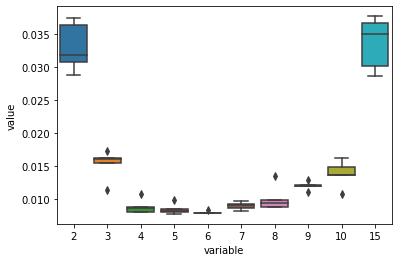

In [40]:
g = sns.boxplot(x='variable', y='value', data=df_melted) #6

In [44]:
dic = {}
#neuron number_1 for LSTM
for i in [3,4,8,16,32,64,128]:
    dic[i] = exp(6,5,i,100,2)
df_1 = pd.DataFrame(dic)
df_melted = pd.melt(df_1)

Model: "sequential_191"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_191 (LSTM)             (None, 3)                 60        
                                                                 
 dense_278 (Dense)           (None, 1)                 4         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 3.3183 - 2s/epoch - 310ms/step
Epoch 2/100
5/5 - 0s - loss: 3.1861 - 22ms/epoch - 4ms/step
Epoch 3/100
5/5 - 0s - loss: 3.0583 - 23ms/epoch - 5ms/step
Epoch 4/100
5/5 - 0s - loss: 2.9346 - 22ms/epoch - 4ms/step
Epoch 5/100
5/5 - 0s - loss: 2.8157 - 23ms/epoch - 5ms/step
Epoch 6/100
5/5 - 0s - loss: 2.7013 - 22ms/epoch - 4ms/step
Epoch 7/100
5/5 - 0s - loss: 2.5915 - 22ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 2.4

Epoch 10/100
5/5 - 0s - loss: 2.9408 - 18ms/epoch - 4ms/step
Epoch 11/100
5/5 - 0s - loss: 2.8752 - 19ms/epoch - 4ms/step
Epoch 12/100
5/5 - 0s - loss: 2.8133 - 18ms/epoch - 4ms/step
Epoch 13/100
5/5 - 0s - loss: 2.7534 - 17ms/epoch - 3ms/step
Epoch 14/100
5/5 - 0s - loss: 2.6964 - 17ms/epoch - 3ms/step
Epoch 15/100
5/5 - 0s - loss: 2.6410 - 18ms/epoch - 4ms/step
Epoch 16/100
5/5 - 0s - loss: 2.5873 - 18ms/epoch - 4ms/step
Epoch 17/100
5/5 - 0s - loss: 2.5354 - 17ms/epoch - 3ms/step
Epoch 18/100
5/5 - 0s - loss: 2.4845 - 17ms/epoch - 3ms/step
Epoch 19/100
5/5 - 0s - loss: 2.4341 - 18ms/epoch - 4ms/step
Epoch 20/100
5/5 - 0s - loss: 2.3846 - 18ms/epoch - 4ms/step
Epoch 21/100
5/5 - 0s - loss: 2.3347 - 18ms/epoch - 4ms/step
Epoch 22/100
5/5 - 0s - loss: 2.2855 - 17ms/epoch - 3ms/step
Epoch 23/100
5/5 - 0s - loss: 2.2353 - 17ms/epoch - 3ms/step
Epoch 24/100
5/5 - 0s - loss: 2.1845 - 18ms/epoch - 4ms/step
Epoch 25/100
5/5 - 0s - loss: 2.1330 - 18ms/epoch - 4ms/step
Epoch 26/100
5/5 - 0s - 

Epoch 30/100
5/5 - 0s - loss: 1.3414 - 18ms/epoch - 4ms/step
Epoch 31/100
5/5 - 0s - loss: 1.2770 - 17ms/epoch - 3ms/step
Epoch 32/100
5/5 - 0s - loss: 1.2099 - 17ms/epoch - 3ms/step
Epoch 33/100
5/5 - 0s - loss: 1.1410 - 17ms/epoch - 3ms/step
Epoch 34/100
5/5 - 0s - loss: 1.0705 - 16ms/epoch - 3ms/step
Epoch 35/100
5/5 - 0s - loss: 0.9980 - 17ms/epoch - 3ms/step
Epoch 36/100
5/5 - 0s - loss: 0.9256 - 18ms/epoch - 4ms/step
Epoch 37/100
5/5 - 0s - loss: 0.8526 - 17ms/epoch - 3ms/step
Epoch 38/100
5/5 - 0s - loss: 0.7803 - 17ms/epoch - 3ms/step
Epoch 39/100
5/5 - 0s - loss: 0.7087 - 18ms/epoch - 4ms/step
Epoch 40/100
5/5 - 0s - loss: 0.6404 - 16ms/epoch - 3ms/step
Epoch 41/100
5/5 - 0s - loss: 0.5746 - 16ms/epoch - 3ms/step
Epoch 42/100
5/5 - 0s - loss: 0.5126 - 17ms/epoch - 3ms/step
Epoch 43/100
5/5 - 0s - loss: 0.4551 - 17ms/epoch - 3ms/step
Epoch 44/100
5/5 - 0s - loss: 0.4027 - 18ms/epoch - 4ms/step
Epoch 45/100
5/5 - 0s - loss: 0.3549 - 17ms/epoch - 3ms/step
Epoch 46/100
5/5 - 0s - 

Epoch 50/100
5/5 - 0s - loss: 1.6447 - 18ms/epoch - 4ms/step
Epoch 51/100
5/5 - 0s - loss: 1.6057 - 19ms/epoch - 4ms/step
Epoch 52/100
5/5 - 0s - loss: 1.5673 - 17ms/epoch - 3ms/step
Epoch 53/100
5/5 - 0s - loss: 1.5301 - 17ms/epoch - 3ms/step
Epoch 54/100
5/5 - 0s - loss: 1.4934 - 17ms/epoch - 3ms/step
Epoch 55/100
5/5 - 0s - loss: 1.4575 - 18ms/epoch - 4ms/step
Epoch 56/100
5/5 - 0s - loss: 1.4223 - 18ms/epoch - 4ms/step
Epoch 57/100
5/5 - 0s - loss: 1.3876 - 17ms/epoch - 3ms/step
Epoch 58/100
5/5 - 0s - loss: 1.3535 - 17ms/epoch - 3ms/step
Epoch 59/100
5/5 - 0s - loss: 1.3198 - 15ms/epoch - 3ms/step
Epoch 60/100
5/5 - 0s - loss: 1.2867 - 16ms/epoch - 3ms/step
Epoch 61/100
5/5 - 0s - loss: 1.2540 - 18ms/epoch - 4ms/step
Epoch 62/100
5/5 - 0s - loss: 1.2219 - 17ms/epoch - 3ms/step
Epoch 63/100
5/5 - 0s - loss: 1.1901 - 18ms/epoch - 4ms/step
Epoch 64/100
5/5 - 0s - loss: 1.1590 - 17ms/epoch - 3ms/step
Epoch 65/100
5/5 - 0s - loss: 1.1285 - 18ms/epoch - 4ms/step
Epoch 66/100
5/5 - 0s - 

Epoch 70/100
5/5 - 0s - loss: 0.0223 - 18ms/epoch - 4ms/step
Epoch 71/100
5/5 - 0s - loss: 0.0223 - 19ms/epoch - 4ms/step
Epoch 72/100
5/5 - 0s - loss: 0.0223 - 16ms/epoch - 3ms/step
Epoch 73/100
5/5 - 0s - loss: 0.0222 - 17ms/epoch - 3ms/step
Epoch 74/100
5/5 - 0s - loss: 0.0222 - 17ms/epoch - 3ms/step
Epoch 75/100
5/5 - 0s - loss: 0.0222 - 17ms/epoch - 3ms/step
Epoch 76/100
5/5 - 0s - loss: 0.0221 - 19ms/epoch - 4ms/step
Epoch 77/100
5/5 - 0s - loss: 0.0221 - 18ms/epoch - 4ms/step
Epoch 78/100
5/5 - 0s - loss: 0.0220 - 17ms/epoch - 3ms/step
Epoch 79/100
5/5 - 0s - loss: 0.0220 - 17ms/epoch - 3ms/step
Epoch 80/100
5/5 - 0s - loss: 0.0220 - 16ms/epoch - 3ms/step
Epoch 81/100
5/5 - 0s - loss: 0.0219 - 16ms/epoch - 3ms/step
Epoch 82/100
5/5 - 0s - loss: 0.0219 - 17ms/epoch - 3ms/step
Epoch 83/100
5/5 - 0s - loss: 0.0218 - 17ms/epoch - 3ms/step
Epoch 84/100
5/5 - 0s - loss: 0.0218 - 18ms/epoch - 4ms/step
Epoch 85/100
5/5 - 0s - loss: 0.0218 - 17ms/epoch - 3ms/step
Epoch 86/100
5/5 - 0s - 

Epoch 90/100
5/5 - 0s - loss: 0.0222 - 15ms/epoch - 3ms/step
Epoch 91/100
5/5 - 0s - loss: 0.0221 - 16ms/epoch - 3ms/step
Epoch 92/100
5/5 - 0s - loss: 0.0220 - 14ms/epoch - 3ms/step
Epoch 93/100
5/5 - 0s - loss: 0.0219 - 13ms/epoch - 3ms/step
Epoch 94/100
5/5 - 0s - loss: 0.0218 - 15ms/epoch - 3ms/step
Epoch 95/100
5/5 - 0s - loss: 0.0217 - 14ms/epoch - 3ms/step
Epoch 96/100
5/5 - 0s - loss: 0.0216 - 16ms/epoch - 3ms/step
Epoch 97/100
5/5 - 0s - loss: 0.0215 - 13ms/epoch - 3ms/step
Epoch 98/100
5/5 - 0s - loss: 0.0214 - 19ms/epoch - 4ms/step
Epoch 99/100
5/5 - 0s - loss: 0.0213 - 17ms/epoch - 3ms/step
Epoch 100/100
5/5 - 0s - loss: 0.0212 - 17ms/epoch - 3ms/step
5/5 [==============================] - 0s 2ms/step - loss: 0.0211
Train Score: 0.0211 MSE (0.14540 RMSE)
1/1 [==============================] - 0s 18ms/step - loss: 0.0528
Test Score: 0.0528 MSE (0.22989 RMSE)
Model: "sequential_197"
_________________________________________________________________
 Layer (type)               

 dense_285 (Dense)           (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 1s - loss: 3.6850 - 1s/epoch - 275ms/step
Epoch 2/100
5/5 - 0s - loss: 3.4425 - 20ms/epoch - 4ms/step
Epoch 3/100
5/5 - 0s - loss: 3.2124 - 19ms/epoch - 4ms/step
Epoch 4/100
5/5 - 0s - loss: 2.9959 - 19ms/epoch - 4ms/step
Epoch 5/100
5/5 - 0s - loss: 2.7919 - 19ms/epoch - 4ms/step
Epoch 6/100
5/5 - 0s - loss: 2.6000 - 18ms/epoch - 4ms/step
Epoch 7/100
5/5 - 0s - loss: 2.4200 - 18ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 2.2442 - 17ms/epoch - 3ms/step
Epoch 9/100
5/5 - 0s - loss: 2.0783 - 19ms/epoch - 4ms/step
Epoch 10/100
5/5 - 0s - loss: 1.9168 - 20ms/epoch - 4ms/step
Epoch 11/100
5/5 - 0s - loss: 1.7607 - 18ms/epoch - 4ms/step
Epoch 12/100
5/5 - 0s - loss: 1.6088 - 18ms/epoch - 4ms/step
Epoch 13/100
5/

Epoch 16/100
5/5 - 0s - loss: 0.4809 - 18ms/epoch - 4ms/step
Epoch 17/100
5/5 - 0s - loss: 0.4111 - 19ms/epoch - 4ms/step
Epoch 18/100
5/5 - 0s - loss: 0.3473 - 18ms/epoch - 4ms/step
Epoch 19/100
5/5 - 0s - loss: 0.2880 - 17ms/epoch - 3ms/step
Epoch 20/100
5/5 - 0s - loss: 0.2365 - 16ms/epoch - 3ms/step
Epoch 21/100
5/5 - 0s - loss: 0.1911 - 19ms/epoch - 4ms/step
Epoch 22/100
5/5 - 0s - loss: 0.1521 - 17ms/epoch - 3ms/step
Epoch 23/100
5/5 - 0s - loss: 0.1207 - 17ms/epoch - 3ms/step
Epoch 24/100
5/5 - 0s - loss: 0.0949 - 17ms/epoch - 3ms/step
Epoch 25/100
5/5 - 0s - loss: 0.0750 - 18ms/epoch - 4ms/step
Epoch 26/100
5/5 - 0s - loss: 0.0593 - 17ms/epoch - 3ms/step
Epoch 27/100
5/5 - 0s - loss: 0.0483 - 18ms/epoch - 4ms/step
Epoch 28/100
5/5 - 0s - loss: 0.0399 - 19ms/epoch - 4ms/step
Epoch 29/100
5/5 - 0s - loss: 0.0339 - 17ms/epoch - 3ms/step
Epoch 30/100
5/5 - 0s - loss: 0.0300 - 18ms/epoch - 4ms/step
Epoch 31/100
5/5 - 0s - loss: 0.0272 - 18ms/epoch - 4ms/step
Epoch 32/100
5/5 - 0s - 

Epoch 36/100
5/5 - 0s - loss: 0.8768 - 19ms/epoch - 4ms/step
Epoch 37/100
5/5 - 0s - loss: 0.8321 - 18ms/epoch - 4ms/step
Epoch 38/100
5/5 - 0s - loss: 0.7887 - 17ms/epoch - 3ms/step
Epoch 39/100
5/5 - 0s - loss: 0.7475 - 18ms/epoch - 4ms/step
Epoch 40/100
5/5 - 0s - loss: 0.7080 - 17ms/epoch - 3ms/step
Epoch 41/100
5/5 - 0s - loss: 0.6707 - 17ms/epoch - 3ms/step
Epoch 42/100
5/5 - 0s - loss: 0.6349 - 17ms/epoch - 3ms/step
Epoch 43/100
5/5 - 0s - loss: 0.6003 - 17ms/epoch - 3ms/step
Epoch 44/100
5/5 - 0s - loss: 0.5682 - 18ms/epoch - 4ms/step
Epoch 45/100
5/5 - 0s - loss: 0.5368 - 16ms/epoch - 3ms/step
Epoch 46/100
5/5 - 0s - loss: 0.5072 - 17ms/epoch - 3ms/step
Epoch 47/100
5/5 - 0s - loss: 0.4791 - 16ms/epoch - 3ms/step
Epoch 48/100
5/5 - 0s - loss: 0.4525 - 17ms/epoch - 3ms/step
Epoch 49/100
5/5 - 0s - loss: 0.4270 - 18ms/epoch - 4ms/step
Epoch 50/100
5/5 - 0s - loss: 0.4029 - 17ms/epoch - 3ms/step
Epoch 51/100
5/5 - 0s - loss: 0.3801 - 19ms/epoch - 4ms/step
Epoch 52/100
5/5 - 0s - 

Epoch 56/100
5/5 - 0s - loss: 0.0263 - 18ms/epoch - 4ms/step
Epoch 57/100
5/5 - 0s - loss: 0.0262 - 17ms/epoch - 3ms/step
Epoch 58/100
5/5 - 0s - loss: 0.0261 - 19ms/epoch - 4ms/step
Epoch 59/100
5/5 - 0s - loss: 0.0260 - 18ms/epoch - 4ms/step
Epoch 60/100
5/5 - 0s - loss: 0.0259 - 18ms/epoch - 4ms/step
Epoch 61/100
5/5 - 0s - loss: 0.0259 - 19ms/epoch - 4ms/step
Epoch 62/100
5/5 - 0s - loss: 0.0258 - 19ms/epoch - 4ms/step
Epoch 63/100
5/5 - 0s - loss: 0.0257 - 20ms/epoch - 4ms/step
Epoch 64/100
5/5 - 0s - loss: 0.0256 - 17ms/epoch - 3ms/step
Epoch 65/100
5/5 - 0s - loss: 0.0255 - 19ms/epoch - 4ms/step
Epoch 66/100
5/5 - 0s - loss: 0.0254 - 18ms/epoch - 4ms/step
Epoch 67/100
5/5 - 0s - loss: 0.0253 - 18ms/epoch - 4ms/step
Epoch 68/100
5/5 - 0s - loss: 0.0252 - 18ms/epoch - 4ms/step
Epoch 69/100
5/5 - 0s - loss: 0.0251 - 18ms/epoch - 4ms/step
Epoch 70/100
5/5 - 0s - loss: 0.0250 - 19ms/epoch - 4ms/step
Epoch 71/100
5/5 - 0s - loss: 0.0249 - 18ms/epoch - 4ms/step
Epoch 72/100
5/5 - 0s - 

Epoch 76/100
5/5 - 0s - loss: 0.0128 - 19ms/epoch - 4ms/step
Epoch 77/100
5/5 - 0s - loss: 0.0126 - 18ms/epoch - 4ms/step
Epoch 78/100
5/5 - 0s - loss: 0.0125 - 18ms/epoch - 4ms/step
Epoch 79/100
5/5 - 0s - loss: 0.0124 - 18ms/epoch - 4ms/step
Epoch 80/100
5/5 - 0s - loss: 0.0122 - 18ms/epoch - 4ms/step
Epoch 81/100
5/5 - 0s - loss: 0.0121 - 18ms/epoch - 4ms/step
Epoch 82/100
5/5 - 0s - loss: 0.0120 - 18ms/epoch - 4ms/step
Epoch 83/100
5/5 - 0s - loss: 0.0118 - 18ms/epoch - 4ms/step
Epoch 84/100
5/5 - 0s - loss: 0.0117 - 18ms/epoch - 4ms/step
Epoch 85/100
5/5 - 0s - loss: 0.0116 - 19ms/epoch - 4ms/step
Epoch 86/100
5/5 - 0s - loss: 0.0115 - 18ms/epoch - 4ms/step
Epoch 87/100
5/5 - 0s - loss: 0.0113 - 19ms/epoch - 4ms/step
Epoch 88/100
5/5 - 0s - loss: 0.0112 - 18ms/epoch - 4ms/step
Epoch 89/100
5/5 - 0s - loss: 0.0111 - 18ms/epoch - 4ms/step
Epoch 90/100
5/5 - 0s - loss: 0.0109 - 18ms/epoch - 4ms/step
Epoch 91/100
5/5 - 0s - loss: 0.0108 - 17ms/epoch - 3ms/step
Epoch 92/100
5/5 - 0s - 

Epoch 96/100
5/5 - 0s - loss: 0.0206 - 14ms/epoch - 3ms/step
Epoch 97/100
5/5 - 0s - loss: 0.0206 - 14ms/epoch - 3ms/step
Epoch 98/100
5/5 - 0s - loss: 0.0205 - 14ms/epoch - 3ms/step
Epoch 99/100
5/5 - 0s - loss: 0.0204 - 14ms/epoch - 3ms/step
Epoch 100/100
5/5 - 0s - loss: 0.0204 - 13ms/epoch - 3ms/step
5/5 [==============================] - 0s 2ms/step - loss: 0.0203
Train Score: 0.0203 MSE (0.14258 RMSE)
1/1 [==============================] - 0s 19ms/step - loss: 0.0541
Test Score: 0.0541 MSE (0.23250 RMSE)
Model: "sequential_204"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_204 (LSTM)             (None, 8)                 320       
                                                                 
 dense_291 (Dense)           (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0


5/5 - 2s - loss: 2.4550 - 2s/epoch - 431ms/step
Epoch 2/100
5/5 - 0s - loss: 2.3567 - 20ms/epoch - 4ms/step
Epoch 3/100
5/5 - 0s - loss: 2.2601 - 19ms/epoch - 4ms/step
Epoch 4/100
5/5 - 0s - loss: 2.1636 - 19ms/epoch - 4ms/step
Epoch 5/100
5/5 - 0s - loss: 2.0673 - 19ms/epoch - 4ms/step
Epoch 6/100
5/5 - 0s - loss: 1.9704 - 18ms/epoch - 4ms/step
Epoch 7/100
5/5 - 0s - loss: 1.8719 - 18ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 1.7726 - 18ms/epoch - 4ms/step
Epoch 9/100
5/5 - 0s - loss: 1.6718 - 17ms/epoch - 3ms/step
Epoch 10/100
5/5 - 0s - loss: 1.5685 - 18ms/epoch - 4ms/step
Epoch 11/100
5/5 - 0s - loss: 1.4635 - 17ms/epoch - 3ms/step
Epoch 12/100
5/5 - 0s - loss: 1.3565 - 18ms/epoch - 4ms/step
Epoch 13/100
5/5 - 0s - loss: 1.2482 - 18ms/epoch - 4ms/step
Epoch 14/100
5/5 - 0s - loss: 1.1405 - 17ms/epoch - 3ms/step
Epoch 15/100
5/5 - 0s - loss: 1.0333 - 19ms/epoch - 4ms/step
Epoch 16/100
5/5 - 0s - loss: 0.9290 - 19ms/epoch - 4ms/step
Epoch 17/100
5/5 - 0s - loss: 0.8276 - 19ms/e

5/5 - 0s - loss: 0.0144 - 17ms/epoch - 3ms/step
Epoch 22/100
5/5 - 0s - loss: 0.0133 - 17ms/epoch - 3ms/step
Epoch 23/100
5/5 - 0s - loss: 0.0133 - 18ms/epoch - 4ms/step
Epoch 24/100
5/5 - 0s - loss: 0.0133 - 17ms/epoch - 3ms/step
Epoch 25/100
5/5 - 0s - loss: 0.0132 - 18ms/epoch - 4ms/step
Epoch 26/100
5/5 - 0s - loss: 0.0131 - 17ms/epoch - 3ms/step
Epoch 27/100
5/5 - 0s - loss: 0.0129 - 15ms/epoch - 3ms/step
Epoch 28/100
5/5 - 0s - loss: 0.0128 - 16ms/epoch - 3ms/step
Epoch 29/100
5/5 - 0s - loss: 0.0127 - 17ms/epoch - 3ms/step
Epoch 30/100
5/5 - 0s - loss: 0.0126 - 18ms/epoch - 4ms/step
Epoch 31/100
5/5 - 0s - loss: 0.0125 - 19ms/epoch - 4ms/step
Epoch 32/100
5/5 - 0s - loss: 0.0124 - 18ms/epoch - 4ms/step
Epoch 33/100
5/5 - 0s - loss: 0.0123 - 20ms/epoch - 4ms/step
Epoch 34/100
5/5 - 0s - loss: 0.0122 - 19ms/epoch - 4ms/step
Epoch 35/100
5/5 - 0s - loss: 0.0121 - 18ms/epoch - 4ms/step
Epoch 36/100
5/5 - 0s - loss: 0.0121 - 19ms/epoch - 4ms/step
Epoch 37/100
5/5 - 0s - loss: 0.0119 

Epoch 41/100
5/5 - 0s - loss: 0.0050 - 17ms/epoch - 3ms/step
Epoch 42/100
5/5 - 0s - loss: 0.0049 - 19ms/epoch - 4ms/step
Epoch 43/100
5/5 - 0s - loss: 0.0048 - 18ms/epoch - 4ms/step
Epoch 44/100
5/5 - 0s - loss: 0.0048 - 17ms/epoch - 3ms/step
Epoch 45/100
5/5 - 0s - loss: 0.0047 - 17ms/epoch - 3ms/step
Epoch 46/100
5/5 - 0s - loss: 0.0046 - 18ms/epoch - 4ms/step
Epoch 47/100
5/5 - 0s - loss: 0.0046 - 18ms/epoch - 4ms/step
Epoch 48/100
5/5 - 0s - loss: 0.0045 - 17ms/epoch - 3ms/step
Epoch 49/100
5/5 - 0s - loss: 0.0045 - 18ms/epoch - 4ms/step
Epoch 50/100
5/5 - 0s - loss: 0.0044 - 18ms/epoch - 4ms/step
Epoch 51/100
5/5 - 0s - loss: 0.0044 - 17ms/epoch - 3ms/step
Epoch 52/100
5/5 - 0s - loss: 0.0043 - 17ms/epoch - 3ms/step
Epoch 53/100
5/5 - 0s - loss: 0.0042 - 18ms/epoch - 4ms/step
Epoch 54/100
5/5 - 0s - loss: 0.0042 - 18ms/epoch - 4ms/step
Epoch 55/100
5/5 - 0s - loss: 0.0041 - 17ms/epoch - 3ms/step
Epoch 56/100
5/5 - 0s - loss: 0.0041 - 17ms/epoch - 3ms/step
Epoch 57/100
5/5 - 0s - 

Epoch 61/100
5/5 - 0s - loss: 0.0108 - 19ms/epoch - 4ms/step
Epoch 62/100
5/5 - 0s - loss: 0.0107 - 18ms/epoch - 4ms/step
Epoch 63/100
5/5 - 0s - loss: 0.0105 - 17ms/epoch - 3ms/step
Epoch 64/100
5/5 - 0s - loss: 0.0103 - 19ms/epoch - 4ms/step
Epoch 65/100
5/5 - 0s - loss: 0.0102 - 18ms/epoch - 4ms/step
Epoch 66/100
5/5 - 0s - loss: 0.0100 - 16ms/epoch - 3ms/step
Epoch 67/100
5/5 - 0s - loss: 0.0099 - 17ms/epoch - 3ms/step
Epoch 68/100
5/5 - 0s - loss: 0.0097 - 19ms/epoch - 4ms/step
Epoch 69/100
5/5 - 0s - loss: 0.0095 - 18ms/epoch - 4ms/step
Epoch 70/100
5/5 - 0s - loss: 0.0094 - 16ms/epoch - 3ms/step
Epoch 71/100
5/5 - 0s - loss: 0.0092 - 16ms/epoch - 3ms/step
Epoch 72/100
5/5 - 0s - loss: 0.0091 - 17ms/epoch - 3ms/step
Epoch 73/100
5/5 - 0s - loss: 0.0089 - 16ms/epoch - 3ms/step
Epoch 74/100
5/5 - 0s - loss: 0.0087 - 16ms/epoch - 3ms/step
Epoch 75/100
5/5 - 0s - loss: 0.0085 - 14ms/epoch - 3ms/step
Epoch 76/100
5/5 - 0s - loss: 0.0084 - 15ms/epoch - 3ms/step
Epoch 77/100
5/5 - 0s - 

Epoch 81/100
5/5 - 0s - loss: 0.0082 - 16ms/epoch - 3ms/step
Epoch 82/100
5/5 - 0s - loss: 0.0081 - 18ms/epoch - 4ms/step
Epoch 83/100
5/5 - 0s - loss: 0.0080 - 16ms/epoch - 3ms/step
Epoch 84/100
5/5 - 0s - loss: 0.0079 - 16ms/epoch - 3ms/step
Epoch 85/100
5/5 - 0s - loss: 0.0078 - 17ms/epoch - 3ms/step
Epoch 86/100
5/5 - 0s - loss: 0.0077 - 17ms/epoch - 3ms/step
Epoch 87/100
5/5 - 0s - loss: 0.0076 - 15ms/epoch - 3ms/step
Epoch 88/100
5/5 - 0s - loss: 0.0075 - 15ms/epoch - 3ms/step
Epoch 89/100
5/5 - 0s - loss: 0.0074 - 15ms/epoch - 3ms/step
Epoch 90/100
5/5 - 0s - loss: 0.0073 - 17ms/epoch - 3ms/step
Epoch 91/100
5/5 - 0s - loss: 0.0072 - 15ms/epoch - 3ms/step
Epoch 92/100
5/5 - 0s - loss: 0.0071 - 16ms/epoch - 3ms/step
Epoch 93/100
5/5 - 0s - loss: 0.0071 - 17ms/epoch - 3ms/step
Epoch 94/100
5/5 - 0s - loss: 0.0069 - 16ms/epoch - 3ms/step
Epoch 95/100
5/5 - 0s - loss: 0.0068 - 16ms/epoch - 3ms/step
Epoch 96/100
5/5 - 0s - loss: 0.0068 - 16ms/epoch - 3ms/step
Epoch 97/100
5/5 - 0s - 

5/5 [==============================] - 0s 2ms/step - loss: 0.0033
Train Score: 0.0033 MSE (0.05751 RMSE)
1/1 [==============================] - 0s 17ms/step - loss: 0.0056
Test Score: 0.0056 MSE (0.07491 RMSE)
Model: "sequential_211"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_211 (LSTM)             (None, 32)                4352      
                                                                 
 dense_298 (Dense)           (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 2.4851 - 2s/epoch - 342ms/step
Epoch 2/100
5/5 - 0s - loss: 1.9638 - 21ms/epoch - 4ms/step
Epoch 3/100
5/5 - 0s - loss: 1.5190 - 21ms/epoch - 4ms/step
Epoch 4/100
5/5 - 0s - loss: 1.1334 - 20ms/epoch - 4ms/s

5/5 - 0s - loss: 0.0248 - 24ms/epoch - 5ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0112 - 21ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0352 - 19ms/epoch - 4ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0332 - 22ms/epoch - 4ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0145 - 19ms/epoch - 4ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0042 - 19ms/epoch - 4ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0048 - 18ms/epoch - 4ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0066 - 20ms/epoch - 4ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0060 - 19ms/epoch - 4ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0042 - 20ms/epoch - 4ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0036 - 18ms/epoch - 4ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0037 - 20ms/epoch - 4ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0037 - 20ms/epoch - 4ms/step
Epoch 19/100
5/5 - 0s - loss: 0.0036 - 20ms/epoch - 4ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0034 - 19ms/epoch - 4ms/step
Epoch 21/100
5/5 - 0s - loss: 0.0034 - 20ms/epoch - 4ms/step
Epoch 22/100
5/5 - 0s - loss: 0.0034 - 1

Epoch 25/100
5/5 - 0s - loss: 0.0076 - 22ms/epoch - 4ms/step
Epoch 26/100
5/5 - 0s - loss: 0.0075 - 17ms/epoch - 3ms/step
Epoch 27/100
5/5 - 0s - loss: 0.0074 - 18ms/epoch - 4ms/step
Epoch 28/100
5/5 - 0s - loss: 0.0073 - 18ms/epoch - 4ms/step
Epoch 29/100
5/5 - 0s - loss: 0.0072 - 17ms/epoch - 3ms/step
Epoch 30/100
5/5 - 0s - loss: 0.0072 - 17ms/epoch - 3ms/step
Epoch 31/100
5/5 - 0s - loss: 0.0071 - 17ms/epoch - 3ms/step
Epoch 32/100
5/5 - 0s - loss: 0.0070 - 17ms/epoch - 3ms/step
Epoch 33/100
5/5 - 0s - loss: 0.0069 - 15ms/epoch - 3ms/step
Epoch 34/100
5/5 - 0s - loss: 0.0069 - 17ms/epoch - 3ms/step
Epoch 35/100
5/5 - 0s - loss: 0.0068 - 15ms/epoch - 3ms/step
Epoch 36/100
5/5 - 0s - loss: 0.0067 - 17ms/epoch - 3ms/step
Epoch 37/100
5/5 - 0s - loss: 0.0066 - 16ms/epoch - 3ms/step
Epoch 38/100
5/5 - 0s - loss: 0.0065 - 17ms/epoch - 3ms/step
Epoch 39/100
5/5 - 0s - loss: 0.0065 - 16ms/epoch - 3ms/step
Epoch 40/100
5/5 - 0s - loss: 0.0064 - 16ms/epoch - 3ms/step
Epoch 41/100
5/5 - 0s - 

Epoch 45/100
5/5 - 0s - loss: 0.0032 - 19ms/epoch - 4ms/step
Epoch 46/100
5/5 - 0s - loss: 0.0032 - 20ms/epoch - 4ms/step
Epoch 47/100
5/5 - 0s - loss: 0.0031 - 18ms/epoch - 4ms/step
Epoch 48/100
5/5 - 0s - loss: 0.0030 - 18ms/epoch - 4ms/step
Epoch 49/100
5/5 - 0s - loss: 0.0030 - 19ms/epoch - 4ms/step
Epoch 50/100
5/5 - 0s - loss: 0.0029 - 19ms/epoch - 4ms/step
Epoch 51/100
5/5 - 0s - loss: 0.0029 - 21ms/epoch - 4ms/step
Epoch 52/100
5/5 - 0s - loss: 0.0028 - 22ms/epoch - 4ms/step
Epoch 53/100
5/5 - 0s - loss: 0.0027 - 22ms/epoch - 4ms/step
Epoch 54/100
5/5 - 0s - loss: 0.0027 - 23ms/epoch - 5ms/step
Epoch 55/100
5/5 - 0s - loss: 0.0026 - 22ms/epoch - 4ms/step
Epoch 56/100
5/5 - 0s - loss: 0.0026 - 20ms/epoch - 4ms/step
Epoch 57/100
5/5 - 0s - loss: 0.0025 - 20ms/epoch - 4ms/step
Epoch 58/100
5/5 - 0s - loss: 0.0024 - 21ms/epoch - 4ms/step
Epoch 59/100
5/5 - 0s - loss: 0.0024 - 20ms/epoch - 4ms/step
Epoch 60/100
5/5 - 0s - loss: 0.0023 - 19ms/epoch - 4ms/step
Epoch 61/100
5/5 - 0s - 

5/5 - 0s - loss: 0.0033 - 22ms/epoch - 4ms/step
Epoch 65/100
5/5 - 0s - loss: 0.0033 - 20ms/epoch - 4ms/step
Epoch 66/100
5/5 - 0s - loss: 0.0032 - 19ms/epoch - 4ms/step
Epoch 67/100
5/5 - 0s - loss: 0.0031 - 15ms/epoch - 3ms/step
Epoch 68/100
5/5 - 0s - loss: 0.0031 - 15ms/epoch - 3ms/step
Epoch 69/100
5/5 - 0s - loss: 0.0030 - 15ms/epoch - 3ms/step
Epoch 70/100
5/5 - 0s - loss: 0.0030 - 16ms/epoch - 3ms/step
Epoch 71/100
5/5 - 0s - loss: 0.0029 - 18ms/epoch - 4ms/step
Epoch 72/100
5/5 - 0s - loss: 0.0028 - 20ms/epoch - 4ms/step
Epoch 73/100
5/5 - 0s - loss: 0.0028 - 19ms/epoch - 4ms/step
Epoch 74/100
5/5 - 0s - loss: 0.0027 - 18ms/epoch - 4ms/step
Epoch 75/100
5/5 - 0s - loss: 0.0026 - 16ms/epoch - 3ms/step
Epoch 76/100
5/5 - 0s - loss: 0.0026 - 18ms/epoch - 4ms/step
Epoch 77/100
5/5 - 0s - loss: 0.0025 - 17ms/epoch - 3ms/step
Epoch 78/100
5/5 - 0s - loss: 0.0025 - 18ms/epoch - 4ms/step
Epoch 79/100
5/5 - 0s - loss: 0.0024 - 17ms/epoch - 3ms/step
Epoch 80/100
5/5 - 0s - loss: 0.0024 

Epoch 83/100
5/5 - 0s - loss: 5.8928e-04 - 23ms/epoch - 5ms/step
Epoch 84/100
5/5 - 0s - loss: 5.7824e-04 - 23ms/epoch - 5ms/step
Epoch 85/100
5/5 - 0s - loss: 5.6582e-04 - 24ms/epoch - 5ms/step
Epoch 86/100
5/5 - 0s - loss: 5.5811e-04 - 24ms/epoch - 5ms/step
Epoch 87/100
5/5 - 0s - loss: 5.4777e-04 - 24ms/epoch - 5ms/step
Epoch 88/100
5/5 - 0s - loss: 5.3888e-04 - 23ms/epoch - 5ms/step
Epoch 89/100
5/5 - 0s - loss: 5.3725e-04 - 23ms/epoch - 5ms/step
Epoch 90/100
5/5 - 0s - loss: 5.1629e-04 - 23ms/epoch - 5ms/step
Epoch 91/100
5/5 - 0s - loss: 5.1276e-04 - 24ms/epoch - 5ms/step
Epoch 92/100
5/5 - 0s - loss: 4.9850e-04 - 22ms/epoch - 4ms/step
Epoch 93/100
5/5 - 0s - loss: 5.0418e-04 - 23ms/epoch - 5ms/step
Epoch 94/100
5/5 - 0s - loss: 5.0185e-04 - 22ms/epoch - 4ms/step
Epoch 95/100
5/5 - 0s - loss: 4.8049e-04 - 23ms/epoch - 5ms/step
Epoch 96/100
5/5 - 0s - loss: 4.6575e-04 - 21ms/epoch - 4ms/step
Epoch 97/100
5/5 - 0s - loss: 4.5801e-04 - 19ms/epoch - 4ms/step
Epoch 98/100
5/5 - 0s - l

5/5 - 0s - loss: 3.8710e-04 - 22ms/epoch - 4ms/step
Epoch 99/100
5/5 - 0s - loss: 3.8636e-04 - 24ms/epoch - 5ms/step
Epoch 100/100
5/5 - 0s - loss: 3.7712e-04 - 20ms/epoch - 4ms/step
5/5 [==============================] - 0s 3ms/step - loss: 3.7609e-04
Train Score: 0.0004 MSE (0.01939 RMSE)
1/1 [==============================] - 0s 18ms/step - loss: 1.0229e-04
Test Score: 0.0001 MSE (0.01011 RMSE)
Model: "sequential_218"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_218 (LSTM)             (None, 64)                16896     
                                                                 
 dense_305 (Dense)           (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 0.9764 - 2s/ep

Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 1s - loss: 1.8516 - 1s/epoch - 298ms/step
Epoch 2/100
5/5 - 0s - loss: 0.9663 - 25ms/epoch - 5ms/step
Epoch 3/100
5/5 - 0s - loss: 0.3174 - 26ms/epoch - 5ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0243 - 27ms/epoch - 5ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0749 - 25ms/epoch - 5ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0816 - 25ms/epoch - 5ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0142 - 25ms/epoch - 5ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0058 - 25ms/epoch - 5ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0155 - 27ms/epoch - 5ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0109 - 23ms/epoch - 5ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0028 - 25ms/epoch - 5ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0022 - 24ms/epoch - 5ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0035 - 25ms/epoch - 5ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0023 - 25ms/epoch - 5ms/step
Epoch 15/100
5/5 - 

Epoch 15/100
5/5 - 0s - loss: 0.0035 - 26ms/epoch - 5ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0026 - 25ms/epoch - 5ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0027 - 25ms/epoch - 5ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0028 - 27ms/epoch - 5ms/step
Epoch 19/100
5/5 - 0s - loss: 0.0025 - 24ms/epoch - 5ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0023 - 26ms/epoch - 5ms/step
Epoch 21/100
5/5 - 0s - loss: 0.0024 - 26ms/epoch - 5ms/step
Epoch 22/100
5/5 - 0s - loss: 0.0023 - 25ms/epoch - 5ms/step
Epoch 23/100
5/5 - 0s - loss: 0.0023 - 25ms/epoch - 5ms/step
Epoch 24/100
5/5 - 0s - loss: 0.0022 - 23ms/epoch - 5ms/step
Epoch 25/100
5/5 - 0s - loss: 0.0022 - 25ms/epoch - 5ms/step
Epoch 26/100
5/5 - 0s - loss: 0.0022 - 24ms/epoch - 5ms/step
Epoch 27/100
5/5 - 0s - loss: 0.0021 - 25ms/epoch - 5ms/step
Epoch 28/100
5/5 - 0s - loss: 0.0021 - 25ms/epoch - 5ms/step
Epoch 29/100
5/5 - 0s - loss: 0.0021 - 26ms/epoch - 5ms/step
Epoch 30/100
5/5 - 0s - loss: 0.0020 - 26ms/epoch - 5ms/step
Epoch 31/100
5/5 - 0s - 

Epoch 32/100
5/5 - 0s - loss: 7.9060e-04 - 36ms/epoch - 7ms/step
Epoch 33/100
5/5 - 0s - loss: 7.9643e-04 - 41ms/epoch - 8ms/step
Epoch 34/100
5/5 - 0s - loss: 7.6452e-04 - 36ms/epoch - 7ms/step
Epoch 35/100
5/5 - 0s - loss: 7.5099e-04 - 38ms/epoch - 8ms/step
Epoch 36/100
5/5 - 0s - loss: 7.3605e-04 - 52ms/epoch - 10ms/step
Epoch 37/100
5/5 - 0s - loss: 7.2501e-04 - 33ms/epoch - 7ms/step
Epoch 38/100
5/5 - 0s - loss: 7.0620e-04 - 39ms/epoch - 8ms/step
Epoch 39/100
5/5 - 0s - loss: 7.0468e-04 - 36ms/epoch - 7ms/step
Epoch 40/100
5/5 - 0s - loss: 6.9226e-04 - 37ms/epoch - 7ms/step
Epoch 41/100
5/5 - 0s - loss: 6.7932e-04 - 38ms/epoch - 8ms/step
Epoch 42/100
5/5 - 0s - loss: 6.6066e-04 - 37ms/epoch - 7ms/step
Epoch 43/100
5/5 - 0s - loss: 6.4808e-04 - 36ms/epoch - 7ms/step
Epoch 44/100
5/5 - 0s - loss: 6.3440e-04 - 38ms/epoch - 8ms/step
Epoch 45/100
5/5 - 0s - loss: 6.2349e-04 - 39ms/epoch - 8ms/step
Epoch 46/100
5/5 - 0s - loss: 6.1132e-04 - 37ms/epoch - 7ms/step
Epoch 47/100
5/5 - 0s - 

Epoch 46/100
5/5 - 0s - loss: 6.2587e-04 - 43ms/epoch - 9ms/step
Epoch 47/100
5/5 - 0s - loss: 6.1710e-04 - 39ms/epoch - 8ms/step
Epoch 48/100
5/5 - 0s - loss: 6.0973e-04 - 39ms/epoch - 8ms/step
Epoch 49/100
5/5 - 0s - loss: 6.0462e-04 - 40ms/epoch - 8ms/step
Epoch 50/100
5/5 - 0s - loss: 5.9094e-04 - 38ms/epoch - 8ms/step
Epoch 51/100
5/5 - 0s - loss: 5.6941e-04 - 41ms/epoch - 8ms/step
Epoch 52/100
5/5 - 0s - loss: 5.5787e-04 - 41ms/epoch - 8ms/step
Epoch 53/100
5/5 - 0s - loss: 5.3751e-04 - 42ms/epoch - 8ms/step
Epoch 54/100
5/5 - 0s - loss: 5.3916e-04 - 39ms/epoch - 8ms/step
Epoch 55/100
5/5 - 0s - loss: 5.2455e-04 - 43ms/epoch - 9ms/step
Epoch 56/100
5/5 - 0s - loss: 5.1368e-04 - 40ms/epoch - 8ms/step
Epoch 57/100
5/5 - 0s - loss: 5.0048e-04 - 40ms/epoch - 8ms/step
Epoch 58/100
5/5 - 0s - loss: 5.1415e-04 - 40ms/epoch - 8ms/step
Epoch 59/100
5/5 - 0s - loss: 4.7593e-04 - 41ms/epoch - 8ms/step
Epoch 60/100
5/5 - 0s - loss: 4.8709e-04 - 40ms/epoch - 8ms/step
Epoch 61/100
5/5 - 0s - l

5/5 - 0s - loss: 4.3608e-04 - 39ms/epoch - 8ms/step
Epoch 60/100
5/5 - 0s - loss: 4.2542e-04 - 38ms/epoch - 8ms/step
Epoch 61/100
5/5 - 0s - loss: 4.2100e-04 - 39ms/epoch - 8ms/step
Epoch 62/100
5/5 - 0s - loss: 4.1105e-04 - 38ms/epoch - 8ms/step
Epoch 63/100
5/5 - 0s - loss: 4.0599e-04 - 38ms/epoch - 8ms/step
Epoch 64/100
5/5 - 0s - loss: 4.0188e-04 - 38ms/epoch - 8ms/step
Epoch 65/100
5/5 - 0s - loss: 3.9427e-04 - 37ms/epoch - 7ms/step
Epoch 66/100
5/5 - 0s - loss: 3.8952e-04 - 39ms/epoch - 8ms/step
Epoch 67/100
5/5 - 0s - loss: 3.8395e-04 - 38ms/epoch - 8ms/step
Epoch 68/100
5/5 - 0s - loss: 3.8229e-04 - 37ms/epoch - 7ms/step
Epoch 69/100
5/5 - 0s - loss: 3.7594e-04 - 37ms/epoch - 7ms/step
Epoch 70/100
5/5 - 0s - loss: 3.7139e-04 - 39ms/epoch - 8ms/step
Epoch 71/100
5/5 - 0s - loss: 3.7547e-04 - 37ms/epoch - 7ms/step
Epoch 72/100
5/5 - 0s - loss: 3.6709e-04 - 38ms/epoch - 8ms/step
Epoch 73/100
5/5 - 0s - loss: 3.7282e-04 - 38ms/epoch - 8ms/step
Epoch 74/100
5/5 - 0s - loss: 3.5173e-

5/5 - 0s - loss: 3.9027e-04 - 36ms/epoch - 7ms/step
Epoch 74/100
5/5 - 0s - loss: 4.0574e-04 - 35ms/epoch - 7ms/step
Epoch 75/100
5/5 - 0s - loss: 3.7816e-04 - 37ms/epoch - 7ms/step
Epoch 76/100
5/5 - 0s - loss: 3.9734e-04 - 38ms/epoch - 8ms/step
Epoch 77/100
5/5 - 0s - loss: 3.7284e-04 - 36ms/epoch - 7ms/step
Epoch 78/100
5/5 - 0s - loss: 3.7207e-04 - 38ms/epoch - 8ms/step
Epoch 79/100
5/5 - 0s - loss: 3.6528e-04 - 38ms/epoch - 8ms/step
Epoch 80/100
5/5 - 0s - loss: 3.6529e-04 - 36ms/epoch - 7ms/step
Epoch 81/100
5/5 - 0s - loss: 3.5624e-04 - 38ms/epoch - 8ms/step
Epoch 82/100
5/5 - 0s - loss: 3.5309e-04 - 36ms/epoch - 7ms/step
Epoch 83/100
5/5 - 0s - loss: 3.4841e-04 - 36ms/epoch - 7ms/step
Epoch 84/100
5/5 - 0s - loss: 3.4237e-04 - 39ms/epoch - 8ms/step
Epoch 85/100
5/5 - 0s - loss: 3.4578e-04 - 37ms/epoch - 7ms/step
Epoch 86/100
5/5 - 0s - loss: 3.4078e-04 - 36ms/epoch - 7ms/step
Epoch 87/100
5/5 - 0s - loss: 3.4069e-04 - 38ms/epoch - 8ms/step
Epoch 88/100
5/5 - 0s - loss: 3.3084e-

Epoch 87/100
5/5 - 0s - loss: 3.2556e-04 - 49ms/epoch - 10ms/step
Epoch 88/100
5/5 - 0s - loss: 3.2371e-04 - 35ms/epoch - 7ms/step
Epoch 89/100
5/5 - 0s - loss: 3.2688e-04 - 38ms/epoch - 8ms/step
Epoch 90/100
5/5 - 0s - loss: 3.1829e-04 - 36ms/epoch - 7ms/step
Epoch 91/100
5/5 - 0s - loss: 3.1996e-04 - 36ms/epoch - 7ms/step
Epoch 92/100
5/5 - 0s - loss: 3.2495e-04 - 37ms/epoch - 7ms/step
Epoch 93/100
5/5 - 0s - loss: 3.1692e-04 - 37ms/epoch - 7ms/step
Epoch 94/100
5/5 - 0s - loss: 3.2341e-04 - 35ms/epoch - 7ms/step
Epoch 95/100
5/5 - 0s - loss: 3.1419e-04 - 35ms/epoch - 7ms/step
Epoch 96/100
5/5 - 0s - loss: 3.1120e-04 - 37ms/epoch - 7ms/step
Epoch 97/100
5/5 - 0s - loss: 3.0958e-04 - 38ms/epoch - 8ms/step
Epoch 98/100
5/5 - 0s - loss: 3.0792e-04 - 38ms/epoch - 8ms/step
Epoch 99/100
5/5 - 0s - loss: 3.1088e-04 - 37ms/epoch - 7ms/step
Epoch 100/100
5/5 - 0s - loss: 3.0268e-04 - 36ms/epoch - 7ms/step
5/5 [==============================] - 0s 4ms/step - loss: 3.0519e-04
Train Score: 0.000

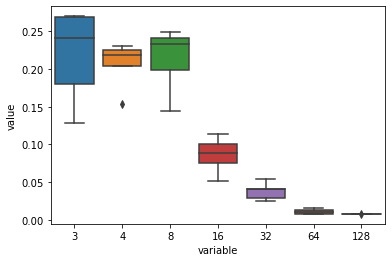

In [45]:
g = sns.boxplot(x='variable', y='value', data=df_melted) #128

In [47]:
#batch_size
dic = {}
for i in [1,2,3,4,5,6,7,8,9,10,15,20]:
    dic[i] = exp(6,5,128,100,i)
df_1 = pd.DataFrame(dic)
df_melted = pd.melt(df_1)

Model: "sequential_226"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_226 (LSTM)             (None, 128)               66560     
                                                                 
 dense_313 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 2.5809 - 2s/epoch - 383ms/step
Epoch 2/100
5/5 - 0s - loss: 1.1177 - 53ms/epoch - 11ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1444 - 50ms/epoch - 10ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1849 - 57ms/epoch - 11ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0757 - 64ms/epoch - 13ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0174 - 54ms/epoch - 11ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0509 - 56ms/epoch - 11ms/step
Epoch 8/100
5/5 - 

Epoch 5/100
5/5 - 0s - loss: 0.0427 - 45ms/epoch - 9ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0192 - 44ms/epoch - 9ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0413 - 49ms/epoch - 10ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0148 - 44ms/epoch - 9ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0029 - 43ms/epoch - 9ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0090 - 43ms/epoch - 9ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0032 - 43ms/epoch - 9ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0018 - 43ms/epoch - 9ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0027 - 42ms/epoch - 8ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0013 - 43ms/epoch - 9ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0015 - 42ms/epoch - 8ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0013 - 43ms/epoch - 9ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0010 - 44ms/epoch - 9ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0012 - 41ms/epoch - 8ms/step
Epoch 19/100
5/5 - 0s - loss: 9.8237e-04 - 42ms/epoch - 8ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0011 - 44ms/epoch - 9ms/step
Epoch 21/100
5/5 - 0s - 

5/5 - 0s - loss: 8.3755e-04 - 33ms/epoch - 7ms/step
Epoch 20/100
5/5 - 0s - loss: 7.9665e-04 - 34ms/epoch - 7ms/step
Epoch 21/100
5/5 - 0s - loss: 7.6483e-04 - 34ms/epoch - 7ms/step
Epoch 22/100
5/5 - 0s - loss: 7.7530e-04 - 32ms/epoch - 6ms/step
Epoch 23/100
5/5 - 0s - loss: 7.4367e-04 - 32ms/epoch - 6ms/step
Epoch 24/100
5/5 - 0s - loss: 7.3654e-04 - 32ms/epoch - 6ms/step
Epoch 25/100
5/5 - 0s - loss: 7.2231e-04 - 34ms/epoch - 7ms/step
Epoch 26/100
5/5 - 0s - loss: 7.1507e-04 - 38ms/epoch - 8ms/step
Epoch 27/100
5/5 - 0s - loss: 6.9694e-04 - 35ms/epoch - 7ms/step
Epoch 28/100
5/5 - 0s - loss: 6.9001e-04 - 31ms/epoch - 6ms/step
Epoch 29/100
5/5 - 0s - loss: 6.6671e-04 - 33ms/epoch - 7ms/step
Epoch 30/100
5/5 - 0s - loss: 6.6349e-04 - 35ms/epoch - 7ms/step
Epoch 31/100
5/5 - 0s - loss: 6.4773e-04 - 32ms/epoch - 6ms/step
Epoch 32/100
5/5 - 0s - loss: 6.4774e-04 - 32ms/epoch - 6ms/step
Epoch 33/100
5/5 - 0s - loss: 6.1620e-04 - 31ms/epoch - 6ms/step
Epoch 34/100
5/5 - 0s - loss: 6.2643e-

Epoch 33/100
5/5 - 0s - loss: 6.9952e-04 - 32ms/epoch - 6ms/step
Epoch 34/100
5/5 - 0s - loss: 6.8170e-04 - 31ms/epoch - 6ms/step
Epoch 35/100
5/5 - 0s - loss: 6.8393e-04 - 30ms/epoch - 6ms/step
Epoch 36/100
5/5 - 0s - loss: 6.7486e-04 - 27ms/epoch - 5ms/step
Epoch 37/100
5/5 - 0s - loss: 6.5795e-04 - 28ms/epoch - 6ms/step
Epoch 38/100
5/5 - 0s - loss: 6.4640e-04 - 29ms/epoch - 6ms/step
Epoch 39/100
5/5 - 0s - loss: 6.2742e-04 - 32ms/epoch - 6ms/step
Epoch 40/100
5/5 - 0s - loss: 6.1626e-04 - 29ms/epoch - 6ms/step
Epoch 41/100
5/5 - 0s - loss: 6.0722e-04 - 29ms/epoch - 6ms/step
Epoch 42/100
5/5 - 0s - loss: 5.9620e-04 - 30ms/epoch - 6ms/step
Epoch 43/100
5/5 - 0s - loss: 5.8598e-04 - 30ms/epoch - 6ms/step
Epoch 44/100
5/5 - 0s - loss: 5.7263e-04 - 30ms/epoch - 6ms/step
Epoch 45/100
5/5 - 0s - loss: 5.6784e-04 - 32ms/epoch - 6ms/step
Epoch 46/100
5/5 - 0s - loss: 5.5655e-04 - 31ms/epoch - 6ms/step
Epoch 47/100
5/5 - 0s - loss: 5.4362e-04 - 32ms/epoch - 6ms/step
Epoch 48/100
5/5 - 0s - l

Epoch 47/100
5/5 - 0s - loss: 6.5663e-04 - 27ms/epoch - 5ms/step
Epoch 48/100
5/5 - 0s - loss: 6.5390e-04 - 26ms/epoch - 5ms/step
Epoch 49/100
5/5 - 0s - loss: 6.3060e-04 - 27ms/epoch - 5ms/step
Epoch 50/100
5/5 - 0s - loss: 6.2092e-04 - 29ms/epoch - 6ms/step
Epoch 51/100
5/5 - 0s - loss: 6.0448e-04 - 27ms/epoch - 5ms/step
Epoch 52/100
5/5 - 0s - loss: 6.0147e-04 - 26ms/epoch - 5ms/step
Epoch 53/100
5/5 - 0s - loss: 5.7345e-04 - 26ms/epoch - 5ms/step
Epoch 54/100
5/5 - 0s - loss: 5.6417e-04 - 26ms/epoch - 5ms/step
Epoch 55/100
5/5 - 0s - loss: 5.5231e-04 - 27ms/epoch - 5ms/step
Epoch 56/100
5/5 - 0s - loss: 5.5088e-04 - 25ms/epoch - 5ms/step
Epoch 57/100
5/5 - 0s - loss: 5.5172e-04 - 26ms/epoch - 5ms/step
Epoch 58/100
5/5 - 0s - loss: 5.1916e-04 - 26ms/epoch - 5ms/step
Epoch 59/100
5/5 - 0s - loss: 5.2101e-04 - 26ms/epoch - 5ms/step
Epoch 60/100
5/5 - 0s - loss: 5.0261e-04 - 26ms/epoch - 5ms/step
Epoch 61/100
5/5 - 0s - loss: 4.9696e-04 - 27ms/epoch - 5ms/step
Epoch 62/100
5/5 - 0s - l

5/5 - 0s - loss: 3.8396e-04 - 34ms/epoch - 7ms/step
Epoch 61/100
5/5 - 0s - loss: 3.7995e-04 - 37ms/epoch - 7ms/step
Epoch 62/100
5/5 - 0s - loss: 3.7774e-04 - 35ms/epoch - 7ms/step
Epoch 63/100
5/5 - 0s - loss: 3.7069e-04 - 35ms/epoch - 7ms/step
Epoch 64/100
5/5 - 0s - loss: 3.6580e-04 - 35ms/epoch - 7ms/step
Epoch 65/100
5/5 - 0s - loss: 3.6032e-04 - 34ms/epoch - 7ms/step
Epoch 66/100
5/5 - 0s - loss: 3.6194e-04 - 35ms/epoch - 7ms/step
Epoch 67/100
5/5 - 0s - loss: 3.5514e-04 - 36ms/epoch - 7ms/step
Epoch 68/100
5/5 - 0s - loss: 3.5112e-04 - 35ms/epoch - 7ms/step
Epoch 69/100
5/5 - 0s - loss: 3.5148e-04 - 36ms/epoch - 7ms/step
Epoch 70/100
5/5 - 0s - loss: 3.4892e-04 - 33ms/epoch - 7ms/step
Epoch 71/100
5/5 - 0s - loss: 3.4131e-04 - 34ms/epoch - 7ms/step
Epoch 72/100
5/5 - 0s - loss: 3.3959e-04 - 35ms/epoch - 7ms/step
Epoch 73/100
5/5 - 0s - loss: 3.3460e-04 - 36ms/epoch - 7ms/step
Epoch 74/100
5/5 - 0s - loss: 3.2829e-04 - 35ms/epoch - 7ms/step
Epoch 75/100
5/5 - 0s - loss: 3.3005e-

Epoch 74/100
5/5 - 0s - loss: 3.7273e-04 - 33ms/epoch - 7ms/step
Epoch 75/100
5/5 - 0s - loss: 3.6026e-04 - 35ms/epoch - 7ms/step
Epoch 76/100
5/5 - 0s - loss: 3.5634e-04 - 35ms/epoch - 7ms/step
Epoch 77/100
5/5 - 0s - loss: 3.5423e-04 - 35ms/epoch - 7ms/step
Epoch 78/100
5/5 - 0s - loss: 3.5217e-04 - 34ms/epoch - 7ms/step
Epoch 79/100
5/5 - 0s - loss: 3.6023e-04 - 33ms/epoch - 7ms/step
Epoch 80/100
5/5 - 0s - loss: 3.4336e-04 - 35ms/epoch - 7ms/step
Epoch 81/100
5/5 - 0s - loss: 3.4216e-04 - 35ms/epoch - 7ms/step
Epoch 82/100
5/5 - 0s - loss: 3.3622e-04 - 35ms/epoch - 7ms/step
Epoch 83/100
5/5 - 0s - loss: 3.3728e-04 - 36ms/epoch - 7ms/step
Epoch 84/100
5/5 - 0s - loss: 3.4751e-04 - 35ms/epoch - 7ms/step
Epoch 85/100
5/5 - 0s - loss: 3.3641e-04 - 33ms/epoch - 7ms/step
Epoch 86/100
5/5 - 0s - loss: 3.2728e-04 - 35ms/epoch - 7ms/step
Epoch 87/100
5/5 - 0s - loss: 3.2178e-04 - 35ms/epoch - 7ms/step
Epoch 88/100
5/5 - 0s - loss: 3.1656e-04 - 36ms/epoch - 7ms/step
Epoch 89/100
5/5 - 0s - l

Epoch 88/100
5/5 - 0s - loss: 3.4345e-04 - 35ms/epoch - 7ms/step
Epoch 89/100
5/5 - 0s - loss: 3.4457e-04 - 35ms/epoch - 7ms/step
Epoch 90/100
5/5 - 0s - loss: 3.3780e-04 - 36ms/epoch - 7ms/step
Epoch 91/100
5/5 - 0s - loss: 3.3777e-04 - 32ms/epoch - 6ms/step
Epoch 92/100
5/5 - 0s - loss: 3.3030e-04 - 34ms/epoch - 7ms/step
Epoch 93/100
5/5 - 0s - loss: 3.4604e-04 - 33ms/epoch - 7ms/step
Epoch 94/100
5/5 - 0s - loss: 3.3056e-04 - 33ms/epoch - 7ms/step
Epoch 95/100
5/5 - 0s - loss: 3.3053e-04 - 34ms/epoch - 7ms/step
Epoch 96/100
5/5 - 0s - loss: 3.2833e-04 - 35ms/epoch - 7ms/step
Epoch 97/100
5/5 - 0s - loss: 3.2515e-04 - 34ms/epoch - 7ms/step
Epoch 98/100
5/5 - 0s - loss: 3.2223e-04 - 34ms/epoch - 7ms/step
Epoch 99/100
5/5 - 0s - loss: 3.2189e-04 - 33ms/epoch - 7ms/step
Epoch 100/100
5/5 - 0s - loss: 3.2180e-04 - 35ms/epoch - 7ms/step
5/5 [==============================] - 0s 4ms/step - loss: 3.1641e-04
Train Score: 0.0003 MSE (0.01779 RMSE)
1/1 [==============================] - 0s 20m

5/5 [==============================] - 0s 4ms/step - loss: 2.8599e-04
Train Score: 0.0003 MSE (0.01691 RMSE)
1/1 [==============================] - 0s 20ms/step - loss: 6.1314e-05
Test Score: 0.0001 MSE (0.00783 RMSE)
Model: "sequential_235"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_235 (LSTM)             (None, 128)               66560     
                                                                 
 dense_322 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 2.4390 - 2s/epoch - 355ms/step
Epoch 2/100
5/5 - 0s - loss: 0.9981 - 44ms/epoch - 9ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1379 - 40ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1297 - 37ms/epo

Epoch 2/100
5/5 - 0s - loss: 0.2795 - 36ms/epoch - 7ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1319 - 38ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0938 - 38ms/epoch - 8ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0130 - 41ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0472 - 38ms/epoch - 8ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0220 - 37ms/epoch - 7ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0028 - 36ms/epoch - 7ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0109 - 37ms/epoch - 7ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0037 - 35ms/epoch - 7ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0021 - 34ms/epoch - 7ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0031 - 38ms/epoch - 8ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0010 - 35ms/epoch - 7ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0015 - 37ms/epoch - 7ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0012 - 35ms/epoch - 7ms/step
Epoch 16/100
5/5 - 0s - loss: 9.1698e-04 - 33ms/epoch - 7ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0010 - 35ms/epoch - 7ms/step
Epoch 18/100
5/5 - 0s - loss

5/5 - 0s - loss: 0.0016 - 40ms/epoch - 8ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0013 - 38ms/epoch - 8ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0013 - 36ms/epoch - 7ms/step
Epoch 19/100
5/5 - 0s - loss: 0.0013 - 40ms/epoch - 8ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0012 - 36ms/epoch - 7ms/step
Epoch 21/100
5/5 - 0s - loss: 0.0012 - 39ms/epoch - 8ms/step
Epoch 22/100
5/5 - 0s - loss: 0.0012 - 39ms/epoch - 8ms/step
Epoch 23/100
5/5 - 0s - loss: 0.0012 - 37ms/epoch - 7ms/step
Epoch 24/100
5/5 - 0s - loss: 0.0012 - 39ms/epoch - 8ms/step
Epoch 25/100
5/5 - 0s - loss: 0.0011 - 38ms/epoch - 8ms/step
Epoch 26/100
5/5 - 0s - loss: 0.0011 - 36ms/epoch - 7ms/step
Epoch 27/100
5/5 - 0s - loss: 0.0011 - 39ms/epoch - 8ms/step
Epoch 28/100
5/5 - 0s - loss: 0.0011 - 39ms/epoch - 8ms/step
Epoch 29/100
5/5 - 0s - loss: 0.0011 - 41ms/epoch - 8ms/step
Epoch 30/100
5/5 - 0s - loss: 0.0010 - 38ms/epoch - 8ms/step
Epoch 31/100
5/5 - 0s - loss: 0.0010 - 35ms/epoch - 7ms/step
Epoch 32/100
5/5 - 0s - loss: 0.0010 

Epoch 31/100
5/5 - 0s - loss: 6.9383e-04 - 31ms/epoch - 6ms/step
Epoch 32/100
5/5 - 0s - loss: 6.6599e-04 - 32ms/epoch - 6ms/step
Epoch 33/100
5/5 - 0s - loss: 6.5745e-04 - 34ms/epoch - 7ms/step
Epoch 34/100
5/5 - 0s - loss: 6.4207e-04 - 32ms/epoch - 6ms/step
Epoch 35/100
5/5 - 0s - loss: 6.3306e-04 - 32ms/epoch - 6ms/step
Epoch 36/100
5/5 - 0s - loss: 6.1720e-04 - 33ms/epoch - 7ms/step
Epoch 37/100
5/5 - 0s - loss: 6.0478e-04 - 33ms/epoch - 7ms/step
Epoch 38/100
5/5 - 0s - loss: 5.9142e-04 - 33ms/epoch - 7ms/step
Epoch 39/100
5/5 - 0s - loss: 5.8421e-04 - 32ms/epoch - 6ms/step
Epoch 40/100
5/5 - 0s - loss: 5.7050e-04 - 32ms/epoch - 6ms/step
Epoch 41/100
5/5 - 0s - loss: 5.5933e-04 - 31ms/epoch - 6ms/step
Epoch 42/100
5/5 - 0s - loss: 5.5139e-04 - 32ms/epoch - 6ms/step
Epoch 43/100
5/5 - 0s - loss: 5.3848e-04 - 32ms/epoch - 6ms/step
Epoch 44/100
5/5 - 0s - loss: 5.2854e-04 - 32ms/epoch - 6ms/step
Epoch 45/100
5/5 - 0s - loss: 5.1778e-04 - 35ms/epoch - 7ms/step
Epoch 46/100
5/5 - 0s - l

5/5 - 0s - loss: 5.7604e-04 - 32ms/epoch - 6ms/step
Epoch 45/100
5/5 - 0s - loss: 5.6358e-04 - 31ms/epoch - 6ms/step
Epoch 46/100
5/5 - 0s - loss: 5.4548e-04 - 30ms/epoch - 6ms/step
Epoch 47/100
5/5 - 0s - loss: 5.3618e-04 - 29ms/epoch - 6ms/step
Epoch 48/100
5/5 - 0s - loss: 5.2642e-04 - 31ms/epoch - 6ms/step
Epoch 49/100
5/5 - 0s - loss: 5.1819e-04 - 31ms/epoch - 6ms/step
Epoch 50/100
5/5 - 0s - loss: 5.1047e-04 - 30ms/epoch - 6ms/step
Epoch 51/100
5/5 - 0s - loss: 4.9986e-04 - 30ms/epoch - 6ms/step
Epoch 52/100
5/5 - 0s - loss: 4.9290e-04 - 31ms/epoch - 6ms/step
Epoch 53/100
5/5 - 0s - loss: 4.8566e-04 - 31ms/epoch - 6ms/step
Epoch 54/100
5/5 - 0s - loss: 4.8209e-04 - 31ms/epoch - 6ms/step
Epoch 55/100
5/5 - 0s - loss: 4.7045e-04 - 32ms/epoch - 6ms/step
Epoch 56/100
5/5 - 0s - loss: 4.6176e-04 - 32ms/epoch - 6ms/step
Epoch 57/100
5/5 - 0s - loss: 4.5188e-04 - 32ms/epoch - 6ms/step
Epoch 58/100
5/5 - 0s - loss: 4.5420e-04 - 32ms/epoch - 6ms/step
Epoch 59/100
5/5 - 0s - loss: 4.4547e-

Epoch 58/100
5/5 - 0s - loss: 4.4077e-04 - 36ms/epoch - 7ms/step
Epoch 59/100
5/5 - 0s - loss: 4.3649e-04 - 34ms/epoch - 7ms/step
Epoch 60/100
5/5 - 0s - loss: 4.3140e-04 - 32ms/epoch - 6ms/step
Epoch 61/100
5/5 - 0s - loss: 4.2899e-04 - 34ms/epoch - 7ms/step
Epoch 62/100
5/5 - 0s - loss: 4.1433e-04 - 35ms/epoch - 7ms/step
Epoch 63/100
5/5 - 0s - loss: 4.0766e-04 - 35ms/epoch - 7ms/step
Epoch 64/100
5/5 - 0s - loss: 4.0337e-04 - 34ms/epoch - 7ms/step
Epoch 65/100
5/5 - 0s - loss: 3.9654e-04 - 34ms/epoch - 7ms/step
Epoch 66/100
5/5 - 0s - loss: 3.9660e-04 - 35ms/epoch - 7ms/step
Epoch 67/100
5/5 - 0s - loss: 3.8533e-04 - 33ms/epoch - 7ms/step
Epoch 68/100
5/5 - 0s - loss: 3.8457e-04 - 34ms/epoch - 7ms/step
Epoch 69/100
5/5 - 0s - loss: 3.7581e-04 - 35ms/epoch - 7ms/step
Epoch 70/100
5/5 - 0s - loss: 3.7344e-04 - 36ms/epoch - 7ms/step
Epoch 71/100
5/5 - 0s - loss: 3.7767e-04 - 34ms/epoch - 7ms/step
Epoch 72/100
5/5 - 0s - loss: 3.6493e-04 - 34ms/epoch - 7ms/step
Epoch 73/100
5/5 - 0s - l

Epoch 72/100
5/5 - 0s - loss: 3.8241e-04 - 33ms/epoch - 7ms/step
Epoch 73/100
5/5 - 0s - loss: 3.8050e-04 - 33ms/epoch - 7ms/step
Epoch 74/100
5/5 - 0s - loss: 3.7508e-04 - 32ms/epoch - 6ms/step
Epoch 75/100
5/5 - 0s - loss: 3.6932e-04 - 32ms/epoch - 6ms/step
Epoch 76/100
5/5 - 0s - loss: 3.6361e-04 - 32ms/epoch - 6ms/step
Epoch 77/100
5/5 - 0s - loss: 3.6084e-04 - 31ms/epoch - 6ms/step
Epoch 78/100
5/5 - 0s - loss: 3.5604e-04 - 32ms/epoch - 6ms/step
Epoch 79/100
5/5 - 0s - loss: 3.5600e-04 - 31ms/epoch - 6ms/step
Epoch 80/100
5/5 - 0s - loss: 3.5007e-04 - 31ms/epoch - 6ms/step
Epoch 81/100
5/5 - 0s - loss: 3.4963e-04 - 30ms/epoch - 6ms/step
Epoch 82/100
5/5 - 0s - loss: 3.4395e-04 - 31ms/epoch - 6ms/step
Epoch 83/100
5/5 - 0s - loss: 3.4342e-04 - 32ms/epoch - 6ms/step
Epoch 84/100
5/5 - 0s - loss: 3.4028e-04 - 31ms/epoch - 6ms/step
Epoch 85/100
5/5 - 0s - loss: 3.3394e-04 - 32ms/epoch - 6ms/step
Epoch 86/100
5/5 - 0s - loss: 3.3380e-04 - 47ms/epoch - 9ms/step
Epoch 87/100
5/5 - 0s - l

Epoch 86/100
5/5 - 0s - loss: 3.4766e-04 - 43ms/epoch - 9ms/step
Epoch 87/100
5/5 - 0s - loss: 3.6891e-04 - 44ms/epoch - 9ms/step
Epoch 88/100
5/5 - 0s - loss: 3.4392e-04 - 40ms/epoch - 8ms/step
Epoch 89/100
5/5 - 0s - loss: 3.4711e-04 - 43ms/epoch - 9ms/step
Epoch 90/100
5/5 - 0s - loss: 3.3842e-04 - 40ms/epoch - 8ms/step
Epoch 91/100
5/5 - 0s - loss: 3.3721e-04 - 43ms/epoch - 9ms/step
Epoch 92/100
5/5 - 0s - loss: 3.3323e-04 - 43ms/epoch - 9ms/step
Epoch 93/100
5/5 - 0s - loss: 3.3598e-04 - 40ms/epoch - 8ms/step
Epoch 94/100
5/5 - 0s - loss: 3.2866e-04 - 42ms/epoch - 8ms/step
Epoch 95/100
5/5 - 0s - loss: 3.3120e-04 - 40ms/epoch - 8ms/step
Epoch 96/100
5/5 - 0s - loss: 3.2250e-04 - 43ms/epoch - 9ms/step
Epoch 97/100
5/5 - 0s - loss: 3.3558e-04 - 40ms/epoch - 8ms/step
Epoch 98/100
5/5 - 0s - loss: 3.1909e-04 - 42ms/epoch - 8ms/step
Epoch 99/100
5/5 - 0s - loss: 3.2430e-04 - 43ms/epoch - 9ms/step
Epoch 100/100
5/5 - 0s - loss: 3.1633e-04 - 40ms/epoch - 8ms/step
5/5 [===================

Epoch 100/100
5/5 - 0s - loss: 3.3269e-04 - 36ms/epoch - 7ms/step
5/5 [==============================] - 0s 4ms/step - loss: 3.1827e-04
Train Score: 0.0003 MSE (0.01784 RMSE)
1/1 [==============================] - 0s 20ms/step - loss: 6.3633e-05
Test Score: 0.0001 MSE (0.00798 RMSE)
Model: "sequential_244"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_244 (LSTM)             (None, 128)               66560     
                                                                 
 dense_331 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 2.5541 - 2s/epoch - 363ms/step
Epoch 2/100
5/5 - 0s - loss: 1.1448 - 50ms/epoch - 10ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1982 - 5

Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 2.3112 - 2s/epoch - 319ms/step
Epoch 2/100
5/5 - 0s - loss: 0.8136 - 48ms/epoch - 10ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0702 - 42ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1607 - 43ms/epoch - 9ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0642 - 45ms/epoch - 9ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0098 - 36ms/epoch - 7ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0362 - 45ms/epoch - 9ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0209 - 38ms/epoch - 8ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0024 - 44ms/epoch - 9ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0068 - 45ms/epoch - 9ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0053 - 33ms/epoch - 7ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0011 - 40ms/epoch - 8ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0025 - 39ms/epoch - 8ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0019 - 35ms/epoch - 7ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0012 - 37ms/epoch - 7ms/step
Epo

Epoch 14/100
5/5 - 0s - loss: 0.0014 - 39ms/epoch - 8ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0013 - 37ms/epoch - 7ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0013 - 41ms/epoch - 8ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0010 - 38ms/epoch - 8ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0011 - 38ms/epoch - 8ms/step
Epoch 19/100
5/5 - 0s - loss: 9.8363e-04 - 38ms/epoch - 8ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0010 - 38ms/epoch - 8ms/step
Epoch 21/100
5/5 - 0s - loss: 9.9245e-04 - 39ms/epoch - 8ms/step
Epoch 22/100
5/5 - 0s - loss: 9.5072e-04 - 38ms/epoch - 8ms/step
Epoch 23/100
5/5 - 0s - loss: 9.3221e-04 - 37ms/epoch - 7ms/step
Epoch 24/100
5/5 - 0s - loss: 9.0977e-04 - 39ms/epoch - 8ms/step
Epoch 25/100
5/5 - 0s - loss: 9.0068e-04 - 38ms/epoch - 8ms/step
Epoch 26/100
5/5 - 0s - loss: 8.8339e-04 - 38ms/epoch - 8ms/step
Epoch 27/100
5/5 - 0s - loss: 8.6414e-04 - 39ms/epoch - 8ms/step
Epoch 28/100
5/5 - 0s - loss: 8.5024e-04 - 38ms/epoch - 8ms/step
Epoch 29/100
5/5 - 0s - loss: 8.3539e-04 - 39ms/e

5/5 - 0s - loss: 9.4682e-04 - 34ms/epoch - 7ms/step
Epoch 29/100
5/5 - 0s - loss: 9.2092e-04 - 33ms/epoch - 7ms/step
Epoch 30/100
5/5 - 0s - loss: 9.0753e-04 - 34ms/epoch - 7ms/step
Epoch 31/100
5/5 - 0s - loss: 8.8816e-04 - 35ms/epoch - 7ms/step
Epoch 32/100
5/5 - 0s - loss: 8.7074e-04 - 35ms/epoch - 7ms/step
Epoch 33/100
5/5 - 0s - loss: 8.5054e-04 - 36ms/epoch - 7ms/step
Epoch 34/100
5/5 - 0s - loss: 8.3449e-04 - 34ms/epoch - 7ms/step
Epoch 35/100
5/5 - 0s - loss: 8.1937e-04 - 34ms/epoch - 7ms/step
Epoch 36/100
5/5 - 0s - loss: 8.0212e-04 - 36ms/epoch - 7ms/step
Epoch 37/100
5/5 - 0s - loss: 7.9402e-04 - 36ms/epoch - 7ms/step
Epoch 38/100
5/5 - 0s - loss: 7.7196e-04 - 35ms/epoch - 7ms/step
Epoch 39/100
5/5 - 0s - loss: 7.7059e-04 - 34ms/epoch - 7ms/step
Epoch 40/100
5/5 - 0s - loss: 7.3334e-04 - 35ms/epoch - 7ms/step
Epoch 41/100
5/5 - 0s - loss: 7.2611e-04 - 35ms/epoch - 7ms/step
Epoch 42/100
5/5 - 0s - loss: 7.0505e-04 - 36ms/epoch - 7ms/step
Epoch 43/100
5/5 - 0s - loss: 7.0480e-

Epoch 42/100
5/5 - 0s - loss: 5.5560e-04 - 33ms/epoch - 7ms/step
Epoch 43/100
5/5 - 0s - loss: 5.4021e-04 - 32ms/epoch - 6ms/step
Epoch 44/100
5/5 - 0s - loss: 5.2864e-04 - 33ms/epoch - 7ms/step
Epoch 45/100
5/5 - 0s - loss: 5.2540e-04 - 34ms/epoch - 7ms/step
Epoch 46/100
5/5 - 0s - loss: 5.1499e-04 - 34ms/epoch - 7ms/step
Epoch 47/100
5/5 - 0s - loss: 5.0663e-04 - 34ms/epoch - 7ms/step
Epoch 48/100
5/5 - 0s - loss: 4.9488e-04 - 34ms/epoch - 7ms/step
Epoch 49/100
5/5 - 0s - loss: 4.8462e-04 - 34ms/epoch - 7ms/step
Epoch 50/100
5/5 - 0s - loss: 4.8053e-04 - 33ms/epoch - 7ms/step
Epoch 51/100
5/5 - 0s - loss: 4.6749e-04 - 34ms/epoch - 7ms/step
Epoch 52/100
5/5 - 0s - loss: 4.6238e-04 - 34ms/epoch - 7ms/step
Epoch 53/100
5/5 - 0s - loss: 4.6162e-04 - 35ms/epoch - 7ms/step
Epoch 54/100
5/5 - 0s - loss: 4.4622e-04 - 31ms/epoch - 6ms/step
Epoch 55/100
5/5 - 0s - loss: 4.4101e-04 - 32ms/epoch - 6ms/step
Epoch 56/100
5/5 - 0s - loss: 4.4665e-04 - 34ms/epoch - 7ms/step
Epoch 57/100
5/5 - 0s - l

5/5 - 0s - loss: 4.2151e-04 - 34ms/epoch - 7ms/step
Epoch 56/100
5/5 - 0s - loss: 4.4010e-04 - 33ms/epoch - 7ms/step
Epoch 57/100
5/5 - 0s - loss: 4.1959e-04 - 35ms/epoch - 7ms/step
Epoch 58/100
5/5 - 0s - loss: 4.1073e-04 - 33ms/epoch - 7ms/step
Epoch 59/100
5/5 - 0s - loss: 4.0960e-04 - 41ms/epoch - 8ms/step
Epoch 60/100
5/5 - 0s - loss: 3.8557e-04 - 36ms/epoch - 7ms/step
Epoch 61/100
5/5 - 0s - loss: 4.0353e-04 - 40ms/epoch - 8ms/step
Epoch 62/100
5/5 - 0s - loss: 3.8103e-04 - 39ms/epoch - 8ms/step
Epoch 63/100
5/5 - 0s - loss: 3.8284e-04 - 39ms/epoch - 8ms/step
Epoch 64/100
5/5 - 0s - loss: 3.7413e-04 - 38ms/epoch - 8ms/step
Epoch 65/100
5/5 - 0s - loss: 3.6697e-04 - 39ms/epoch - 8ms/step
Epoch 66/100
5/5 - 0s - loss: 3.6177e-04 - 37ms/epoch - 7ms/step
Epoch 67/100
5/5 - 0s - loss: 3.5236e-04 - 40ms/epoch - 8ms/step
Epoch 68/100
5/5 - 0s - loss: 3.4750e-04 - 39ms/epoch - 8ms/step
Epoch 69/100
5/5 - 0s - loss: 3.4652e-04 - 38ms/epoch - 8ms/step
Epoch 70/100
5/5 - 0s - loss: 3.4193e-

Epoch 69/100
5/5 - 0s - loss: 4.2711e-04 - 38ms/epoch - 8ms/step
Epoch 70/100
5/5 - 0s - loss: 4.2368e-04 - 36ms/epoch - 7ms/step
Epoch 71/100
5/5 - 0s - loss: 4.1611e-04 - 37ms/epoch - 7ms/step
Epoch 72/100
5/5 - 0s - loss: 4.1052e-04 - 37ms/epoch - 7ms/step
Epoch 73/100
5/5 - 0s - loss: 4.0506e-04 - 37ms/epoch - 7ms/step
Epoch 74/100
5/5 - 0s - loss: 4.0259e-04 - 36ms/epoch - 7ms/step
Epoch 75/100
5/5 - 0s - loss: 3.8867e-04 - 38ms/epoch - 8ms/step
Epoch 76/100
5/5 - 0s - loss: 3.9450e-04 - 37ms/epoch - 7ms/step
Epoch 77/100
5/5 - 0s - loss: 3.8040e-04 - 36ms/epoch - 7ms/step
Epoch 78/100
5/5 - 0s - loss: 3.7771e-04 - 38ms/epoch - 8ms/step
Epoch 79/100
5/5 - 0s - loss: 3.7187e-04 - 37ms/epoch - 7ms/step
Epoch 80/100
5/5 - 0s - loss: 3.7020e-04 - 36ms/epoch - 7ms/step
Epoch 81/100
5/5 - 0s - loss: 3.6440e-04 - 37ms/epoch - 7ms/step
Epoch 82/100
5/5 - 0s - loss: 3.5920e-04 - 36ms/epoch - 7ms/step
Epoch 83/100
5/5 - 0s - loss: 3.5620e-04 - 36ms/epoch - 7ms/step
Epoch 84/100
5/5 - 0s - l

5/5 - 0s - loss: 3.4309e-04 - 37ms/epoch - 7ms/step
Epoch 83/100
5/5 - 0s - loss: 3.2176e-04 - 35ms/epoch - 7ms/step
Epoch 84/100
5/5 - 0s - loss: 3.2659e-04 - 35ms/epoch - 7ms/step
Epoch 85/100
5/5 - 0s - loss: 3.2877e-04 - 35ms/epoch - 7ms/step
Epoch 86/100
5/5 - 0s - loss: 3.2825e-04 - 36ms/epoch - 7ms/step
Epoch 87/100
5/5 - 0s - loss: 3.1471e-04 - 36ms/epoch - 7ms/step
Epoch 88/100
5/5 - 0s - loss: 3.2437e-04 - 36ms/epoch - 7ms/step
Epoch 89/100
5/5 - 0s - loss: 3.3767e-04 - 36ms/epoch - 7ms/step
Epoch 90/100
5/5 - 0s - loss: 3.2258e-04 - 34ms/epoch - 7ms/step
Epoch 91/100
5/5 - 0s - loss: 3.1219e-04 - 34ms/epoch - 7ms/step
Epoch 92/100
5/5 - 0s - loss: 3.1434e-04 - 39ms/epoch - 8ms/step
Epoch 93/100
5/5 - 0s - loss: 3.0399e-04 - 36ms/epoch - 7ms/step
Epoch 94/100
5/5 - 0s - loss: 3.0667e-04 - 34ms/epoch - 7ms/step
Epoch 95/100
5/5 - 0s - loss: 3.0243e-04 - 35ms/epoch - 7ms/step
Epoch 96/100
5/5 - 0s - loss: 3.0175e-04 - 35ms/epoch - 7ms/step
Epoch 97/100
5/5 - 0s - loss: 3.0072e-

Epoch 96/100
5/5 - 0s - loss: 3.0234e-04 - 37ms/epoch - 7ms/step
Epoch 97/100
5/5 - 0s - loss: 3.0091e-04 - 34ms/epoch - 7ms/step
Epoch 98/100
5/5 - 0s - loss: 3.0265e-04 - 33ms/epoch - 7ms/step
Epoch 99/100
5/5 - 0s - loss: 3.0914e-04 - 37ms/epoch - 7ms/step
Epoch 100/100
5/5 - 0s - loss: 2.9596e-04 - 35ms/epoch - 7ms/step
5/5 [==============================] - 0s 3ms/step - loss: 3.0372e-04
Train Score: 0.0003 MSE (0.01743 RMSE)
1/1 [==============================] - 0s 21ms/step - loss: 7.0991e-05
Test Score: 0.0001 MSE (0.00843 RMSE)
Model: "sequential_253"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_253 (LSTM)             (None, 128)               66560     
                                                                 
 dense_340 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable param

 dense_341 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 1.7664 - 2s/epoch - 346ms/step
Epoch 2/100
5/5 - 0s - loss: 0.4599 - 40ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0483 - 39ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1580 - 37ms/epoch - 7ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0158 - 34ms/epoch - 7ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0256 - 35ms/epoch - 7ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0355 - 35ms/epoch - 7ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0095 - 39ms/epoch - 8ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0039 - 37ms/epoch - 7ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0083 - 35ms/epoch - 7ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0023 - 48ms/epoch - 10ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0021 - 39ms/epoch - 8ms/step
Epoch 13

Epoch 10/100
5/5 - 0s - loss: 0.0081 - 37ms/epoch - 7ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0017 - 37ms/epoch - 7ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0026 - 34ms/epoch - 7ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0022 - 37ms/epoch - 7ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0011 - 37ms/epoch - 7ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0015 - 37ms/epoch - 7ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0010 - 34ms/epoch - 7ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0011 - 35ms/epoch - 7ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0010 - 36ms/epoch - 7ms/step
Epoch 19/100
5/5 - 0s - loss: 9.3430e-04 - 39ms/epoch - 8ms/step
Epoch 20/100
5/5 - 0s - loss: 9.6263e-04 - 35ms/epoch - 7ms/step
Epoch 21/100
5/5 - 0s - loss: 8.9926e-04 - 34ms/epoch - 7ms/step
Epoch 22/100
5/5 - 0s - loss: 9.0711e-04 - 36ms/epoch - 7ms/step
Epoch 23/100
5/5 - 0s - loss: 8.7671e-04 - 38ms/epoch - 8ms/step
Epoch 24/100
5/5 - 0s - loss: 8.8067e-04 - 38ms/epoch - 8ms/step
Epoch 25/100
5/5 - 0s - loss: 8.5054e-04 - 39ms/epoch - 8ms/s

Epoch 24/100
5/5 - 0s - loss: 8.5679e-04 - 33ms/epoch - 7ms/step
Epoch 25/100
5/5 - 0s - loss: 8.5890e-04 - 33ms/epoch - 7ms/step
Epoch 26/100
5/5 - 0s - loss: 8.4539e-04 - 32ms/epoch - 6ms/step
Epoch 27/100
5/5 - 0s - loss: 8.2800e-04 - 31ms/epoch - 6ms/step
Epoch 28/100
5/5 - 0s - loss: 8.1328e-04 - 33ms/epoch - 7ms/step
Epoch 29/100
5/5 - 0s - loss: 7.9769e-04 - 33ms/epoch - 7ms/step
Epoch 30/100
5/5 - 0s - loss: 7.8904e-04 - 33ms/epoch - 7ms/step
Epoch 31/100
5/5 - 0s - loss: 7.6786e-04 - 33ms/epoch - 7ms/step
Epoch 32/100
5/5 - 0s - loss: 7.6360e-04 - 32ms/epoch - 6ms/step
Epoch 33/100
5/5 - 0s - loss: 7.4451e-04 - 33ms/epoch - 7ms/step
Epoch 34/100
5/5 - 0s - loss: 7.3691e-04 - 33ms/epoch - 7ms/step
Epoch 35/100
5/5 - 0s - loss: 7.2857e-04 - 35ms/epoch - 7ms/step
Epoch 36/100
5/5 - 0s - loss: 7.0679e-04 - 35ms/epoch - 7ms/step
Epoch 37/100
5/5 - 0s - loss: 6.9403e-04 - 37ms/epoch - 7ms/step
Epoch 38/100
5/5 - 0s - loss: 6.9107e-04 - 36ms/epoch - 7ms/step
Epoch 39/100
5/5 - 0s - l

Epoch 38/100
5/5 - 0s - loss: 6.5252e-04 - 31ms/epoch - 6ms/step
Epoch 39/100
5/5 - 0s - loss: 6.3727e-04 - 30ms/epoch - 6ms/step
Epoch 40/100
5/5 - 0s - loss: 6.2014e-04 - 30ms/epoch - 6ms/step
Epoch 41/100
5/5 - 0s - loss: 6.2260e-04 - 30ms/epoch - 6ms/step
Epoch 42/100
5/5 - 0s - loss: 5.9942e-04 - 31ms/epoch - 6ms/step
Epoch 43/100
5/5 - 0s - loss: 6.0052e-04 - 32ms/epoch - 6ms/step
Epoch 44/100
5/5 - 0s - loss: 5.7922e-04 - 28ms/epoch - 6ms/step
Epoch 45/100
5/5 - 0s - loss: 5.7438e-04 - 31ms/epoch - 6ms/step
Epoch 46/100
5/5 - 0s - loss: 5.5932e-04 - 30ms/epoch - 6ms/step
Epoch 47/100
5/5 - 0s - loss: 5.6041e-04 - 31ms/epoch - 6ms/step
Epoch 48/100
5/5 - 0s - loss: 5.4194e-04 - 30ms/epoch - 6ms/step
Epoch 49/100
5/5 - 0s - loss: 5.3474e-04 - 30ms/epoch - 6ms/step
Epoch 50/100
5/5 - 0s - loss: 5.2579e-04 - 29ms/epoch - 6ms/step
Epoch 51/100
5/5 - 0s - loss: 5.2857e-04 - 31ms/epoch - 6ms/step
Epoch 52/100
5/5 - 0s - loss: 5.1223e-04 - 32ms/epoch - 6ms/step
Epoch 53/100
5/5 - 0s - l

5/5 - 0s - loss: 4.4854e-04 - 35ms/epoch - 7ms/step
Epoch 52/100
5/5 - 0s - loss: 4.3602e-04 - 36ms/epoch - 7ms/step
Epoch 53/100
5/5 - 0s - loss: 4.3014e-04 - 39ms/epoch - 8ms/step
Epoch 54/100
5/5 - 0s - loss: 4.2118e-04 - 38ms/epoch - 8ms/step
Epoch 55/100
5/5 - 0s - loss: 4.2619e-04 - 38ms/epoch - 8ms/step
Epoch 56/100
5/5 - 0s - loss: 4.1176e-04 - 40ms/epoch - 8ms/step
Epoch 57/100
5/5 - 0s - loss: 4.1041e-04 - 40ms/epoch - 8ms/step
Epoch 58/100
5/5 - 0s - loss: 4.0040e-04 - 40ms/epoch - 8ms/step
Epoch 59/100
5/5 - 0s - loss: 4.0284e-04 - 39ms/epoch - 8ms/step
Epoch 60/100
5/5 - 0s - loss: 4.0237e-04 - 37ms/epoch - 7ms/step
Epoch 61/100
5/5 - 0s - loss: 3.9388e-04 - 40ms/epoch - 8ms/step
Epoch 62/100
5/5 - 0s - loss: 3.8285e-04 - 39ms/epoch - 8ms/step
Epoch 63/100
5/5 - 0s - loss: 3.7513e-04 - 41ms/epoch - 8ms/step
Epoch 64/100
5/5 - 0s - loss: 3.7419e-04 - 39ms/epoch - 8ms/step
Epoch 65/100
5/5 - 0s - loss: 3.6791e-04 - 37ms/epoch - 7ms/step
Epoch 66/100
5/5 - 0s - loss: 3.6352e-

Epoch 65/100
5/5 - 0s - loss: 4.5299e-04 - 41ms/epoch - 8ms/step
Epoch 66/100
5/5 - 0s - loss: 4.6700e-04 - 41ms/epoch - 8ms/step
Epoch 67/100
5/5 - 0s - loss: 4.4665e-04 - 40ms/epoch - 8ms/step
Epoch 68/100
5/5 - 0s - loss: 4.4994e-04 - 40ms/epoch - 8ms/step
Epoch 69/100
5/5 - 0s - loss: 4.3047e-04 - 39ms/epoch - 8ms/step
Epoch 70/100
5/5 - 0s - loss: 4.2543e-04 - 38ms/epoch - 8ms/step
Epoch 71/100
5/5 - 0s - loss: 4.2444e-04 - 39ms/epoch - 8ms/step
Epoch 72/100
5/5 - 0s - loss: 4.1024e-04 - 38ms/epoch - 8ms/step
Epoch 73/100
5/5 - 0s - loss: 4.0945e-04 - 40ms/epoch - 8ms/step
Epoch 74/100
5/5 - 0s - loss: 3.9829e-04 - 39ms/epoch - 8ms/step
Epoch 75/100
5/5 - 0s - loss: 4.0604e-04 - 40ms/epoch - 8ms/step
Epoch 76/100
5/5 - 0s - loss: 3.9228e-04 - 39ms/epoch - 8ms/step
Epoch 77/100
5/5 - 0s - loss: 3.9278e-04 - 40ms/epoch - 8ms/step
Epoch 78/100
5/5 - 0s - loss: 3.8334e-04 - 38ms/epoch - 8ms/step
Epoch 79/100
5/5 - 0s - loss: 3.7954e-04 - 38ms/epoch - 8ms/step
Epoch 80/100
5/5 - 0s - l

Epoch 79/100
5/5 - 0s - loss: 3.8294e-04 - 41ms/epoch - 8ms/step
Epoch 80/100
5/5 - 0s - loss: 3.7845e-04 - 37ms/epoch - 7ms/step
Epoch 81/100
5/5 - 0s - loss: 3.8973e-04 - 38ms/epoch - 8ms/step
Epoch 82/100
5/5 - 0s - loss: 3.7248e-04 - 39ms/epoch - 8ms/step
Epoch 83/100
5/5 - 0s - loss: 3.6869e-04 - 38ms/epoch - 8ms/step
Epoch 84/100
5/5 - 0s - loss: 3.6117e-04 - 38ms/epoch - 8ms/step
Epoch 85/100
5/5 - 0s - loss: 3.5197e-04 - 39ms/epoch - 8ms/step
Epoch 86/100
5/5 - 0s - loss: 3.5351e-04 - 38ms/epoch - 8ms/step
Epoch 87/100
5/5 - 0s - loss: 3.4578e-04 - 37ms/epoch - 7ms/step
Epoch 88/100
5/5 - 0s - loss: 3.5010e-04 - 38ms/epoch - 8ms/step
Epoch 89/100
5/5 - 0s - loss: 3.6322e-04 - 37ms/epoch - 7ms/step
Epoch 90/100
5/5 - 0s - loss: 3.4327e-04 - 39ms/epoch - 8ms/step
Epoch 91/100
5/5 - 0s - loss: 3.3881e-04 - 38ms/epoch - 8ms/step
Epoch 92/100
5/5 - 0s - loss: 3.3068e-04 - 38ms/epoch - 8ms/step
Epoch 93/100
5/5 - 0s - loss: 3.3000e-04 - 40ms/epoch - 8ms/step
Epoch 94/100
5/5 - 0s - l

Epoch 93/100
5/5 - 0s - loss: 3.1435e-04 - 38ms/epoch - 8ms/step
Epoch 94/100
5/5 - 0s - loss: 3.1990e-04 - 38ms/epoch - 8ms/step
Epoch 95/100
5/5 - 0s - loss: 3.2134e-04 - 37ms/epoch - 7ms/step
Epoch 96/100
5/5 - 0s - loss: 3.3246e-04 - 36ms/epoch - 7ms/step
Epoch 97/100
5/5 - 0s - loss: 3.0740e-04 - 39ms/epoch - 8ms/step
Epoch 98/100
5/5 - 0s - loss: 3.1201e-04 - 38ms/epoch - 8ms/step
Epoch 99/100
5/5 - 0s - loss: 3.4562e-04 - 37ms/epoch - 7ms/step
Epoch 100/100
5/5 - 0s - loss: 3.2602e-04 - 40ms/epoch - 8ms/step
5/5 [==============================] - 0s 4ms/step - loss: 3.2145e-04
Train Score: 0.0003 MSE (0.01793 RMSE)
1/1 [==============================] - 0s 21ms/step - loss: 7.3363e-05
Test Score: 0.0001 MSE (0.00857 RMSE)
Model: "sequential_262"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_262 (LSTM)             (None, 128)               66560     
                                       

 lstm_263 (LSTM)             (None, 128)               66560     
                                                                 
 dense_350 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 1.8678 - 2s/epoch - 430ms/step
Epoch 2/100
5/5 - 0s - loss: 0.5700 - 40ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0386 - 42ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1568 - 43ms/epoch - 9ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0300 - 39ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0188 - 44ms/epoch - 9ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0355 - 40ms/epoch - 8ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0115 - 41ms/epoch - 8ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0029 - 41ms/epoch - 8ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0084 - 34ms/epoch - 7ms/step

Epoch 7/100
5/5 - 0s - loss: 0.0414 - 36ms/epoch - 7ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0130 - 34ms/epoch - 7ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0043 - 34ms/epoch - 7ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0096 - 32ms/epoch - 6ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0024 - 33ms/epoch - 7ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0026 - 33ms/epoch - 7ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0029 - 33ms/epoch - 7ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0012 - 32ms/epoch - 6ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0017 - 32ms/epoch - 6ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0014 - 34ms/epoch - 7ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0012 - 36ms/epoch - 7ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0013 - 35ms/epoch - 7ms/step
Epoch 19/100
5/5 - 0s - loss: 0.0011 - 34ms/epoch - 7ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0011 - 36ms/epoch - 7ms/step
Epoch 21/100
5/5 - 0s - loss: 0.0011 - 40ms/epoch - 8ms/step
Epoch 22/100
5/5 - 0s - loss: 0.0011 - 42ms/epoch - 8ms/step
Epoch 23/100
5/5 - 0s - los

Epoch 22/100
5/5 - 0s - loss: 9.4044e-04 - 43ms/epoch - 9ms/step
Epoch 23/100
5/5 - 0s - loss: 9.2090e-04 - 42ms/epoch - 8ms/step
Epoch 24/100
5/5 - 0s - loss: 9.2192e-04 - 40ms/epoch - 8ms/step
Epoch 25/100
5/5 - 0s - loss: 8.9488e-04 - 46ms/epoch - 9ms/step
Epoch 26/100
5/5 - 0s - loss: 8.6016e-04 - 40ms/epoch - 8ms/step
Epoch 27/100
5/5 - 0s - loss: 8.5578e-04 - 40ms/epoch - 8ms/step
Epoch 28/100
5/5 - 0s - loss: 8.2927e-04 - 43ms/epoch - 9ms/step
Epoch 29/100
5/5 - 0s - loss: 8.1541e-04 - 39ms/epoch - 8ms/step
Epoch 30/100
5/5 - 0s - loss: 8.0511e-04 - 40ms/epoch - 8ms/step
Epoch 31/100
5/5 - 0s - loss: 7.8289e-04 - 39ms/epoch - 8ms/step
Epoch 32/100
5/5 - 0s - loss: 7.6946e-04 - 40ms/epoch - 8ms/step
Epoch 33/100
5/5 - 0s - loss: 7.5691e-04 - 40ms/epoch - 8ms/step
Epoch 34/100
5/5 - 0s - loss: 7.4917e-04 - 39ms/epoch - 8ms/step
Epoch 35/100
5/5 - 0s - loss: 7.3686e-04 - 41ms/epoch - 8ms/step
Epoch 36/100
5/5 - 0s - loss: 7.1229e-04 - 38ms/epoch - 8ms/step
Epoch 37/100
5/5 - 0s - l

Epoch 36/100
5/5 - 0s - loss: 7.1247e-04 - 40ms/epoch - 8ms/step
Epoch 37/100
5/5 - 0s - loss: 7.0891e-04 - 40ms/epoch - 8ms/step
Epoch 38/100
5/5 - 0s - loss: 7.0862e-04 - 40ms/epoch - 8ms/step
Epoch 39/100
5/5 - 0s - loss: 6.7901e-04 - 41ms/epoch - 8ms/step
Epoch 40/100
5/5 - 0s - loss: 6.7005e-04 - 40ms/epoch - 8ms/step
Epoch 41/100
5/5 - 0s - loss: 6.5875e-04 - 38ms/epoch - 8ms/step
Epoch 42/100
5/5 - 0s - loss: 6.4536e-04 - 39ms/epoch - 8ms/step
Epoch 43/100
5/5 - 0s - loss: 6.3908e-04 - 38ms/epoch - 8ms/step
Epoch 44/100
5/5 - 0s - loss: 6.1907e-04 - 37ms/epoch - 7ms/step
Epoch 45/100
5/5 - 0s - loss: 6.1218e-04 - 38ms/epoch - 8ms/step
Epoch 46/100
5/5 - 0s - loss: 6.0442e-04 - 36ms/epoch - 7ms/step
Epoch 47/100
5/5 - 0s - loss: 5.8418e-04 - 38ms/epoch - 8ms/step
Epoch 48/100
5/5 - 0s - loss: 5.7547e-04 - 41ms/epoch - 8ms/step
Epoch 49/100
5/5 - 0s - loss: 5.6178e-04 - 40ms/epoch - 8ms/step
Epoch 50/100
5/5 - 0s - loss: 5.5850e-04 - 39ms/epoch - 8ms/step
Epoch 51/100
5/5 - 0s - l

5/5 - 0s - loss: 5.0675e-04 - 39ms/epoch - 8ms/step
Epoch 50/100
5/5 - 0s - loss: 5.0044e-04 - 37ms/epoch - 7ms/step
Epoch 51/100
5/5 - 0s - loss: 4.8842e-04 - 37ms/epoch - 7ms/step
Epoch 52/100
5/5 - 0s - loss: 4.9186e-04 - 35ms/epoch - 7ms/step
Epoch 53/100
5/5 - 0s - loss: 4.7284e-04 - 36ms/epoch - 7ms/step
Epoch 54/100
5/5 - 0s - loss: 4.8422e-04 - 37ms/epoch - 7ms/step
Epoch 55/100
5/5 - 0s - loss: 4.5363e-04 - 40ms/epoch - 8ms/step
Epoch 56/100
5/5 - 0s - loss: 4.5400e-04 - 38ms/epoch - 8ms/step
Epoch 57/100
5/5 - 0s - loss: 4.4139e-04 - 36ms/epoch - 7ms/step
Epoch 58/100
5/5 - 0s - loss: 4.3018e-04 - 36ms/epoch - 7ms/step
Epoch 59/100
5/5 - 0s - loss: 4.2648e-04 - 37ms/epoch - 7ms/step
Epoch 60/100
5/5 - 0s - loss: 4.2839e-04 - 35ms/epoch - 7ms/step
Epoch 61/100
5/5 - 0s - loss: 4.2635e-04 - 36ms/epoch - 7ms/step
Epoch 62/100
5/5 - 0s - loss: 4.0466e-04 - 38ms/epoch - 8ms/step
Epoch 63/100
5/5 - 0s - loss: 4.1377e-04 - 36ms/epoch - 7ms/step
Epoch 64/100
5/5 - 0s - loss: 3.9872e-

Epoch 63/100
5/5 - 0s - loss: 4.2590e-04 - 35ms/epoch - 7ms/step
Epoch 64/100
5/5 - 0s - loss: 4.1372e-04 - 37ms/epoch - 7ms/step
Epoch 65/100
5/5 - 0s - loss: 4.1828e-04 - 37ms/epoch - 7ms/step
Epoch 66/100
5/5 - 0s - loss: 4.0206e-04 - 41ms/epoch - 8ms/step
Epoch 67/100
5/5 - 0s - loss: 4.0871e-04 - 39ms/epoch - 8ms/step
Epoch 68/100
5/5 - 0s - loss: 3.9983e-04 - 37ms/epoch - 7ms/step
Epoch 69/100
5/5 - 0s - loss: 3.8873e-04 - 38ms/epoch - 8ms/step
Epoch 70/100
5/5 - 0s - loss: 3.8573e-04 - 37ms/epoch - 7ms/step
Epoch 71/100
5/5 - 0s - loss: 3.7868e-04 - 36ms/epoch - 7ms/step
Epoch 72/100
5/5 - 0s - loss: 3.7326e-04 - 38ms/epoch - 8ms/step
Epoch 73/100
5/5 - 0s - loss: 3.6821e-04 - 36ms/epoch - 7ms/step
Epoch 74/100
5/5 - 0s - loss: 3.6601e-04 - 37ms/epoch - 7ms/step
Epoch 75/100
5/5 - 0s - loss: 3.6019e-04 - 39ms/epoch - 8ms/step
Epoch 76/100
5/5 - 0s - loss: 3.6452e-04 - 37ms/epoch - 7ms/step
Epoch 77/100
5/5 - 0s - loss: 3.5566e-04 - 37ms/epoch - 7ms/step
Epoch 78/100
5/5 - 0s - l

Epoch 77/100
5/5 - 0s - loss: 3.4099e-04 - 42ms/epoch - 8ms/step
Epoch 78/100
5/5 - 0s - loss: 3.3108e-04 - 42ms/epoch - 8ms/step
Epoch 79/100
5/5 - 0s - loss: 3.2935e-04 - 42ms/epoch - 8ms/step
Epoch 80/100
5/5 - 0s - loss: 3.2623e-04 - 39ms/epoch - 8ms/step
Epoch 81/100
5/5 - 0s - loss: 3.1818e-04 - 41ms/epoch - 8ms/step
Epoch 82/100
5/5 - 0s - loss: 3.2141e-04 - 41ms/epoch - 8ms/step
Epoch 83/100
5/5 - 0s - loss: 3.1846e-04 - 39ms/epoch - 8ms/step
Epoch 84/100
5/5 - 0s - loss: 3.2814e-04 - 41ms/epoch - 8ms/step
Epoch 85/100
5/5 - 0s - loss: 3.0776e-04 - 40ms/epoch - 8ms/step
Epoch 86/100
5/5 - 0s - loss: 3.1570e-04 - 39ms/epoch - 8ms/step
Epoch 87/100
5/5 - 0s - loss: 3.0864e-04 - 40ms/epoch - 8ms/step
Epoch 88/100
5/5 - 0s - loss: 3.0086e-04 - 40ms/epoch - 8ms/step
Epoch 89/100
5/5 - 0s - loss: 3.0684e-04 - 40ms/epoch - 8ms/step
Epoch 90/100
5/5 - 0s - loss: 3.0003e-04 - 39ms/epoch - 8ms/step
Epoch 91/100
5/5 - 0s - loss: 2.9553e-04 - 40ms/epoch - 8ms/step
Epoch 92/100
5/5 - 0s - l

Epoch 91/100
5/5 - 0s - loss: 3.3355e-04 - 58ms/epoch - 12ms/step
Epoch 92/100
5/5 - 0s - loss: 3.3084e-04 - 43ms/epoch - 9ms/step
Epoch 93/100
5/5 - 0s - loss: 3.3882e-04 - 42ms/epoch - 8ms/step
Epoch 94/100
5/5 - 0s - loss: 3.3067e-04 - 41ms/epoch - 8ms/step
Epoch 95/100
5/5 - 0s - loss: 3.3127e-04 - 40ms/epoch - 8ms/step
Epoch 96/100
5/5 - 0s - loss: 3.3084e-04 - 39ms/epoch - 8ms/step
Epoch 97/100
5/5 - 0s - loss: 3.3088e-04 - 40ms/epoch - 8ms/step
Epoch 98/100
5/5 - 0s - loss: 3.2002e-04 - 39ms/epoch - 8ms/step
Epoch 99/100
5/5 - 0s - loss: 3.2489e-04 - 42ms/epoch - 8ms/step
Epoch 100/100
5/5 - 0s - loss: 3.2241e-04 - 39ms/epoch - 8ms/step
5/5 [==============================] - 0s 5ms/step - loss: 3.1543e-04
Train Score: 0.0003 MSE (0.01776 RMSE)
1/1 [==============================] - 0s 21ms/step - loss: 6.2168e-05
Test Score: 0.0001 MSE (0.00788 RMSE)
Model: "sequential_271"
_________________________________________________________________
 Layer (type)                Output Shap

Model: "sequential_272"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_272 (LSTM)             (None, 128)               66560     
                                                                 
 dense_359 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 1.7311 - 2s/epoch - 326ms/step
Epoch 2/100
5/5 - 0s - loss: 0.4122 - 46ms/epoch - 9ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0722 - 46ms/epoch - 9ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1479 - 51ms/epoch - 10ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0089 - 46ms/epoch - 9ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0372 - 47ms/epoch - 9ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0334 - 49ms/epoch - 10ms/step
Epoch 8/100
5/5 - 0s -

Epoch 4/100
5/5 - 0s - loss: 0.1645 - 45ms/epoch - 9ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0181 - 45ms/epoch - 9ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0244 - 43ms/epoch - 9ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0352 - 39ms/epoch - 8ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0088 - 36ms/epoch - 7ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0035 - 37ms/epoch - 7ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0082 - 34ms/epoch - 7ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0021 - 40ms/epoch - 8ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0018 - 42ms/epoch - 8ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0024 - 39ms/epoch - 8ms/step
Epoch 14/100
5/5 - 0s - loss: 9.3518e-04 - 37ms/epoch - 7ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0011 - 40ms/epoch - 8ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0010 - 38ms/epoch - 8ms/step
Epoch 17/100
5/5 - 0s - loss: 8.5596e-04 - 40ms/epoch - 8ms/step
Epoch 18/100
5/5 - 0s - loss: 9.0737e-04 - 38ms/epoch - 8ms/step
Epoch 19/100
5/5 - 0s - loss: 7.7521e-04 - 40ms/epoch - 8ms/step
Epoch 20/100
5

5/5 - 0s - loss: 0.0010 - 41ms/epoch - 8ms/step
Epoch 19/100
5/5 - 0s - loss: 9.9900e-04 - 40ms/epoch - 8ms/step
Epoch 20/100
5/5 - 0s - loss: 9.8588e-04 - 35ms/epoch - 7ms/step
Epoch 21/100
5/5 - 0s - loss: 9.5189e-04 - 35ms/epoch - 7ms/step
Epoch 22/100
5/5 - 0s - loss: 9.3624e-04 - 37ms/epoch - 7ms/step
Epoch 23/100
5/5 - 0s - loss: 9.0904e-04 - 39ms/epoch - 8ms/step
Epoch 24/100
5/5 - 0s - loss: 9.0745e-04 - 35ms/epoch - 7ms/step
Epoch 25/100
5/5 - 0s - loss: 8.9287e-04 - 36ms/epoch - 7ms/step
Epoch 26/100
5/5 - 0s - loss: 8.6781e-04 - 39ms/epoch - 8ms/step
Epoch 27/100
5/5 - 0s - loss: 8.4312e-04 - 43ms/epoch - 9ms/step
Epoch 28/100
5/5 - 0s - loss: 8.3568e-04 - 41ms/epoch - 8ms/step
Epoch 29/100
5/5 - 0s - loss: 8.2453e-04 - 39ms/epoch - 8ms/step
Epoch 30/100
5/5 - 0s - loss: 8.0998e-04 - 39ms/epoch - 8ms/step
Epoch 31/100
5/5 - 0s - loss: 7.8408e-04 - 38ms/epoch - 8ms/step
Epoch 32/100
5/5 - 0s - loss: 7.7551e-04 - 38ms/epoch - 8ms/step
Epoch 33/100
5/5 - 0s - loss: 7.5752e-04 -

Epoch 32/100
5/5 - 0s - loss: 6.7492e-04 - 42ms/epoch - 8ms/step
Epoch 33/100
5/5 - 0s - loss: 6.3696e-04 - 42ms/epoch - 8ms/step
Epoch 34/100
5/5 - 0s - loss: 6.2994e-04 - 42ms/epoch - 8ms/step
Epoch 35/100
5/5 - 0s - loss: 6.1659e-04 - 45ms/epoch - 9ms/step
Epoch 36/100
5/5 - 0s - loss: 6.0094e-04 - 39ms/epoch - 8ms/step
Epoch 37/100
5/5 - 0s - loss: 5.9403e-04 - 42ms/epoch - 8ms/step
Epoch 38/100
5/5 - 0s - loss: 5.8286e-04 - 38ms/epoch - 8ms/step
Epoch 39/100
5/5 - 0s - loss: 5.8172e-04 - 42ms/epoch - 8ms/step
Epoch 40/100
5/5 - 0s - loss: 5.6357e-04 - 41ms/epoch - 8ms/step
Epoch 41/100
5/5 - 0s - loss: 5.5455e-04 - 43ms/epoch - 9ms/step
Epoch 42/100
5/5 - 0s - loss: 5.5373e-04 - 42ms/epoch - 8ms/step
Epoch 43/100
5/5 - 0s - loss: 5.3344e-04 - 41ms/epoch - 8ms/step
Epoch 44/100
5/5 - 0s - loss: 5.2728e-04 - 39ms/epoch - 8ms/step
Epoch 45/100
5/5 - 0s - loss: 5.2148e-04 - 44ms/epoch - 9ms/step
Epoch 46/100
5/5 - 0s - loss: 5.1047e-04 - 40ms/epoch - 8ms/step
Epoch 47/100
5/5 - 0s - l

5/5 - 0s - loss: 4.6382e-04 - 44ms/epoch - 9ms/step
Epoch 46/100
5/5 - 0s - loss: 4.5929e-04 - 40ms/epoch - 8ms/step
Epoch 47/100
5/5 - 0s - loss: 4.4870e-04 - 39ms/epoch - 8ms/step
Epoch 48/100
5/5 - 0s - loss: 4.4213e-04 - 39ms/epoch - 8ms/step
Epoch 49/100
5/5 - 0s - loss: 4.4113e-04 - 42ms/epoch - 8ms/step
Epoch 50/100
5/5 - 0s - loss: 4.2722e-04 - 39ms/epoch - 8ms/step
Epoch 51/100
5/5 - 0s - loss: 4.2268e-04 - 42ms/epoch - 8ms/step
Epoch 52/100
5/5 - 0s - loss: 4.1719e-04 - 39ms/epoch - 8ms/step
Epoch 53/100
5/5 - 0s - loss: 4.0741e-04 - 41ms/epoch - 8ms/step
Epoch 54/100
5/5 - 0s - loss: 4.0486e-04 - 39ms/epoch - 8ms/step
Epoch 55/100
5/5 - 0s - loss: 3.9686e-04 - 41ms/epoch - 8ms/step
Epoch 56/100
5/5 - 0s - loss: 3.9169e-04 - 40ms/epoch - 8ms/step
Epoch 57/100
5/5 - 0s - loss: 3.8526e-04 - 55ms/epoch - 11ms/step
Epoch 58/100
5/5 - 0s - loss: 3.9055e-04 - 37ms/epoch - 7ms/step
Epoch 59/100
5/5 - 0s - loss: 3.7368e-04 - 39ms/epoch - 8ms/step
Epoch 60/100
5/5 - 0s - loss: 3.7444e

Epoch 59/100
5/5 - 0s - loss: 4.6428e-04 - 46ms/epoch - 9ms/step
Epoch 60/100
5/5 - 0s - loss: 4.5468e-04 - 41ms/epoch - 8ms/step
Epoch 61/100
5/5 - 0s - loss: 4.4671e-04 - 44ms/epoch - 9ms/step
Epoch 62/100
5/5 - 0s - loss: 4.3758e-04 - 42ms/epoch - 8ms/step
Epoch 63/100
5/5 - 0s - loss: 4.3070e-04 - 41ms/epoch - 8ms/step
Epoch 64/100
5/5 - 0s - loss: 4.2235e-04 - 41ms/epoch - 8ms/step
Epoch 65/100
5/5 - 0s - loss: 4.2049e-04 - 38ms/epoch - 8ms/step
Epoch 66/100
5/5 - 0s - loss: 4.0858e-04 - 40ms/epoch - 8ms/step
Epoch 67/100
5/5 - 0s - loss: 4.0789e-04 - 40ms/epoch - 8ms/step
Epoch 68/100
5/5 - 0s - loss: 4.0064e-04 - 39ms/epoch - 8ms/step
Epoch 69/100
5/5 - 0s - loss: 3.9448e-04 - 40ms/epoch - 8ms/step
Epoch 70/100
5/5 - 0s - loss: 3.9252e-04 - 39ms/epoch - 8ms/step
Epoch 71/100
5/5 - 0s - loss: 3.7902e-04 - 39ms/epoch - 8ms/step
Epoch 72/100
5/5 - 0s - loss: 3.7702e-04 - 39ms/epoch - 8ms/step
Epoch 73/100
5/5 - 0s - loss: 3.7611e-04 - 42ms/epoch - 8ms/step
Epoch 74/100
5/5 - 0s - l

Epoch 72/100
5/5 - 0s - loss: 3.4197e-04 - 40ms/epoch - 8ms/step
Epoch 73/100
5/5 - 0s - loss: 3.4053e-04 - 45ms/epoch - 9ms/step
Epoch 74/100
5/5 - 0s - loss: 3.3503e-04 - 45ms/epoch - 9ms/step
Epoch 75/100
5/5 - 0s - loss: 3.3288e-04 - 42ms/epoch - 8ms/step
Epoch 76/100
5/5 - 0s - loss: 3.3143e-04 - 44ms/epoch - 9ms/step
Epoch 77/100
5/5 - 0s - loss: 3.2757e-04 - 47ms/epoch - 9ms/step
Epoch 78/100
5/5 - 0s - loss: 3.2355e-04 - 49ms/epoch - 10ms/step
Epoch 79/100
5/5 - 0s - loss: 3.2177e-04 - 50ms/epoch - 10ms/step
Epoch 80/100
5/5 - 0s - loss: 3.2192e-04 - 59ms/epoch - 12ms/step
Epoch 81/100
5/5 - 0s - loss: 3.1663e-04 - 68ms/epoch - 14ms/step
Epoch 82/100
5/5 - 0s - loss: 3.1667e-04 - 40ms/epoch - 8ms/step
Epoch 83/100
5/5 - 0s - loss: 3.1535e-04 - 53ms/epoch - 11ms/step
Epoch 84/100
5/5 - 0s - loss: 3.1842e-04 - 43ms/epoch - 9ms/step
Epoch 85/100
5/5 - 0s - loss: 3.0881e-04 - 40ms/epoch - 8ms/step
Epoch 86/100
5/5 - 0s - loss: 3.0588e-04 - 40ms/epoch - 8ms/step
Epoch 87/100
5/5 - 0

5/5 - 0s - loss: 3.5178e-04 - 47ms/epoch - 9ms/step
Epoch 86/100
5/5 - 0s - loss: 3.4562e-04 - 40ms/epoch - 8ms/step
Epoch 87/100
5/5 - 0s - loss: 3.6110e-04 - 53ms/epoch - 11ms/step
Epoch 88/100
5/5 - 0s - loss: 3.4039e-04 - 36ms/epoch - 7ms/step
Epoch 89/100
5/5 - 0s - loss: 3.5337e-04 - 35ms/epoch - 7ms/step
Epoch 90/100
5/5 - 0s - loss: 3.3624e-04 - 35ms/epoch - 7ms/step
Epoch 91/100
5/5 - 0s - loss: 3.3834e-04 - 35ms/epoch - 7ms/step
Epoch 92/100
5/5 - 0s - loss: 3.2771e-04 - 36ms/epoch - 7ms/step
Epoch 93/100
5/5 - 0s - loss: 3.4302e-04 - 38ms/epoch - 8ms/step
Epoch 94/100
5/5 - 0s - loss: 3.3513e-04 - 35ms/epoch - 7ms/step
Epoch 95/100
5/5 - 0s - loss: 3.2081e-04 - 38ms/epoch - 8ms/step
Epoch 96/100
5/5 - 0s - loss: 3.2557e-04 - 35ms/epoch - 7ms/step
Epoch 97/100
5/5 - 0s - loss: 3.2288e-04 - 36ms/epoch - 7ms/step
Epoch 98/100
5/5 - 0s - loss: 3.1502e-04 - 45ms/epoch - 9ms/step
Epoch 99/100
5/5 - 0s - loss: 3.1495e-04 - 35ms/epoch - 7ms/step
Epoch 100/100
5/5 - 0s - loss: 3.2002

Epoch 99/100
5/5 - 0s - loss: 3.2789e-04 - 35ms/epoch - 7ms/step
Epoch 100/100
5/5 - 0s - loss: 3.0963e-04 - 37ms/epoch - 7ms/step
5/5 [==============================] - 1s 4ms/step - loss: 3.0885e-04
Train Score: 0.0003 MSE (0.01757 RMSE)
1/1 [==============================] - 0s 21ms/step - loss: 6.2148e-05
Test Score: 0.0001 MSE (0.00788 RMSE)
Model: "sequential_281"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_281 (LSTM)             (None, 128)               66560     
                                                                 
 dense_368 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 2.1839 - 2s/epoch - 377ms/step
Epoch 2/100
5/5 - 0s - loss: 0.7363

Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 2s - loss: 1.5546 - 2s/epoch - 321ms/step
Epoch 2/100
5/5 - 0s - loss: 0.3078 - 40ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0999 - 46ms/epoch - 9ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1084 - 39ms/epoch - 8ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0079 - 38ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0413 - 36ms/epoch - 7ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0244 - 39ms/epoch - 8ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0018 - 38ms/epoch - 8ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0091 - 40ms/epoch - 8ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0044 - 39ms/epoch - 8ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0015 - 36ms/epoch - 7ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0030 - 39ms/epoch - 8ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0011 - 37ms/epoch - 7ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0013 - 40ms/epoch - 8ms/step
Epoch 15/100
5/5 - 

Epoch 13/100
5/5 - 0s - loss: 9.7534e-04 - 39ms/epoch - 8ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0014 - 38ms/epoch - 8ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0010 - 38ms/epoch - 8ms/step
Epoch 16/100
5/5 - 0s - loss: 9.3906e-04 - 38ms/epoch - 8ms/step
Epoch 17/100
5/5 - 0s - loss: 8.4540e-04 - 34ms/epoch - 7ms/step
Epoch 18/100
5/5 - 0s - loss: 8.3874e-04 - 32ms/epoch - 6ms/step
Epoch 19/100
5/5 - 0s - loss: 8.4956e-04 - 34ms/epoch - 7ms/step
Epoch 20/100
5/5 - 0s - loss: 7.7973e-04 - 34ms/epoch - 7ms/step
Epoch 21/100
5/5 - 0s - loss: 7.9491e-04 - 34ms/epoch - 7ms/step
Epoch 22/100
5/5 - 0s - loss: 7.5993e-04 - 35ms/epoch - 7ms/step
Epoch 23/100
5/5 - 0s - loss: 7.3583e-04 - 34ms/epoch - 7ms/step
Epoch 24/100
5/5 - 0s - loss: 7.2743e-04 - 34ms/epoch - 7ms/step
Epoch 25/100
5/5 - 0s - loss: 7.3001e-04 - 34ms/epoch - 7ms/step
Epoch 26/100
5/5 - 0s - loss: 6.9935e-04 - 33ms/epoch - 7ms/step
Epoch 27/100
5/5 - 0s - loss: 6.9538e-04 - 33ms/epoch - 7ms/step
Epoch 28/100
5/5 - 0s - loss: 6.8

Epoch 27/100
5/5 - 0s - loss: 9.0957e-04 - 36ms/epoch - 7ms/step
Epoch 28/100
5/5 - 0s - loss: 9.0017e-04 - 37ms/epoch - 7ms/step
Epoch 29/100
5/5 - 0s - loss: 8.7734e-04 - 40ms/epoch - 8ms/step
Epoch 30/100
5/5 - 0s - loss: 8.6216e-04 - 38ms/epoch - 8ms/step
Epoch 31/100
5/5 - 0s - loss: 8.4960e-04 - 37ms/epoch - 7ms/step
Epoch 32/100
5/5 - 0s - loss: 8.2668e-04 - 37ms/epoch - 7ms/step
Epoch 33/100
5/5 - 0s - loss: 8.2280e-04 - 37ms/epoch - 7ms/step
Epoch 34/100
5/5 - 0s - loss: 7.9921e-04 - 38ms/epoch - 8ms/step
Epoch 35/100
5/5 - 0s - loss: 7.8262e-04 - 39ms/epoch - 8ms/step
Epoch 36/100
5/5 - 0s - loss: 7.7899e-04 - 38ms/epoch - 8ms/step
Epoch 37/100
5/5 - 0s - loss: 7.5992e-04 - 37ms/epoch - 7ms/step
Epoch 38/100
5/5 - 0s - loss: 7.4643e-04 - 41ms/epoch - 8ms/step
Epoch 39/100
5/5 - 0s - loss: 7.2997e-04 - 36ms/epoch - 7ms/step
Epoch 40/100
5/5 - 0s - loss: 7.1826e-04 - 39ms/epoch - 8ms/step
Epoch 41/100
5/5 - 0s - loss: 7.0841e-04 - 37ms/epoch - 7ms/step
Epoch 42/100
5/5 - 0s - l

5/5 - 0s - loss: 5.3472e-04 - 43ms/epoch - 9ms/step
Epoch 41/100
5/5 - 0s - loss: 5.2851e-04 - 43ms/epoch - 9ms/step
Epoch 42/100
5/5 - 0s - loss: 5.2568e-04 - 44ms/epoch - 9ms/step
Epoch 43/100
5/5 - 0s - loss: 5.0573e-04 - 43ms/epoch - 9ms/step
Epoch 44/100
5/5 - 0s - loss: 4.9924e-04 - 40ms/epoch - 8ms/step
Epoch 45/100
5/5 - 0s - loss: 4.9175e-04 - 42ms/epoch - 8ms/step
Epoch 46/100
5/5 - 0s - loss: 4.8208e-04 - 44ms/epoch - 9ms/step
Epoch 47/100
5/5 - 0s - loss: 4.7595e-04 - 39ms/epoch - 8ms/step
Epoch 48/100
5/5 - 0s - loss: 4.6585e-04 - 41ms/epoch - 8ms/step
Epoch 49/100
5/5 - 0s - loss: 4.6158e-04 - 41ms/epoch - 8ms/step
Epoch 50/100
5/5 - 0s - loss: 4.5366e-04 - 39ms/epoch - 8ms/step
Epoch 51/100
5/5 - 0s - loss: 4.6236e-04 - 36ms/epoch - 7ms/step
Epoch 52/100
5/5 - 0s - loss: 4.5898e-04 - 39ms/epoch - 8ms/step
Epoch 53/100
5/5 - 0s - loss: 4.4617e-04 - 38ms/epoch - 8ms/step
Epoch 54/100
5/5 - 0s - loss: 4.2822e-04 - 36ms/epoch - 7ms/step
Epoch 55/100
5/5 - 0s - loss: 4.2878e-

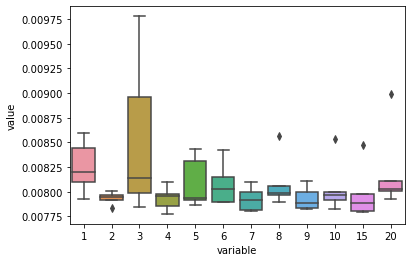

In [48]:
g = sns.boxplot(x='variable', y='value', data=df_melted) #7 

In [50]:
#epoch_number
dic = {}
for i in [50,100,250,500,1000]:
    dic[i] = exp(6,5,128,i,7)
df_1 = pd.DataFrame(dic)
df_melted = pd.melt(df_1)

Model: "sequential_286"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_286 (LSTM)             (None, 128)               66560     
                                                                 
 dense_373 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 1s - loss: 2.4544 - 1s/epoch - 292ms/step
Epoch 2/50
5/5 - 0s - loss: 0.9493 - 50ms/epoch - 10ms/step
Epoch 3/50
5/5 - 0s - loss: 0.1102 - 54ms/epoch - 11ms/step
Epoch 4/50
5/5 - 0s - loss: 0.1564 - 50ms/epoch - 10ms/step
Epoch 5/50
5/5 - 0s - loss: 0.0816 - 61ms/epoch - 12ms/step
Epoch 6/50
5/5 - 0s - loss: 0.0087 - 44ms/epoch - 9ms/step
Epoch 7/50
5/5 - 0s - loss: 0.0398 - 43ms/epoch - 9ms/step
Epoch 8/50
5/5 - 0s - loss:

 lstm_288 (LSTM)             (None, 128)               66560     
                                                                 
 dense_375 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 2s - loss: 2.5469 - 2s/epoch - 353ms/step
Epoch 2/50
5/5 - 0s - loss: 1.0057 - 36ms/epoch - 7ms/step
Epoch 3/50
5/5 - 0s - loss: 0.1310 - 33ms/epoch - 7ms/step
Epoch 4/50
5/5 - 0s - loss: 0.1263 - 34ms/epoch - 7ms/step
Epoch 5/50
5/5 - 0s - loss: 0.0988 - 33ms/epoch - 7ms/step
Epoch 6/50
5/5 - 0s - loss: 0.0055 - 35ms/epoch - 7ms/step
Epoch 7/50
5/5 - 0s - loss: 0.0342 - 46ms/epoch - 9ms/step
Epoch 8/50
5/5 - 0s - loss: 0.0284 - 47ms/epoch - 9ms/step
Epoch 9/50
5/5 - 0s - loss: 0.0043 - 41ms/epoch - 8ms/step
Epoch 10/50
5/5 - 0s - loss: 0.0052 - 37ms/epoch - 7ms/step
Epoch 11/

 dense_377 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 2s - loss: 2.5772 - 2s/epoch - 408ms/step
Epoch 2/50
5/5 - 0s - loss: 0.9687 - 37ms/epoch - 7ms/step
Epoch 3/50
5/5 - 0s - loss: 0.0947 - 36ms/epoch - 7ms/step
Epoch 4/50
5/5 - 0s - loss: 0.1833 - 35ms/epoch - 7ms/step
Epoch 5/50
5/5 - 0s - loss: 0.0772 - 34ms/epoch - 7ms/step
Epoch 6/50
5/5 - 0s - loss: 0.0106 - 34ms/epoch - 7ms/step
Epoch 7/50
5/5 - 0s - loss: 0.0444 - 36ms/epoch - 7ms/step
Epoch 8/50
5/5 - 0s - loss: 0.0268 - 35ms/epoch - 7ms/step
Epoch 9/50
5/5 - 0s - loss: 0.0028 - 36ms/epoch - 7ms/step
Epoch 10/50
5/5 - 0s - loss: 0.0080 - 35ms/epoch - 7ms/step
Epoch 11/50
5/5 - 0s - loss: 0.0065 - 34ms/epoch - 7ms/step
Epoch 12/50
5/5 - 0s - loss: 0.0017 - 36ms/epoch - 7ms/step
Epoch 13/50
5/5 - 0s 

5/5 - 0s - loss: 5.0414e-04 - 40ms/epoch - 8ms/step
Epoch 63/100
5/5 - 0s - loss: 4.9187e-04 - 42ms/epoch - 8ms/step
Epoch 64/100
5/5 - 0s - loss: 4.9623e-04 - 41ms/epoch - 8ms/step
Epoch 65/100
5/5 - 0s - loss: 4.7653e-04 - 38ms/epoch - 8ms/step
Epoch 66/100
5/5 - 0s - loss: 4.7054e-04 - 40ms/epoch - 8ms/step
Epoch 67/100
5/5 - 0s - loss: 4.6165e-04 - 41ms/epoch - 8ms/step
Epoch 68/100
5/5 - 0s - loss: 4.5437e-04 - 41ms/epoch - 8ms/step
Epoch 69/100
5/5 - 0s - loss: 4.4574e-04 - 39ms/epoch - 8ms/step
Epoch 70/100
5/5 - 0s - loss: 4.4315e-04 - 40ms/epoch - 8ms/step
Epoch 71/100
5/5 - 0s - loss: 4.3273e-04 - 41ms/epoch - 8ms/step
Epoch 72/100
5/5 - 0s - loss: 4.2417e-04 - 41ms/epoch - 8ms/step
Epoch 73/100
5/5 - 0s - loss: 4.1840e-04 - 39ms/epoch - 8ms/step
Epoch 74/100
5/5 - 0s - loss: 4.1095e-04 - 41ms/epoch - 8ms/step
Epoch 75/100
5/5 - 0s - loss: 4.1312e-04 - 40ms/epoch - 8ms/step
Epoch 76/100
5/5 - 0s - loss: 4.0546e-04 - 41ms/epoch - 8ms/step
Epoch 77/100
5/5 - 0s - loss: 3.9746e-

5/5 - 0s - loss: 3.6317e-04 - 49ms/epoch - 10ms/step
Epoch 76/100
5/5 - 0s - loss: 3.5598e-04 - 63ms/epoch - 13ms/step
Epoch 77/100
5/5 - 0s - loss: 3.5392e-04 - 45ms/epoch - 9ms/step
Epoch 78/100
5/5 - 0s - loss: 3.4961e-04 - 81ms/epoch - 16ms/step
Epoch 79/100
5/5 - 0s - loss: 3.5125e-04 - 64ms/epoch - 13ms/step
Epoch 80/100
5/5 - 0s - loss: 3.4086e-04 - 53ms/epoch - 11ms/step
Epoch 81/100
5/5 - 0s - loss: 3.4484e-04 - 52ms/epoch - 10ms/step
Epoch 82/100
5/5 - 0s - loss: 3.3977e-04 - 49ms/epoch - 10ms/step
Epoch 83/100
5/5 - 0s - loss: 3.3888e-04 - 75ms/epoch - 15ms/step
Epoch 84/100
5/5 - 0s - loss: 3.3444e-04 - 62ms/epoch - 12ms/step
Epoch 85/100
5/5 - 0s - loss: 3.2384e-04 - 52ms/epoch - 10ms/step
Epoch 86/100
5/5 - 0s - loss: 3.3060e-04 - 61ms/epoch - 12ms/step
Epoch 87/100
5/5 - 0s - loss: 3.2305e-04 - 60ms/epoch - 12ms/step
Epoch 88/100
5/5 - 0s - loss: 3.2042e-04 - 84ms/epoch - 17ms/step
Epoch 89/100
5/5 - 0s - loss: 3.2106e-04 - 70ms/epoch - 14ms/step
Epoch 90/100
5/5 - 0s - 

Epoch 87/100
5/5 - 0s - loss: 3.1813e-04 - 51ms/epoch - 10ms/step
Epoch 88/100
5/5 - 0s - loss: 3.1834e-04 - 56ms/epoch - 11ms/step
Epoch 89/100
5/5 - 0s - loss: 3.1682e-04 - 52ms/epoch - 10ms/step
Epoch 90/100
5/5 - 0s - loss: 3.1300e-04 - 51ms/epoch - 10ms/step
Epoch 91/100
5/5 - 0s - loss: 3.1302e-04 - 60ms/epoch - 12ms/step
Epoch 92/100
5/5 - 0s - loss: 3.0895e-04 - 52ms/epoch - 10ms/step
Epoch 93/100
5/5 - 0s - loss: 3.0545e-04 - 49ms/epoch - 10ms/step
Epoch 94/100
5/5 - 0s - loss: 3.0907e-04 - 51ms/epoch - 10ms/step
Epoch 95/100
5/5 - 0s - loss: 3.0565e-04 - 49ms/epoch - 10ms/step
Epoch 96/100
5/5 - 0s - loss: 3.0321e-04 - 51ms/epoch - 10ms/step
Epoch 97/100
5/5 - 0s - loss: 3.0544e-04 - 60ms/epoch - 12ms/step
Epoch 98/100
5/5 - 0s - loss: 2.9888e-04 - 55ms/epoch - 11ms/step
Epoch 99/100
5/5 - 0s - loss: 3.0180e-04 - 55ms/epoch - 11ms/step
Epoch 100/100
5/5 - 0s - loss: 3.0022e-04 - 53ms/epoch - 11ms/step
5/5 [==============================] - 1s 7ms/step - loss: 2.9469e-04
Train

5/5 - 0s - loss: 3.1284e-04 - 48ms/epoch - 10ms/step
5/5 [==============================] - 1s 5ms/step - loss: 3.0460e-04
Train Score: 0.0003 MSE (0.01745 RMSE)
1/1 [==============================] - 0s 29ms/step - loss: 6.1510e-05
Test Score: 0.0001 MSE (0.00784 RMSE)
Model: "sequential_295"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_295 (LSTM)             (None, 128)               66560     
                                                                 
 dense_382 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 2.0993 - 3s/epoch - 614ms/step
Epoch 2/100
5/5 - 0s - loss: 0.7627 - 49ms/epoch - 10ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0626 - 48ms/epoch - 1

Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
5/5 - 2s - loss: 2.1546 - 2s/epoch - 318ms/step
Epoch 2/250
5/5 - 0s - loss: 0.7379 - 33ms/epoch - 7ms/step
Epoch 3/250
5/5 - 0s - loss: 0.0563 - 32ms/epoch - 6ms/step
Epoch 4/250
5/5 - 0s - loss: 0.1874 - 32ms/epoch - 6ms/step
Epoch 5/250
5/5 - 0s - loss: 0.0378 - 31ms/epoch - 6ms/step
Epoch 6/250
5/5 - 0s - loss: 0.0198 - 32ms/epoch - 6ms/step
Epoch 7/250
5/5 - 0s - loss: 0.0412 - 31ms/epoch - 6ms/step
Epoch 8/250
5/5 - 0s - loss: 0.0146 - 32ms/epoch - 6ms/step
Epoch 9/250
5/5 - 0s - loss: 0.0028 - 32ms/epoch - 6ms/step
Epoch 10/250
5/5 - 0s - loss: 0.0095 - 32ms/epoch - 6ms/step
Epoch 11/250
5/5 - 0s - loss: 0.0035 - 31ms/epoch - 6ms/step
Epoch 12/250
5/5 - 0s - loss: 0.0017 - 32ms/epoch - 6ms/step
Epoch 13/250
5/5 - 0s - loss: 0.0029 - 31ms/epoch - 6ms/step
Epoch 14/250
5/5 - 0s - loss: 0.0013 - 32ms/epoch - 6ms/step
Epoch 15/250
5/5 - 

Epoch 126/250
5/5 - 0s - loss: 3.0725e-04 - 42ms/epoch - 8ms/step
Epoch 127/250
5/5 - 0s - loss: 3.0367e-04 - 36ms/epoch - 7ms/step
Epoch 128/250
5/5 - 0s - loss: 2.8352e-04 - 38ms/epoch - 8ms/step
Epoch 129/250
5/5 - 0s - loss: 3.0534e-04 - 37ms/epoch - 7ms/step
Epoch 130/250
5/5 - 0s - loss: 3.0388e-04 - 37ms/epoch - 7ms/step
Epoch 131/250
5/5 - 0s - loss: 2.8917e-04 - 37ms/epoch - 7ms/step
Epoch 132/250
5/5 - 0s - loss: 3.0211e-04 - 36ms/epoch - 7ms/step
Epoch 133/250
5/5 - 0s - loss: 2.9087e-04 - 37ms/epoch - 7ms/step
Epoch 134/250
5/5 - 0s - loss: 2.9020e-04 - 37ms/epoch - 7ms/step
Epoch 135/250
5/5 - 0s - loss: 2.9024e-04 - 37ms/epoch - 7ms/step
Epoch 136/250
5/5 - 0s - loss: 2.9613e-04 - 37ms/epoch - 7ms/step
Epoch 137/250
5/5 - 0s - loss: 2.8543e-04 - 37ms/epoch - 7ms/step
Epoch 138/250
5/5 - 0s - loss: 2.9373e-04 - 37ms/epoch - 7ms/step
Epoch 139/250
5/5 - 0s - loss: 2.9149e-04 - 37ms/epoch - 7ms/step
Epoch 140/250
5/5 - 0s - loss: 2.9116e-04 - 37ms/epoch - 7ms/step
Epoch 141/

5/5 - 0s - loss: 3.0484e-04 - 45ms/epoch - 9ms/step
5/5 [==============================] - 1s 4ms/step - loss: 2.8646e-04
Train Score: 0.0003 MSE (0.01693 RMSE)
1/1 [==============================] - 0s 22ms/step - loss: 9.5824e-05
Test Score: 0.0001 MSE (0.00979 RMSE)
Model: "sequential_297"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_297 (LSTM)             (None, 128)               66560     
                                                                 
 dense_384 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
5/5 - 2s - loss: 1.8610 - 2s/epoch - 417ms/step
Epoch 2/250
5/5 - 0s - loss: 0.5261 - 62ms/epoch - 12ms/step
Epoch 3/250
5/5 - 0s - loss: 0.0491 - 47ms/epoch - 9m

5/5 - 0s - loss: 2.9388e-04 - 41ms/epoch - 8ms/step
Epoch 114/250
5/5 - 0s - loss: 2.8812e-04 - 42ms/epoch - 8ms/step
Epoch 115/250
5/5 - 0s - loss: 2.8751e-04 - 39ms/epoch - 8ms/step
Epoch 116/250
5/5 - 0s - loss: 2.8997e-04 - 39ms/epoch - 8ms/step
Epoch 117/250
5/5 - 0s - loss: 2.8507e-04 - 41ms/epoch - 8ms/step
Epoch 118/250
5/5 - 0s - loss: 2.9404e-04 - 39ms/epoch - 8ms/step
Epoch 119/250
5/5 - 0s - loss: 3.0075e-04 - 42ms/epoch - 8ms/step
Epoch 120/250
5/5 - 0s - loss: 2.9266e-04 - 41ms/epoch - 8ms/step
Epoch 121/250
5/5 - 0s - loss: 2.8270e-04 - 41ms/epoch - 8ms/step
Epoch 122/250
5/5 - 0s - loss: 2.8876e-04 - 38ms/epoch - 8ms/step
Epoch 123/250
5/5 - 0s - loss: 2.8740e-04 - 41ms/epoch - 8ms/step
Epoch 124/250
5/5 - 0s - loss: 2.8528e-04 - 39ms/epoch - 8ms/step
Epoch 125/250
5/5 - 0s - loss: 2.8259e-04 - 42ms/epoch - 8ms/step
Epoch 126/250
5/5 - 0s - loss: 2.8163e-04 - 39ms/epoch - 8ms/step
Epoch 127/250
5/5 - 0s - loss: 2.8253e-04 - 41ms/epoch - 8ms/step
Epoch 128/250
5/5 - 0s -

5/5 - 0s - loss: 2.9035e-04 - 41ms/epoch - 8ms/step
Epoch 238/250
5/5 - 0s - loss: 2.7950e-04 - 46ms/epoch - 9ms/step
Epoch 239/250
5/5 - 0s - loss: 2.8179e-04 - 46ms/epoch - 9ms/step
Epoch 240/250
5/5 - 0s - loss: 2.8470e-04 - 42ms/epoch - 8ms/step
Epoch 241/250
5/5 - 0s - loss: 2.9925e-04 - 40ms/epoch - 8ms/step
Epoch 242/250
5/5 - 0s - loss: 2.8036e-04 - 41ms/epoch - 8ms/step
Epoch 243/250
5/5 - 0s - loss: 2.7871e-04 - 40ms/epoch - 8ms/step
Epoch 244/250
5/5 - 0s - loss: 2.8192e-04 - 67ms/epoch - 13ms/step
Epoch 245/250
5/5 - 0s - loss: 2.8762e-04 - 44ms/epoch - 9ms/step
Epoch 246/250
5/5 - 0s - loss: 2.7626e-04 - 38ms/epoch - 8ms/step
Epoch 247/250
5/5 - 0s - loss: 2.7645e-04 - 36ms/epoch - 7ms/step
Epoch 248/250
5/5 - 0s - loss: 2.7524e-04 - 37ms/epoch - 7ms/step
Epoch 249/250
5/5 - 0s - loss: 2.8262e-04 - 36ms/epoch - 7ms/step
Epoch 250/250
5/5 - 0s - loss: 2.7781e-04 - 36ms/epoch - 7ms/step
5/5 [==============================] - 0s 4ms/step - loss: 2.8080e-04
Train Score: 0.0003

5/5 - 0s - loss: 2.9695e-04 - 38ms/epoch - 8ms/step
Epoch 101/250
5/5 - 0s - loss: 3.0190e-04 - 38ms/epoch - 8ms/step
Epoch 102/250
5/5 - 0s - loss: 2.9401e-04 - 37ms/epoch - 7ms/step
Epoch 103/250
5/5 - 0s - loss: 2.9529e-04 - 38ms/epoch - 8ms/step
Epoch 104/250
5/5 - 0s - loss: 2.9460e-04 - 38ms/epoch - 8ms/step
Epoch 105/250
5/5 - 0s - loss: 2.9263e-04 - 37ms/epoch - 7ms/step
Epoch 106/250
5/5 - 0s - loss: 3.0063e-04 - 38ms/epoch - 8ms/step
Epoch 107/250
5/5 - 0s - loss: 3.0450e-04 - 38ms/epoch - 8ms/step
Epoch 108/250
5/5 - 0s - loss: 2.9060e-04 - 38ms/epoch - 8ms/step
Epoch 109/250
5/5 - 0s - loss: 3.0947e-04 - 38ms/epoch - 8ms/step
Epoch 110/250
5/5 - 0s - loss: 2.9051e-04 - 38ms/epoch - 8ms/step
Epoch 111/250
5/5 - 0s - loss: 2.9767e-04 - 38ms/epoch - 8ms/step
Epoch 112/250
5/5 - 0s - loss: 2.8443e-04 - 38ms/epoch - 8ms/step
Epoch 113/250
5/5 - 0s - loss: 3.0315e-04 - 38ms/epoch - 8ms/step
Epoch 114/250
5/5 - 0s - loss: 3.0832e-04 - 37ms/epoch - 7ms/step
Epoch 115/250
5/5 - 0s -

Epoch 225/250
5/5 - 0s - loss: 3.2391e-04 - 38ms/epoch - 8ms/step
Epoch 226/250
5/5 - 0s - loss: 3.0846e-04 - 38ms/epoch - 8ms/step
Epoch 227/250
5/5 - 0s - loss: 2.8951e-04 - 38ms/epoch - 8ms/step
Epoch 228/250
5/5 - 0s - loss: 2.8385e-04 - 38ms/epoch - 8ms/step
Epoch 229/250
5/5 - 0s - loss: 2.9229e-04 - 38ms/epoch - 8ms/step
Epoch 230/250
5/5 - 0s - loss: 2.7750e-04 - 38ms/epoch - 8ms/step
Epoch 231/250
5/5 - 0s - loss: 2.8059e-04 - 38ms/epoch - 8ms/step
Epoch 232/250
5/5 - 0s - loss: 2.8329e-04 - 38ms/epoch - 8ms/step
Epoch 233/250
5/5 - 0s - loss: 2.9238e-04 - 38ms/epoch - 8ms/step
Epoch 234/250
5/5 - 0s - loss: 3.0315e-04 - 38ms/epoch - 8ms/step
Epoch 235/250
5/5 - 0s - loss: 2.9169e-04 - 38ms/epoch - 8ms/step
Epoch 236/250
5/5 - 0s - loss: 2.8529e-04 - 40ms/epoch - 8ms/step
Epoch 237/250
5/5 - 0s - loss: 2.7940e-04 - 39ms/epoch - 8ms/step
Epoch 238/250
5/5 - 0s - loss: 2.8010e-04 - 40ms/epoch - 8ms/step
Epoch 239/250
5/5 - 0s - loss: 2.7884e-04 - 38ms/epoch - 8ms/step
Epoch 240/

Epoch 88/250
5/5 - 0s - loss: 3.2414e-04 - 35ms/epoch - 7ms/step
Epoch 89/250
5/5 - 0s - loss: 3.2077e-04 - 35ms/epoch - 7ms/step
Epoch 90/250
5/5 - 0s - loss: 3.2591e-04 - 35ms/epoch - 7ms/step
Epoch 91/250
5/5 - 0s - loss: 3.1672e-04 - 35ms/epoch - 7ms/step
Epoch 92/250
5/5 - 0s - loss: 3.1471e-04 - 34ms/epoch - 7ms/step
Epoch 93/250
5/5 - 0s - loss: 3.2588e-04 - 35ms/epoch - 7ms/step
Epoch 94/250
5/5 - 0s - loss: 3.1918e-04 - 36ms/epoch - 7ms/step
Epoch 95/250
5/5 - 0s - loss: 3.2482e-04 - 35ms/epoch - 7ms/step
Epoch 96/250
5/5 - 0s - loss: 3.0788e-04 - 35ms/epoch - 7ms/step
Epoch 97/250
5/5 - 0s - loss: 3.0822e-04 - 35ms/epoch - 7ms/step
Epoch 98/250
5/5 - 0s - loss: 3.0734e-04 - 35ms/epoch - 7ms/step
Epoch 99/250
5/5 - 0s - loss: 3.0619e-04 - 34ms/epoch - 7ms/step
Epoch 100/250
5/5 - 0s - loss: 3.0708e-04 - 35ms/epoch - 7ms/step
Epoch 101/250
5/5 - 0s - loss: 3.1033e-04 - 35ms/epoch - 7ms/step
Epoch 102/250
5/5 - 0s - loss: 2.9808e-04 - 36ms/epoch - 7ms/step
Epoch 103/250
5/5 - 0s

Epoch 213/250
5/5 - 0s - loss: 3.0438e-04 - 34ms/epoch - 7ms/step
Epoch 214/250
5/5 - 0s - loss: 3.0026e-04 - 35ms/epoch - 7ms/step
Epoch 215/250
5/5 - 0s - loss: 2.9333e-04 - 35ms/epoch - 7ms/step
Epoch 216/250
5/5 - 0s - loss: 2.8821e-04 - 34ms/epoch - 7ms/step
Epoch 217/250
5/5 - 0s - loss: 2.8554e-04 - 35ms/epoch - 7ms/step
Epoch 218/250
5/5 - 0s - loss: 2.8274e-04 - 36ms/epoch - 7ms/step
Epoch 219/250
5/5 - 0s - loss: 2.8447e-04 - 37ms/epoch - 7ms/step
Epoch 220/250
5/5 - 0s - loss: 2.8797e-04 - 35ms/epoch - 7ms/step
Epoch 221/250
5/5 - 0s - loss: 2.8529e-04 - 35ms/epoch - 7ms/step
Epoch 222/250
5/5 - 0s - loss: 2.8576e-04 - 35ms/epoch - 7ms/step
Epoch 223/250
5/5 - 0s - loss: 2.8361e-04 - 35ms/epoch - 7ms/step
Epoch 224/250
5/5 - 0s - loss: 3.0191e-04 - 34ms/epoch - 7ms/step
Epoch 225/250
5/5 - 0s - loss: 2.8256e-04 - 34ms/epoch - 7ms/step
Epoch 226/250
5/5 - 0s - loss: 2.8899e-04 - 34ms/epoch - 7ms/step
Epoch 227/250
5/5 - 0s - loss: 2.8372e-04 - 34ms/epoch - 7ms/step
Epoch 228/

Epoch 77/250
5/5 - 0s - loss: 3.9983e-04 - 35ms/epoch - 7ms/step
Epoch 78/250
5/5 - 0s - loss: 3.9134e-04 - 35ms/epoch - 7ms/step
Epoch 79/250
5/5 - 0s - loss: 3.9149e-04 - 35ms/epoch - 7ms/step
Epoch 80/250
5/5 - 0s - loss: 3.8944e-04 - 35ms/epoch - 7ms/step
Epoch 81/250
5/5 - 0s - loss: 3.8529e-04 - 34ms/epoch - 7ms/step
Epoch 82/250
5/5 - 0s - loss: 3.7468e-04 - 35ms/epoch - 7ms/step
Epoch 83/250
5/5 - 0s - loss: 3.6796e-04 - 35ms/epoch - 7ms/step
Epoch 84/250
5/5 - 0s - loss: 3.6209e-04 - 35ms/epoch - 7ms/step
Epoch 85/250
5/5 - 0s - loss: 3.5473e-04 - 34ms/epoch - 7ms/step
Epoch 86/250
5/5 - 0s - loss: 3.6427e-04 - 35ms/epoch - 7ms/step
Epoch 87/250
5/5 - 0s - loss: 3.4311e-04 - 35ms/epoch - 7ms/step
Epoch 88/250
5/5 - 0s - loss: 3.6562e-04 - 35ms/epoch - 7ms/step
Epoch 89/250
5/5 - 0s - loss: 3.4007e-04 - 35ms/epoch - 7ms/step
Epoch 90/250
5/5 - 0s - loss: 3.4700e-04 - 34ms/epoch - 7ms/step
Epoch 91/250
5/5 - 0s - loss: 3.3804e-04 - 35ms/epoch - 7ms/step
Epoch 92/250
5/5 - 0s - l

Epoch 202/250
5/5 - 0s - loss: 2.8754e-04 - 35ms/epoch - 7ms/step
Epoch 203/250
5/5 - 0s - loss: 2.9009e-04 - 36ms/epoch - 7ms/step
Epoch 204/250
5/5 - 0s - loss: 3.0188e-04 - 35ms/epoch - 7ms/step
Epoch 205/250
5/5 - 0s - loss: 2.9808e-04 - 35ms/epoch - 7ms/step
Epoch 206/250
5/5 - 0s - loss: 2.8574e-04 - 34ms/epoch - 7ms/step
Epoch 207/250
5/5 - 0s - loss: 2.8365e-04 - 34ms/epoch - 7ms/step
Epoch 208/250
5/5 - 0s - loss: 2.8980e-04 - 35ms/epoch - 7ms/step
Epoch 209/250
5/5 - 0s - loss: 2.8789e-04 - 35ms/epoch - 7ms/step
Epoch 210/250
5/5 - 0s - loss: 2.8340e-04 - 35ms/epoch - 7ms/step
Epoch 211/250
5/5 - 0s - loss: 2.8844e-04 - 34ms/epoch - 7ms/step
Epoch 212/250
5/5 - 0s - loss: 2.9597e-04 - 35ms/epoch - 7ms/step
Epoch 213/250
5/5 - 0s - loss: 2.8604e-04 - 35ms/epoch - 7ms/step
Epoch 214/250
5/5 - 0s - loss: 2.8347e-04 - 34ms/epoch - 7ms/step
Epoch 215/250
5/5 - 0s - loss: 2.9084e-04 - 35ms/epoch - 7ms/step
Epoch 216/250
5/5 - 0s - loss: 2.8819e-04 - 35ms/epoch - 7ms/step
Epoch 217/

Epoch 65/500
5/5 - 0s - loss: 3.6868e-04 - 40ms/epoch - 8ms/step
Epoch 66/500
5/5 - 0s - loss: 3.6099e-04 - 41ms/epoch - 8ms/step
Epoch 67/500
5/5 - 0s - loss: 3.5456e-04 - 40ms/epoch - 8ms/step
Epoch 68/500
5/5 - 0s - loss: 3.5256e-04 - 40ms/epoch - 8ms/step
Epoch 69/500
5/5 - 0s - loss: 3.5338e-04 - 40ms/epoch - 8ms/step
Epoch 70/500
5/5 - 0s - loss: 3.4293e-04 - 41ms/epoch - 8ms/step
Epoch 71/500
5/5 - 0s - loss: 3.4037e-04 - 40ms/epoch - 8ms/step
Epoch 72/500
5/5 - 0s - loss: 3.3664e-04 - 40ms/epoch - 8ms/step
Epoch 73/500
5/5 - 0s - loss: 3.3392e-04 - 41ms/epoch - 8ms/step
Epoch 74/500
5/5 - 0s - loss: 3.2981e-04 - 40ms/epoch - 8ms/step
Epoch 75/500
5/5 - 0s - loss: 3.2749e-04 - 40ms/epoch - 8ms/step
Epoch 76/500
5/5 - 0s - loss: 3.2627e-04 - 41ms/epoch - 8ms/step
Epoch 77/500
5/5 - 0s - loss: 3.2151e-04 - 40ms/epoch - 8ms/step
Epoch 78/500
5/5 - 0s - loss: 3.2233e-04 - 38ms/epoch - 8ms/step
Epoch 79/500
5/5 - 0s - loss: 3.1379e-04 - 34ms/epoch - 7ms/step
Epoch 80/500
5/5 - 0s - l

Epoch 190/500
5/5 - 0s - loss: 3.5827e-04 - 40ms/epoch - 8ms/step
Epoch 191/500
5/5 - 0s - loss: 2.9167e-04 - 40ms/epoch - 8ms/step
Epoch 192/500
5/5 - 0s - loss: 2.7994e-04 - 40ms/epoch - 8ms/step
Epoch 193/500
5/5 - 0s - loss: 2.6722e-04 - 42ms/epoch - 8ms/step
Epoch 194/500
5/5 - 0s - loss: 2.9069e-04 - 41ms/epoch - 8ms/step
Epoch 195/500
5/5 - 0s - loss: 2.7121e-04 - 40ms/epoch - 8ms/step
Epoch 196/500
5/5 - 0s - loss: 2.8308e-04 - 40ms/epoch - 8ms/step
Epoch 197/500
5/5 - 0s - loss: 2.7306e-04 - 40ms/epoch - 8ms/step
Epoch 198/500
5/5 - 0s - loss: 2.7548e-04 - 40ms/epoch - 8ms/step
Epoch 199/500
5/5 - 0s - loss: 2.7339e-04 - 40ms/epoch - 8ms/step
Epoch 200/500
5/5 - 0s - loss: 2.6863e-04 - 42ms/epoch - 8ms/step
Epoch 201/500
5/5 - 0s - loss: 2.8167e-04 - 40ms/epoch - 8ms/step
Epoch 202/500
5/5 - 0s - loss: 2.7680e-04 - 40ms/epoch - 8ms/step
Epoch 203/500
5/5 - 0s - loss: 2.9473e-04 - 40ms/epoch - 8ms/step
Epoch 204/500
5/5 - 0s - loss: 3.0387e-04 - 40ms/epoch - 8ms/step
Epoch 205/

5/5 - 0s - loss: 2.9478e-04 - 40ms/epoch - 8ms/step
Epoch 315/500
5/5 - 0s - loss: 3.1239e-04 - 39ms/epoch - 8ms/step
Epoch 316/500
5/5 - 0s - loss: 3.0613e-04 - 40ms/epoch - 8ms/step
Epoch 317/500
5/5 - 0s - loss: 3.1851e-04 - 41ms/epoch - 8ms/step
Epoch 318/500
5/5 - 0s - loss: 3.1904e-04 - 41ms/epoch - 8ms/step
Epoch 319/500
5/5 - 0s - loss: 2.6268e-04 - 41ms/epoch - 8ms/step
Epoch 320/500
5/5 - 0s - loss: 2.8245e-04 - 39ms/epoch - 8ms/step
Epoch 321/500
5/5 - 0s - loss: 2.6617e-04 - 40ms/epoch - 8ms/step
Epoch 322/500
5/5 - 0s - loss: 2.6675e-04 - 40ms/epoch - 8ms/step
Epoch 323/500
5/5 - 0s - loss: 2.9973e-04 - 40ms/epoch - 8ms/step
Epoch 324/500
5/5 - 0s - loss: 2.8465e-04 - 40ms/epoch - 8ms/step
Epoch 325/500
5/5 - 0s - loss: 2.8292e-04 - 40ms/epoch - 8ms/step
Epoch 326/500
5/5 - 0s - loss: 2.9978e-04 - 41ms/epoch - 8ms/step
Epoch 327/500
5/5 - 0s - loss: 2.9051e-04 - 40ms/epoch - 8ms/step
Epoch 328/500
5/5 - 0s - loss: 2.8378e-04 - 40ms/epoch - 8ms/step
Epoch 329/500
5/5 - 0s -

Epoch 439/500
5/5 - 0s - loss: 2.8436e-04 - 40ms/epoch - 8ms/step
Epoch 440/500
5/5 - 0s - loss: 4.3097e-04 - 40ms/epoch - 8ms/step
Epoch 441/500
5/5 - 0s - loss: 3.9275e-04 - 40ms/epoch - 8ms/step
Epoch 442/500
5/5 - 0s - loss: 2.8139e-04 - 40ms/epoch - 8ms/step
Epoch 443/500
5/5 - 0s - loss: 3.0066e-04 - 40ms/epoch - 8ms/step
Epoch 444/500
5/5 - 0s - loss: 2.6833e-04 - 40ms/epoch - 8ms/step
Epoch 445/500
5/5 - 0s - loss: 2.8180e-04 - 40ms/epoch - 8ms/step
Epoch 446/500
5/5 - 0s - loss: 2.7243e-04 - 41ms/epoch - 8ms/step
Epoch 447/500
5/5 - 0s - loss: 3.6517e-04 - 40ms/epoch - 8ms/step
Epoch 448/500
5/5 - 0s - loss: 2.7989e-04 - 41ms/epoch - 8ms/step
Epoch 449/500
5/5 - 0s - loss: 3.0721e-04 - 40ms/epoch - 8ms/step
Epoch 450/500
5/5 - 0s - loss: 3.2001e-04 - 40ms/epoch - 8ms/step
Epoch 451/500
5/5 - 0s - loss: 3.8524e-04 - 41ms/epoch - 8ms/step
Epoch 452/500
5/5 - 0s - loss: 4.0357e-04 - 41ms/epoch - 8ms/step
Epoch 453/500
5/5 - 0s - loss: 3.3789e-04 - 40ms/epoch - 8ms/step
Epoch 454/

Epoch 52/500
5/5 - 0s - loss: 4.9028e-04 - 40ms/epoch - 8ms/step
Epoch 53/500
5/5 - 0s - loss: 4.8082e-04 - 40ms/epoch - 8ms/step
Epoch 54/500
5/5 - 0s - loss: 4.7156e-04 - 41ms/epoch - 8ms/step
Epoch 55/500
5/5 - 0s - loss: 4.6379e-04 - 41ms/epoch - 8ms/step
Epoch 56/500
5/5 - 0s - loss: 4.4904e-04 - 42ms/epoch - 8ms/step
Epoch 57/500
5/5 - 0s - loss: 4.5029e-04 - 40ms/epoch - 8ms/step
Epoch 58/500
5/5 - 0s - loss: 4.4198e-04 - 41ms/epoch - 8ms/step
Epoch 59/500
5/5 - 0s - loss: 4.4412e-04 - 40ms/epoch - 8ms/step
Epoch 60/500
5/5 - 0s - loss: 4.3379e-04 - 40ms/epoch - 8ms/step
Epoch 61/500
5/5 - 0s - loss: 4.2376e-04 - 40ms/epoch - 8ms/step
Epoch 62/500
5/5 - 0s - loss: 4.1116e-04 - 40ms/epoch - 8ms/step
Epoch 63/500
5/5 - 0s - loss: 4.0684e-04 - 40ms/epoch - 8ms/step
Epoch 64/500
5/5 - 0s - loss: 4.0088e-04 - 42ms/epoch - 8ms/step
Epoch 65/500
5/5 - 0s - loss: 3.9278e-04 - 41ms/epoch - 8ms/step
Epoch 66/500
5/5 - 0s - loss: 3.8633e-04 - 40ms/epoch - 8ms/step
Epoch 67/500
5/5 - 0s - l

Epoch 177/500
5/5 - 0s - loss: 2.8050e-04 - 40ms/epoch - 8ms/step
Epoch 178/500
5/5 - 0s - loss: 2.8264e-04 - 40ms/epoch - 8ms/step
Epoch 179/500
5/5 - 0s - loss: 2.8826e-04 - 40ms/epoch - 8ms/step
Epoch 180/500
5/5 - 0s - loss: 2.8093e-04 - 40ms/epoch - 8ms/step
Epoch 181/500
5/5 - 0s - loss: 2.7458e-04 - 40ms/epoch - 8ms/step
Epoch 182/500
5/5 - 0s - loss: 2.7827e-04 - 41ms/epoch - 8ms/step
Epoch 183/500
5/5 - 0s - loss: 2.8299e-04 - 38ms/epoch - 8ms/step
Epoch 184/500
5/5 - 0s - loss: 3.0408e-04 - 33ms/epoch - 7ms/step
Epoch 185/500
5/5 - 0s - loss: 3.2318e-04 - 34ms/epoch - 7ms/step
Epoch 186/500
5/5 - 0s - loss: 3.1209e-04 - 34ms/epoch - 7ms/step
Epoch 187/500
5/5 - 0s - loss: 2.8941e-04 - 34ms/epoch - 7ms/step
Epoch 188/500
5/5 - 0s - loss: 2.8059e-04 - 33ms/epoch - 7ms/step
Epoch 189/500
5/5 - 0s - loss: 2.8097e-04 - 33ms/epoch - 7ms/step
Epoch 190/500
5/5 - 0s - loss: 2.8836e-04 - 34ms/epoch - 7ms/step
Epoch 191/500
5/5 - 0s - loss: 2.8526e-04 - 33ms/epoch - 7ms/step
Epoch 192/

5/5 - 0s - loss: 2.9291e-04 - 41ms/epoch - 8ms/step
Epoch 302/500
5/5 - 0s - loss: 2.9260e-04 - 40ms/epoch - 8ms/step
Epoch 303/500
5/5 - 0s - loss: 2.9826e-04 - 40ms/epoch - 8ms/step
Epoch 304/500
5/5 - 0s - loss: 3.0126e-04 - 41ms/epoch - 8ms/step
Epoch 305/500
5/5 - 0s - loss: 3.1745e-04 - 41ms/epoch - 8ms/step
Epoch 306/500
5/5 - 0s - loss: 2.8504e-04 - 52ms/epoch - 10ms/step
Epoch 307/500
5/5 - 0s - loss: 3.1544e-04 - 46ms/epoch - 9ms/step
Epoch 308/500
5/5 - 0s - loss: 2.8479e-04 - 44ms/epoch - 9ms/step
Epoch 309/500
5/5 - 0s - loss: 2.8573e-04 - 45ms/epoch - 9ms/step
Epoch 310/500
5/5 - 0s - loss: 2.9838e-04 - 44ms/epoch - 9ms/step
Epoch 311/500
5/5 - 0s - loss: 3.1390e-04 - 42ms/epoch - 8ms/step
Epoch 312/500
5/5 - 0s - loss: 2.8714e-04 - 42ms/epoch - 8ms/step
Epoch 313/500
5/5 - 0s - loss: 2.8701e-04 - 42ms/epoch - 8ms/step
Epoch 314/500
5/5 - 0s - loss: 2.8493e-04 - 41ms/epoch - 8ms/step
Epoch 315/500
5/5 - 0s - loss: 2.8600e-04 - 40ms/epoch - 8ms/step
Epoch 316/500
5/5 - 0s 

5/5 - 0s - loss: 3.6569e-04 - 58ms/epoch - 12ms/step
Epoch 426/500
5/5 - 0s - loss: 3.1225e-04 - 43ms/epoch - 9ms/step
Epoch 427/500
5/5 - 0s - loss: 2.9397e-04 - 43ms/epoch - 9ms/step
Epoch 428/500
5/5 - 0s - loss: 3.0503e-04 - 44ms/epoch - 9ms/step
Epoch 429/500
5/5 - 0s - loss: 2.9653e-04 - 45ms/epoch - 9ms/step
Epoch 430/500
5/5 - 0s - loss: 2.8013e-04 - 47ms/epoch - 9ms/step
Epoch 431/500
5/5 - 0s - loss: 2.7612e-04 - 44ms/epoch - 9ms/step
Epoch 432/500
5/5 - 0s - loss: 2.8686e-04 - 42ms/epoch - 8ms/step
Epoch 433/500
5/5 - 0s - loss: 3.3386e-04 - 45ms/epoch - 9ms/step
Epoch 434/500
5/5 - 0s - loss: 3.0456e-04 - 46ms/epoch - 9ms/step
Epoch 435/500
5/5 - 0s - loss: 2.9008e-04 - 42ms/epoch - 8ms/step
Epoch 436/500
5/5 - 0s - loss: 3.0616e-04 - 43ms/epoch - 9ms/step
Epoch 437/500
5/5 - 0s - loss: 2.8919e-04 - 45ms/epoch - 9ms/step
Epoch 438/500
5/5 - 0s - loss: 2.8571e-04 - 46ms/epoch - 9ms/step
Epoch 439/500
5/5 - 0s - loss: 3.1902e-04 - 43ms/epoch - 9ms/step
Epoch 440/500
5/5 - 0s 

Epoch 38/500
5/5 - 0s - loss: 7.0086e-04 - 34ms/epoch - 7ms/step
Epoch 39/500
5/5 - 0s - loss: 6.8699e-04 - 35ms/epoch - 7ms/step
Epoch 40/500
5/5 - 0s - loss: 6.6965e-04 - 35ms/epoch - 7ms/step
Epoch 41/500
5/5 - 0s - loss: 6.5697e-04 - 33ms/epoch - 7ms/step
Epoch 42/500
5/5 - 0s - loss: 6.4232e-04 - 35ms/epoch - 7ms/step
Epoch 43/500
5/5 - 0s - loss: 6.3342e-04 - 34ms/epoch - 7ms/step
Epoch 44/500
5/5 - 0s - loss: 6.2062e-04 - 39ms/epoch - 8ms/step
Epoch 45/500
5/5 - 0s - loss: 6.0506e-04 - 40ms/epoch - 8ms/step
Epoch 46/500
5/5 - 0s - loss: 5.9793e-04 - 39ms/epoch - 8ms/step
Epoch 47/500
5/5 - 0s - loss: 5.7909e-04 - 37ms/epoch - 7ms/step
Epoch 48/500
5/5 - 0s - loss: 5.8850e-04 - 38ms/epoch - 8ms/step
Epoch 49/500
5/5 - 0s - loss: 5.5503e-04 - 41ms/epoch - 8ms/step
Epoch 50/500
5/5 - 0s - loss: 5.5883e-04 - 39ms/epoch - 8ms/step
Epoch 51/500
5/5 - 0s - loss: 5.3680e-04 - 41ms/epoch - 8ms/step
Epoch 52/500
5/5 - 0s - loss: 5.2912e-04 - 40ms/epoch - 8ms/step
Epoch 53/500
5/5 - 0s - l

5/5 - 0s - loss: 2.9126e-04 - 39ms/epoch - 8ms/step
Epoch 164/500
5/5 - 0s - loss: 2.8341e-04 - 41ms/epoch - 8ms/step
Epoch 165/500
5/5 - 0s - loss: 2.9280e-04 - 41ms/epoch - 8ms/step
Epoch 166/500
5/5 - 0s - loss: 2.8569e-04 - 40ms/epoch - 8ms/step
Epoch 167/500
5/5 - 0s - loss: 2.8854e-04 - 40ms/epoch - 8ms/step
Epoch 168/500
5/5 - 0s - loss: 3.2106e-04 - 40ms/epoch - 8ms/step
Epoch 169/500
5/5 - 0s - loss: 3.0834e-04 - 40ms/epoch - 8ms/step
Epoch 170/500
5/5 - 0s - loss: 3.0920e-04 - 38ms/epoch - 8ms/step
Epoch 171/500
5/5 - 0s - loss: 2.8836e-04 - 36ms/epoch - 7ms/step
Epoch 172/500
5/5 - 0s - loss: 3.1050e-04 - 39ms/epoch - 8ms/step
Epoch 173/500
5/5 - 0s - loss: 2.8699e-04 - 40ms/epoch - 8ms/step
Epoch 174/500
5/5 - 0s - loss: 2.9092e-04 - 40ms/epoch - 8ms/step
Epoch 175/500
5/5 - 0s - loss: 2.9109e-04 - 39ms/epoch - 8ms/step
Epoch 176/500
5/5 - 0s - loss: 2.9932e-04 - 40ms/epoch - 8ms/step
Epoch 177/500
5/5 - 0s - loss: 2.9806e-04 - 38ms/epoch - 8ms/step
Epoch 178/500
5/5 - 0s -

Epoch 288/500
5/5 - 0s - loss: 4.2506e-04 - 55ms/epoch - 11ms/step
Epoch 289/500
5/5 - 0s - loss: 3.8663e-04 - 38ms/epoch - 8ms/step
Epoch 290/500
5/5 - 0s - loss: 3.3188e-04 - 35ms/epoch - 7ms/step
Epoch 291/500
5/5 - 0s - loss: 3.1980e-04 - 35ms/epoch - 7ms/step
Epoch 292/500
5/5 - 0s - loss: 2.9173e-04 - 35ms/epoch - 7ms/step
Epoch 293/500
5/5 - 0s - loss: 2.8840e-04 - 36ms/epoch - 7ms/step
Epoch 294/500
5/5 - 0s - loss: 3.0719e-04 - 34ms/epoch - 7ms/step
Epoch 295/500
5/5 - 0s - loss: 3.7341e-04 - 34ms/epoch - 7ms/step
Epoch 296/500
5/5 - 0s - loss: 3.0641e-04 - 35ms/epoch - 7ms/step
Epoch 297/500
5/5 - 0s - loss: 2.9436e-04 - 34ms/epoch - 7ms/step
Epoch 298/500
5/5 - 0s - loss: 2.8298e-04 - 34ms/epoch - 7ms/step
Epoch 299/500
5/5 - 0s - loss: 2.9006e-04 - 35ms/epoch - 7ms/step
Epoch 300/500
5/5 - 0s - loss: 2.8353e-04 - 36ms/epoch - 7ms/step
Epoch 301/500
5/5 - 0s - loss: 2.9180e-04 - 39ms/epoch - 8ms/step
Epoch 302/500
5/5 - 0s - loss: 3.2634e-04 - 49ms/epoch - 10ms/step
Epoch 30

5/5 - 0s - loss: 3.0874e-04 - 34ms/epoch - 7ms/step
Epoch 413/500
5/5 - 0s - loss: 3.0959e-04 - 34ms/epoch - 7ms/step
Epoch 414/500
5/5 - 0s - loss: 2.9775e-04 - 35ms/epoch - 7ms/step
Epoch 415/500
5/5 - 0s - loss: 3.4596e-04 - 35ms/epoch - 7ms/step
Epoch 416/500
5/5 - 0s - loss: 2.9783e-04 - 34ms/epoch - 7ms/step
Epoch 417/500
5/5 - 0s - loss: 2.8405e-04 - 34ms/epoch - 7ms/step
Epoch 418/500
5/5 - 0s - loss: 3.2520e-04 - 35ms/epoch - 7ms/step
Epoch 419/500
5/5 - 0s - loss: 3.0348e-04 - 35ms/epoch - 7ms/step
Epoch 420/500
5/5 - 0s - loss: 2.8833e-04 - 34ms/epoch - 7ms/step
Epoch 421/500
5/5 - 0s - loss: 2.8488e-04 - 34ms/epoch - 7ms/step
Epoch 422/500
5/5 - 0s - loss: 2.7753e-04 - 35ms/epoch - 7ms/step
Epoch 423/500
5/5 - 0s - loss: 2.7850e-04 - 35ms/epoch - 7ms/step
Epoch 424/500
5/5 - 0s - loss: 2.8141e-04 - 35ms/epoch - 7ms/step
Epoch 425/500
5/5 - 0s - loss: 2.9224e-04 - 34ms/epoch - 7ms/step
Epoch 426/500
5/5 - 0s - loss: 3.0502e-04 - 34ms/epoch - 7ms/step
Epoch 427/500
5/5 - 0s -

Epoch 25/500
5/5 - 0s - loss: 9.9739e-04 - 35ms/epoch - 7ms/step
Epoch 26/500
5/5 - 0s - loss: 9.7154e-04 - 35ms/epoch - 7ms/step
Epoch 27/500
5/5 - 0s - loss: 9.4622e-04 - 35ms/epoch - 7ms/step
Epoch 28/500
5/5 - 0s - loss: 9.3762e-04 - 35ms/epoch - 7ms/step
Epoch 29/500
5/5 - 0s - loss: 9.0914e-04 - 35ms/epoch - 7ms/step
Epoch 30/500
5/5 - 0s - loss: 9.0550e-04 - 34ms/epoch - 7ms/step
Epoch 31/500
5/5 - 0s - loss: 8.7891e-04 - 34ms/epoch - 7ms/step
Epoch 32/500
5/5 - 0s - loss: 8.6698e-04 - 35ms/epoch - 7ms/step
Epoch 33/500
5/5 - 0s - loss: 8.6007e-04 - 34ms/epoch - 7ms/step
Epoch 34/500
5/5 - 0s - loss: 8.3165e-04 - 35ms/epoch - 7ms/step
Epoch 35/500
5/5 - 0s - loss: 8.1993e-04 - 34ms/epoch - 7ms/step
Epoch 36/500
5/5 - 0s - loss: 8.0505e-04 - 34ms/epoch - 7ms/step
Epoch 37/500
5/5 - 0s - loss: 7.9083e-04 - 35ms/epoch - 7ms/step
Epoch 38/500
5/5 - 0s - loss: 7.6374e-04 - 35ms/epoch - 7ms/step
Epoch 39/500
5/5 - 0s - loss: 7.5711e-04 - 35ms/epoch - 7ms/step
Epoch 40/500
5/5 - 0s - l

Epoch 151/500
5/5 - 0s - loss: 3.1555e-04 - 35ms/epoch - 7ms/step
Epoch 152/500
5/5 - 0s - loss: 3.1452e-04 - 35ms/epoch - 7ms/step
Epoch 153/500
5/5 - 0s - loss: 3.0751e-04 - 34ms/epoch - 7ms/step
Epoch 154/500
5/5 - 0s - loss: 2.9641e-04 - 34ms/epoch - 7ms/step
Epoch 155/500
5/5 - 0s - loss: 3.1151e-04 - 34ms/epoch - 7ms/step
Epoch 156/500
5/5 - 0s - loss: 3.0746e-04 - 36ms/epoch - 7ms/step
Epoch 157/500
5/5 - 0s - loss: 2.9062e-04 - 36ms/epoch - 7ms/step
Epoch 158/500
5/5 - 0s - loss: 2.9878e-04 - 36ms/epoch - 7ms/step
Epoch 159/500
5/5 - 0s - loss: 3.0778e-04 - 35ms/epoch - 7ms/step
Epoch 160/500
5/5 - 0s - loss: 3.2883e-04 - 36ms/epoch - 7ms/step
Epoch 161/500
5/5 - 0s - loss: 3.1829e-04 - 35ms/epoch - 7ms/step
Epoch 162/500
5/5 - 0s - loss: 2.8886e-04 - 35ms/epoch - 7ms/step
Epoch 163/500
5/5 - 0s - loss: 3.0816e-04 - 35ms/epoch - 7ms/step
Epoch 164/500
5/5 - 0s - loss: 2.9389e-04 - 35ms/epoch - 7ms/step
Epoch 165/500
5/5 - 0s - loss: 2.9325e-04 - 35ms/epoch - 7ms/step
Epoch 166/

5/5 - 0s - loss: 2.9192e-04 - 35ms/epoch - 7ms/step
Epoch 276/500
5/5 - 0s - loss: 2.9647e-04 - 36ms/epoch - 7ms/step
Epoch 277/500
5/5 - 0s - loss: 2.8989e-04 - 36ms/epoch - 7ms/step
Epoch 278/500
5/5 - 0s - loss: 2.8950e-04 - 35ms/epoch - 7ms/step
Epoch 279/500
5/5 - 0s - loss: 2.9094e-04 - 36ms/epoch - 7ms/step
Epoch 280/500
5/5 - 0s - loss: 2.9314e-04 - 37ms/epoch - 7ms/step
Epoch 281/500
5/5 - 0s - loss: 2.9073e-04 - 37ms/epoch - 7ms/step
Epoch 282/500
5/5 - 0s - loss: 2.8781e-04 - 36ms/epoch - 7ms/step
Epoch 283/500
5/5 - 0s - loss: 2.8686e-04 - 36ms/epoch - 7ms/step
Epoch 284/500
5/5 - 0s - loss: 2.9264e-04 - 35ms/epoch - 7ms/step
Epoch 285/500
5/5 - 0s - loss: 2.9815e-04 - 35ms/epoch - 7ms/step
Epoch 286/500
5/5 - 0s - loss: 2.9227e-04 - 35ms/epoch - 7ms/step
Epoch 287/500
5/5 - 0s - loss: 2.9335e-04 - 35ms/epoch - 7ms/step
Epoch 288/500
5/5 - 0s - loss: 2.8874e-04 - 35ms/epoch - 7ms/step
Epoch 289/500
5/5 - 0s - loss: 2.9866e-04 - 35ms/epoch - 7ms/step
Epoch 290/500
5/5 - 0s -

Epoch 400/500
5/5 - 0s - loss: 3.0621e-04 - 34ms/epoch - 7ms/step
Epoch 401/500
5/5 - 0s - loss: 2.9435e-04 - 35ms/epoch - 7ms/step
Epoch 402/500
5/5 - 0s - loss: 2.8948e-04 - 34ms/epoch - 7ms/step
Epoch 403/500
5/5 - 0s - loss: 2.9881e-04 - 35ms/epoch - 7ms/step
Epoch 404/500
5/5 - 0s - loss: 3.0520e-04 - 35ms/epoch - 7ms/step
Epoch 405/500
5/5 - 0s - loss: 3.2873e-04 - 34ms/epoch - 7ms/step
Epoch 406/500
5/5 - 0s - loss: 2.8710e-04 - 35ms/epoch - 7ms/step
Epoch 407/500
5/5 - 0s - loss: 2.9934e-04 - 34ms/epoch - 7ms/step
Epoch 408/500
5/5 - 0s - loss: 3.1704e-04 - 34ms/epoch - 7ms/step
Epoch 409/500
5/5 - 0s - loss: 3.2811e-04 - 36ms/epoch - 7ms/step
Epoch 410/500
5/5 - 0s - loss: 3.7279e-04 - 35ms/epoch - 7ms/step
Epoch 411/500
5/5 - 0s - loss: 2.8719e-04 - 35ms/epoch - 7ms/step
Epoch 412/500
5/5 - 0s - loss: 2.9007e-04 - 35ms/epoch - 7ms/step
Epoch 413/500
5/5 - 0s - loss: 2.8353e-04 - 34ms/epoch - 7ms/step
Epoch 414/500
5/5 - 0s - loss: 2.8833e-04 - 35ms/epoch - 7ms/step
Epoch 415/

Epoch 12/500
5/5 - 0s - loss: 0.0018 - 33ms/epoch - 7ms/step
Epoch 13/500
5/5 - 0s - loss: 0.0032 - 34ms/epoch - 7ms/step
Epoch 14/500
5/5 - 0s - loss: 0.0016 - 34ms/epoch - 7ms/step
Epoch 15/500
5/5 - 0s - loss: 0.0014 - 34ms/epoch - 7ms/step
Epoch 16/500
5/5 - 0s - loss: 0.0015 - 34ms/epoch - 7ms/step
Epoch 17/500
5/5 - 0s - loss: 0.0012 - 34ms/epoch - 7ms/step
Epoch 18/500
5/5 - 0s - loss: 0.0013 - 35ms/epoch - 7ms/step
Epoch 19/500
5/5 - 0s - loss: 0.0011 - 35ms/epoch - 7ms/step
Epoch 20/500
5/5 - 0s - loss: 0.0011 - 34ms/epoch - 7ms/step
Epoch 21/500
5/5 - 0s - loss: 0.0011 - 35ms/epoch - 7ms/step
Epoch 22/500
5/5 - 0s - loss: 0.0011 - 36ms/epoch - 7ms/step
Epoch 23/500
5/5 - 0s - loss: 0.0010 - 35ms/epoch - 7ms/step
Epoch 24/500
5/5 - 0s - loss: 0.0010 - 34ms/epoch - 7ms/step
Epoch 25/500
5/5 - 0s - loss: 0.0010 - 34ms/epoch - 7ms/step
Epoch 26/500
5/5 - 0s - loss: 9.9950e-04 - 34ms/epoch - 7ms/step
Epoch 27/500
5/5 - 0s - loss: 9.7189e-04 - 35ms/epoch - 7ms/step
Epoch 28/500
5/5

Epoch 139/500
5/5 - 0s - loss: 2.9486e-04 - 34ms/epoch - 7ms/step
Epoch 140/500
5/5 - 0s - loss: 3.0808e-04 - 36ms/epoch - 7ms/step
Epoch 141/500
5/5 - 0s - loss: 3.0009e-04 - 35ms/epoch - 7ms/step
Epoch 142/500
5/5 - 0s - loss: 2.9322e-04 - 34ms/epoch - 7ms/step
Epoch 143/500
5/5 - 0s - loss: 3.0144e-04 - 35ms/epoch - 7ms/step
Epoch 144/500
5/5 - 0s - loss: 2.9652e-04 - 34ms/epoch - 7ms/step
Epoch 145/500
5/5 - 0s - loss: 2.9057e-04 - 35ms/epoch - 7ms/step
Epoch 146/500
5/5 - 0s - loss: 2.9217e-04 - 34ms/epoch - 7ms/step
Epoch 147/500
5/5 - 0s - loss: 2.9214e-04 - 35ms/epoch - 7ms/step
Epoch 148/500
5/5 - 0s - loss: 3.0395e-04 - 34ms/epoch - 7ms/step
Epoch 149/500
5/5 - 0s - loss: 3.2213e-04 - 35ms/epoch - 7ms/step
Epoch 150/500
5/5 - 0s - loss: 3.3202e-04 - 34ms/epoch - 7ms/step
Epoch 151/500
5/5 - 0s - loss: 3.1043e-04 - 34ms/epoch - 7ms/step
Epoch 152/500
5/5 - 0s - loss: 2.8671e-04 - 33ms/epoch - 7ms/step
Epoch 153/500
5/5 - 0s - loss: 3.0343e-04 - 34ms/epoch - 7ms/step
Epoch 154/

5/5 - 0s - loss: 3.0740e-04 - 34ms/epoch - 7ms/step
Epoch 264/500
5/5 - 0s - loss: 3.1329e-04 - 34ms/epoch - 7ms/step
Epoch 265/500
5/5 - 0s - loss: 2.9287e-04 - 35ms/epoch - 7ms/step
Epoch 266/500
5/5 - 0s - loss: 2.9647e-04 - 34ms/epoch - 7ms/step
Epoch 267/500
5/5 - 0s - loss: 2.9004e-04 - 34ms/epoch - 7ms/step
Epoch 268/500
5/5 - 0s - loss: 2.9191e-04 - 33ms/epoch - 7ms/step
Epoch 269/500
5/5 - 0s - loss: 2.8831e-04 - 35ms/epoch - 7ms/step
Epoch 270/500
5/5 - 0s - loss: 2.9159e-04 - 35ms/epoch - 7ms/step
Epoch 271/500
5/5 - 0s - loss: 2.9112e-04 - 34ms/epoch - 7ms/step
Epoch 272/500
5/5 - 0s - loss: 2.9889e-04 - 34ms/epoch - 7ms/step
Epoch 273/500
5/5 - 0s - loss: 2.9793e-04 - 34ms/epoch - 7ms/step
Epoch 274/500
5/5 - 0s - loss: 2.9543e-04 - 34ms/epoch - 7ms/step
Epoch 275/500
5/5 - 0s - loss: 2.8938e-04 - 34ms/epoch - 7ms/step
Epoch 276/500
5/5 - 0s - loss: 3.2006e-04 - 34ms/epoch - 7ms/step
Epoch 277/500
5/5 - 0s - loss: 3.2713e-04 - 34ms/epoch - 7ms/step
Epoch 278/500
5/5 - 0s -

Epoch 388/500
5/5 - 0s - loss: 3.0527e-04 - 38ms/epoch - 8ms/step
Epoch 389/500
5/5 - 0s - loss: 2.9511e-04 - 37ms/epoch - 7ms/step
Epoch 390/500
5/5 - 0s - loss: 2.8558e-04 - 37ms/epoch - 7ms/step
Epoch 391/500
5/5 - 0s - loss: 3.0255e-04 - 38ms/epoch - 8ms/step
Epoch 392/500
5/5 - 0s - loss: 3.0462e-04 - 37ms/epoch - 7ms/step
Epoch 393/500
5/5 - 0s - loss: 2.8770e-04 - 40ms/epoch - 8ms/step
Epoch 394/500
5/5 - 0s - loss: 3.1959e-04 - 38ms/epoch - 8ms/step
Epoch 395/500
5/5 - 0s - loss: 3.0286e-04 - 38ms/epoch - 8ms/step
Epoch 396/500
5/5 - 0s - loss: 3.0739e-04 - 38ms/epoch - 8ms/step
Epoch 397/500
5/5 - 0s - loss: 3.4291e-04 - 38ms/epoch - 8ms/step
Epoch 398/500
5/5 - 0s - loss: 3.1978e-04 - 39ms/epoch - 8ms/step
Epoch 399/500
5/5 - 0s - loss: 3.3806e-04 - 39ms/epoch - 8ms/step
Epoch 400/500
5/5 - 0s - loss: 3.0905e-04 - 40ms/epoch - 8ms/step
Epoch 401/500
5/5 - 0s - loss: 2.8720e-04 - 39ms/epoch - 8ms/step
Epoch 402/500
5/5 - 0s - loss: 2.8801e-04 - 39ms/epoch - 8ms/step
Epoch 403/

Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
5/5 - 2s - loss: 2.2004 - 2s/epoch - 417ms/step
Epoch 2/1000
5/5 - 0s - loss: 0.7497 - 47ms/epoch - 9ms/step
Epoch 3/1000
5/5 - 0s - loss: 0.0563 - 42ms/epoch - 8ms/step
Epoch 4/1000
5/5 - 0s - loss: 0.1768 - 47ms/epoch - 9ms/step
Epoch 5/1000
5/5 - 0s - loss: 0.0387 - 43ms/epoch - 9ms/step
Epoch 6/1000
5/5 - 0s - loss: 0.0191 - 42ms/epoch - 8ms/step
Epoch 7/1000
5/5 - 0s - loss: 0.0400 - 40ms/epoch - 8ms/step
Epoch 8/1000
5/5 - 0s - loss: 0.0134 - 43ms/epoch - 9ms/step
Epoch 9/1000
5/5 - 0s - loss: 0.0024 - 40ms/epoch - 8ms/step
Epoch 10/1000
5/5 - 0s - loss: 0.0093 - 44ms/epoch - 9ms/step
Epoch 11/1000
5/5 - 0s - loss: 0.0032 - 41ms/epoch - 8ms/step
Epoch 12/1000
5/5 - 0s - loss: 0.0019 - 42ms/epoch - 8ms/step
Epoch 13/1000
5/5 - 0s - loss: 0.0028 - 44ms/epoch - 9ms/step
Epoch 14/1000
5/5 - 0s - loss: 0.0012 - 39ms/epoch - 8ms/step
Epoch

Epoch 124/1000
5/5 - 0s - loss: 2.9486e-04 - 40ms/epoch - 8ms/step
Epoch 125/1000
5/5 - 0s - loss: 3.1230e-04 - 43ms/epoch - 9ms/step
Epoch 126/1000
5/5 - 0s - loss: 3.1436e-04 - 42ms/epoch - 8ms/step
Epoch 127/1000
5/5 - 0s - loss: 3.1066e-04 - 39ms/epoch - 8ms/step
Epoch 128/1000
5/5 - 0s - loss: 2.9087e-04 - 41ms/epoch - 8ms/step
Epoch 129/1000
5/5 - 0s - loss: 3.0297e-04 - 39ms/epoch - 8ms/step
Epoch 130/1000
5/5 - 0s - loss: 2.9541e-04 - 41ms/epoch - 8ms/step
Epoch 131/1000
5/5 - 0s - loss: 2.9038e-04 - 39ms/epoch - 8ms/step
Epoch 132/1000
5/5 - 0s - loss: 2.9764e-04 - 42ms/epoch - 8ms/step
Epoch 133/1000
5/5 - 0s - loss: 3.1371e-04 - 39ms/epoch - 8ms/step
Epoch 134/1000
5/5 - 0s - loss: 2.8139e-04 - 42ms/epoch - 8ms/step
Epoch 135/1000
5/5 - 0s - loss: 3.0788e-04 - 39ms/epoch - 8ms/step
Epoch 136/1000
5/5 - 0s - loss: 3.0965e-04 - 41ms/epoch - 8ms/step
Epoch 137/1000
5/5 - 0s - loss: 3.3195e-04 - 39ms/epoch - 8ms/step
Epoch 138/1000
5/5 - 0s - loss: 2.8920e-04 - 41ms/epoch - 8ms/

Epoch 247/1000
5/5 - 0s - loss: 2.8822e-04 - 41ms/epoch - 8ms/step
Epoch 248/1000
5/5 - 0s - loss: 2.9782e-04 - 41ms/epoch - 8ms/step
Epoch 249/1000
5/5 - 0s - loss: 3.2872e-04 - 41ms/epoch - 8ms/step
Epoch 250/1000
5/5 - 0s - loss: 2.9407e-04 - 42ms/epoch - 8ms/step
Epoch 251/1000
5/5 - 0s - loss: 2.8879e-04 - 42ms/epoch - 8ms/step
Epoch 252/1000
5/5 - 0s - loss: 2.9282e-04 - 39ms/epoch - 8ms/step
Epoch 253/1000
5/5 - 0s - loss: 2.8631e-04 - 42ms/epoch - 8ms/step
Epoch 254/1000
5/5 - 0s - loss: 3.4002e-04 - 40ms/epoch - 8ms/step
Epoch 255/1000
5/5 - 0s - loss: 3.1526e-04 - 40ms/epoch - 8ms/step
Epoch 256/1000
5/5 - 0s - loss: 3.1233e-04 - 42ms/epoch - 8ms/step
Epoch 257/1000
5/5 - 0s - loss: 3.0191e-04 - 41ms/epoch - 8ms/step
Epoch 258/1000
5/5 - 0s - loss: 3.1278e-04 - 41ms/epoch - 8ms/step
Epoch 259/1000
5/5 - 0s - loss: 3.3651e-04 - 41ms/epoch - 8ms/step
Epoch 260/1000
5/5 - 0s - loss: 2.9929e-04 - 39ms/epoch - 8ms/step
Epoch 261/1000
5/5 - 0s - loss: 2.9061e-04 - 42ms/epoch - 8ms/

Epoch 370/1000
5/5 - 0s - loss: 3.1975e-04 - 42ms/epoch - 8ms/step
Epoch 371/1000
5/5 - 0s - loss: 3.6112e-04 - 41ms/epoch - 8ms/step
Epoch 372/1000
5/5 - 0s - loss: 3.0851e-04 - 42ms/epoch - 8ms/step
Epoch 373/1000
5/5 - 0s - loss: 2.8488e-04 - 41ms/epoch - 8ms/step
Epoch 374/1000
5/5 - 0s - loss: 2.9263e-04 - 40ms/epoch - 8ms/step
Epoch 375/1000
5/5 - 0s - loss: 2.8759e-04 - 41ms/epoch - 8ms/step
Epoch 376/1000
5/5 - 0s - loss: 3.0090e-04 - 41ms/epoch - 8ms/step
Epoch 377/1000
5/5 - 0s - loss: 3.0810e-04 - 39ms/epoch - 8ms/step
Epoch 378/1000
5/5 - 0s - loss: 3.7056e-04 - 42ms/epoch - 8ms/step
Epoch 379/1000
5/5 - 0s - loss: 3.9392e-04 - 39ms/epoch - 8ms/step
Epoch 380/1000
5/5 - 0s - loss: 3.4005e-04 - 39ms/epoch - 8ms/step
Epoch 381/1000
5/5 - 0s - loss: 3.1037e-04 - 41ms/epoch - 8ms/step
Epoch 382/1000
5/5 - 0s - loss: 2.9065e-04 - 42ms/epoch - 8ms/step
Epoch 383/1000
5/5 - 0s - loss: 2.8122e-04 - 38ms/epoch - 8ms/step
Epoch 384/1000
5/5 - 0s - loss: 2.8369e-04 - 41ms/epoch - 8ms/

5/5 - 0s - loss: 2.9092e-04 - 41ms/epoch - 8ms/step
Epoch 493/1000
5/5 - 0s - loss: 3.1685e-04 - 42ms/epoch - 8ms/step
Epoch 494/1000
5/5 - 0s - loss: 3.0239e-04 - 41ms/epoch - 8ms/step
Epoch 495/1000
5/5 - 0s - loss: 3.1982e-04 - 39ms/epoch - 8ms/step
Epoch 496/1000
5/5 - 0s - loss: 3.0003e-04 - 42ms/epoch - 8ms/step
Epoch 497/1000
5/5 - 0s - loss: 2.8099e-04 - 39ms/epoch - 8ms/step
Epoch 498/1000
5/5 - 0s - loss: 2.9542e-04 - 41ms/epoch - 8ms/step
Epoch 499/1000
5/5 - 0s - loss: 2.9851e-04 - 39ms/epoch - 8ms/step
Epoch 500/1000
5/5 - 0s - loss: 3.0539e-04 - 40ms/epoch - 8ms/step
Epoch 501/1000
5/5 - 0s - loss: 3.4412e-04 - 39ms/epoch - 8ms/step
Epoch 502/1000
5/5 - 0s - loss: 2.7977e-04 - 40ms/epoch - 8ms/step
Epoch 503/1000
5/5 - 0s - loss: 2.8843e-04 - 40ms/epoch - 8ms/step
Epoch 504/1000
5/5 - 0s - loss: 2.7621e-04 - 41ms/epoch - 8ms/step
Epoch 505/1000
5/5 - 0s - loss: 2.8583e-04 - 39ms/epoch - 8ms/step
Epoch 506/1000
5/5 - 0s - loss: 3.0174e-04 - 42ms/epoch - 8ms/step
Epoch 507/

Epoch 615/1000
5/5 - 0s - loss: 3.8266e-04 - 40ms/epoch - 8ms/step
Epoch 616/1000
5/5 - 0s - loss: 3.4372e-04 - 41ms/epoch - 8ms/step
Epoch 617/1000
5/5 - 0s - loss: 3.4796e-04 - 40ms/epoch - 8ms/step
Epoch 618/1000
5/5 - 0s - loss: 3.0347e-04 - 42ms/epoch - 8ms/step
Epoch 619/1000
5/5 - 0s - loss: 4.0985e-04 - 39ms/epoch - 8ms/step
Epoch 620/1000
5/5 - 0s - loss: 2.9966e-04 - 41ms/epoch - 8ms/step
Epoch 621/1000
5/5 - 0s - loss: 3.2367e-04 - 38ms/epoch - 8ms/step
Epoch 622/1000
5/5 - 0s - loss: 3.1061e-04 - 42ms/epoch - 8ms/step
Epoch 623/1000
5/5 - 0s - loss: 2.7515e-04 - 41ms/epoch - 8ms/step
Epoch 624/1000
5/5 - 0s - loss: 3.1969e-04 - 40ms/epoch - 8ms/step
Epoch 625/1000
5/5 - 0s - loss: 4.2353e-04 - 39ms/epoch - 8ms/step
Epoch 626/1000
5/5 - 0s - loss: 4.6631e-04 - 40ms/epoch - 8ms/step
Epoch 627/1000
5/5 - 0s - loss: 4.5349e-04 - 41ms/epoch - 8ms/step
Epoch 628/1000
5/5 - 0s - loss: 4.6481e-04 - 41ms/epoch - 8ms/step
Epoch 629/1000
5/5 - 0s - loss: 3.9094e-04 - 39ms/epoch - 8ms/

Epoch 738/1000
5/5 - 0s - loss: 2.6964e-04 - 43ms/epoch - 9ms/step
Epoch 739/1000
5/5 - 0s - loss: 2.7047e-04 - 42ms/epoch - 8ms/step
Epoch 740/1000
5/5 - 0s - loss: 3.0937e-04 - 39ms/epoch - 8ms/step
Epoch 741/1000
5/5 - 0s - loss: 4.0533e-04 - 41ms/epoch - 8ms/step
Epoch 742/1000
5/5 - 0s - loss: 7.6316e-04 - 39ms/epoch - 8ms/step
Epoch 743/1000
5/5 - 0s - loss: 6.3853e-04 - 42ms/epoch - 8ms/step
Epoch 744/1000
5/5 - 0s - loss: 4.4649e-04 - 39ms/epoch - 8ms/step
Epoch 745/1000
5/5 - 0s - loss: 3.1457e-04 - 41ms/epoch - 8ms/step
Epoch 746/1000
5/5 - 0s - loss: 2.9363e-04 - 38ms/epoch - 8ms/step
Epoch 747/1000
5/5 - 0s - loss: 2.8315e-04 - 42ms/epoch - 8ms/step
Epoch 748/1000
5/5 - 0s - loss: 2.8867e-04 - 42ms/epoch - 8ms/step
Epoch 749/1000
5/5 - 0s - loss: 2.9669e-04 - 40ms/epoch - 8ms/step
Epoch 750/1000
5/5 - 0s - loss: 2.7519e-04 - 39ms/epoch - 8ms/step
Epoch 751/1000
5/5 - 0s - loss: 2.7659e-04 - 41ms/epoch - 8ms/step
Epoch 752/1000
5/5 - 0s - loss: 3.0128e-04 - 41ms/epoch - 8ms/

Epoch 861/1000
5/5 - 0s - loss: 3.1022e-04 - 43ms/epoch - 9ms/step
Epoch 862/1000
5/5 - 0s - loss: 3.8809e-04 - 43ms/epoch - 9ms/step
Epoch 863/1000
5/5 - 0s - loss: 3.9098e-04 - 39ms/epoch - 8ms/step
Epoch 864/1000
5/5 - 0s - loss: 2.9873e-04 - 40ms/epoch - 8ms/step
Epoch 865/1000
5/5 - 0s - loss: 2.6647e-04 - 38ms/epoch - 8ms/step
Epoch 866/1000
5/5 - 0s - loss: 2.6955e-04 - 40ms/epoch - 8ms/step
Epoch 867/1000
5/5 - 0s - loss: 3.1123e-04 - 40ms/epoch - 8ms/step
Epoch 868/1000
5/5 - 0s - loss: 3.6562e-04 - 40ms/epoch - 8ms/step
Epoch 869/1000
5/5 - 0s - loss: 3.1656e-04 - 40ms/epoch - 8ms/step
Epoch 870/1000
5/5 - 0s - loss: 3.1194e-04 - 41ms/epoch - 8ms/step
Epoch 871/1000
5/5 - 0s - loss: 2.9308e-04 - 41ms/epoch - 8ms/step
Epoch 872/1000
5/5 - 0s - loss: 2.9063e-04 - 40ms/epoch - 8ms/step
Epoch 873/1000
5/5 - 0s - loss: 3.3805e-04 - 41ms/epoch - 8ms/step
Epoch 874/1000
5/5 - 0s - loss: 3.6383e-04 - 41ms/epoch - 8ms/step
Epoch 875/1000
5/5 - 0s - loss: 3.0235e-04 - 40ms/epoch - 8ms/

Epoch 984/1000
5/5 - 0s - loss: 3.0340e-04 - 48ms/epoch - 10ms/step
Epoch 985/1000
5/5 - 0s - loss: 3.7339e-04 - 40ms/epoch - 8ms/step
Epoch 986/1000
5/5 - 0s - loss: 4.3660e-04 - 38ms/epoch - 8ms/step
Epoch 987/1000
5/5 - 0s - loss: 4.4185e-04 - 42ms/epoch - 8ms/step
Epoch 988/1000
5/5 - 0s - loss: 4.7535e-04 - 43ms/epoch - 9ms/step
Epoch 989/1000
5/5 - 0s - loss: 2.7365e-04 - 39ms/epoch - 8ms/step
Epoch 990/1000
5/5 - 0s - loss: 2.9465e-04 - 42ms/epoch - 8ms/step
Epoch 991/1000
5/5 - 0s - loss: 2.5821e-04 - 42ms/epoch - 8ms/step
Epoch 992/1000
5/5 - 0s - loss: 3.0709e-04 - 41ms/epoch - 8ms/step
Epoch 993/1000
5/5 - 0s - loss: 3.0777e-04 - 39ms/epoch - 8ms/step
Epoch 994/1000
5/5 - 0s - loss: 3.4897e-04 - 41ms/epoch - 8ms/step
Epoch 995/1000
5/5 - 0s - loss: 3.0383e-04 - 39ms/epoch - 8ms/step
Epoch 996/1000
5/5 - 0s - loss: 2.6510e-04 - 40ms/epoch - 8ms/step
Epoch 997/1000
5/5 - 0s - loss: 2.7739e-04 - 41ms/epoch - 8ms/step
Epoch 998/1000
5/5 - 0s - loss: 3.6574e-04 - 39ms/epoch - 8ms

Epoch 96/1000
5/5 - 0s - loss: 3.1395e-04 - 41ms/epoch - 8ms/step
Epoch 97/1000
5/5 - 0s - loss: 3.1092e-04 - 44ms/epoch - 9ms/step
Epoch 98/1000
5/5 - 0s - loss: 3.1063e-04 - 41ms/epoch - 8ms/step
Epoch 99/1000
5/5 - 0s - loss: 3.0838e-04 - 39ms/epoch - 8ms/step
Epoch 100/1000
5/5 - 0s - loss: 3.1106e-04 - 40ms/epoch - 8ms/step
Epoch 101/1000
5/5 - 0s - loss: 3.0390e-04 - 42ms/epoch - 8ms/step
Epoch 102/1000
5/5 - 0s - loss: 3.0438e-04 - 43ms/epoch - 9ms/step
Epoch 103/1000
5/5 - 0s - loss: 3.0380e-04 - 41ms/epoch - 8ms/step
Epoch 104/1000
5/5 - 0s - loss: 3.0403e-04 - 39ms/epoch - 8ms/step
Epoch 105/1000
5/5 - 0s - loss: 3.0114e-04 - 41ms/epoch - 8ms/step
Epoch 106/1000
5/5 - 0s - loss: 3.0172e-04 - 40ms/epoch - 8ms/step
Epoch 107/1000
5/5 - 0s - loss: 2.9992e-04 - 41ms/epoch - 8ms/step
Epoch 108/1000
5/5 - 0s - loss: 2.9961e-04 - 39ms/epoch - 8ms/step
Epoch 109/1000
5/5 - 0s - loss: 3.0858e-04 - 39ms/epoch - 8ms/step
Epoch 110/1000
5/5 - 0s - loss: 3.0130e-04 - 42ms/epoch - 8ms/step

Epoch 219/1000
5/5 - 0s - loss: 2.9142e-04 - 44ms/epoch - 9ms/step
Epoch 220/1000
5/5 - 0s - loss: 2.8788e-04 - 43ms/epoch - 9ms/step
Epoch 221/1000
5/5 - 0s - loss: 2.9041e-04 - 39ms/epoch - 8ms/step
Epoch 222/1000
5/5 - 0s - loss: 2.8672e-04 - 41ms/epoch - 8ms/step
Epoch 223/1000
5/5 - 0s - loss: 2.9352e-04 - 41ms/epoch - 8ms/step
Epoch 224/1000
5/5 - 0s - loss: 2.8801e-04 - 42ms/epoch - 8ms/step
Epoch 225/1000
5/5 - 0s - loss: 3.0109e-04 - 42ms/epoch - 8ms/step
Epoch 226/1000
5/5 - 0s - loss: 3.0516e-04 - 41ms/epoch - 8ms/step
Epoch 227/1000
5/5 - 0s - loss: 3.0923e-04 - 41ms/epoch - 8ms/step
Epoch 228/1000
5/5 - 0s - loss: 2.9053e-04 - 39ms/epoch - 8ms/step
Epoch 229/1000
5/5 - 0s - loss: 2.9298e-04 - 40ms/epoch - 8ms/step
Epoch 230/1000
5/5 - 0s - loss: 3.0920e-04 - 40ms/epoch - 8ms/step
Epoch 231/1000
5/5 - 0s - loss: 2.9804e-04 - 41ms/epoch - 8ms/step
Epoch 232/1000
5/5 - 0s - loss: 2.9675e-04 - 40ms/epoch - 8ms/step
Epoch 233/1000
5/5 - 0s - loss: 2.9060e-04 - 40ms/epoch - 8ms/

Epoch 342/1000
5/5 - 0s - loss: 3.2159e-04 - 41ms/epoch - 8ms/step
Epoch 343/1000
5/5 - 0s - loss: 3.5419e-04 - 43ms/epoch - 9ms/step
Epoch 344/1000
5/5 - 0s - loss: 2.9589e-04 - 40ms/epoch - 8ms/step
Epoch 345/1000
5/5 - 0s - loss: 3.0466e-04 - 41ms/epoch - 8ms/step
Epoch 346/1000
5/5 - 0s - loss: 2.8222e-04 - 39ms/epoch - 8ms/step
Epoch 347/1000
5/5 - 0s - loss: 2.8390e-04 - 39ms/epoch - 8ms/step
Epoch 348/1000
5/5 - 0s - loss: 2.8458e-04 - 41ms/epoch - 8ms/step
Epoch 349/1000
5/5 - 0s - loss: 3.0133e-04 - 42ms/epoch - 8ms/step
Epoch 350/1000
5/5 - 0s - loss: 3.0148e-04 - 41ms/epoch - 8ms/step
Epoch 351/1000
5/5 - 0s - loss: 3.2857e-04 - 40ms/epoch - 8ms/step
Epoch 352/1000
5/5 - 0s - loss: 2.9374e-04 - 41ms/epoch - 8ms/step
Epoch 353/1000
5/5 - 0s - loss: 2.9894e-04 - 40ms/epoch - 8ms/step
Epoch 354/1000
5/5 - 0s - loss: 3.1013e-04 - 41ms/epoch - 8ms/step
Epoch 355/1000
5/5 - 0s - loss: 3.1580e-04 - 40ms/epoch - 8ms/step
Epoch 356/1000
5/5 - 0s - loss: 3.0757e-04 - 41ms/epoch - 8ms/

Epoch 465/1000
5/5 - 0s - loss: 3.1925e-04 - 40ms/epoch - 8ms/step
Epoch 466/1000
5/5 - 0s - loss: 3.0841e-04 - 44ms/epoch - 9ms/step
Epoch 467/1000
5/5 - 0s - loss: 3.9659e-04 - 40ms/epoch - 8ms/step
Epoch 468/1000
5/5 - 0s - loss: 3.2126e-04 - 39ms/epoch - 8ms/step
Epoch 469/1000
5/5 - 0s - loss: 3.1117e-04 - 40ms/epoch - 8ms/step
Epoch 470/1000
5/5 - 0s - loss: 3.1760e-04 - 41ms/epoch - 8ms/step
Epoch 471/1000
5/5 - 0s - loss: 2.9406e-04 - 40ms/epoch - 8ms/step
Epoch 472/1000
5/5 - 0s - loss: 3.1200e-04 - 39ms/epoch - 8ms/step
Epoch 473/1000
5/5 - 0s - loss: 2.8421e-04 - 41ms/epoch - 8ms/step
Epoch 474/1000
5/5 - 0s - loss: 2.9046e-04 - 40ms/epoch - 8ms/step
Epoch 475/1000
5/5 - 0s - loss: 3.2788e-04 - 41ms/epoch - 8ms/step
Epoch 476/1000
5/5 - 0s - loss: 4.0519e-04 - 39ms/epoch - 8ms/step
Epoch 477/1000
5/5 - 0s - loss: 3.7487e-04 - 42ms/epoch - 8ms/step
Epoch 478/1000
5/5 - 0s - loss: 3.7358e-04 - 39ms/epoch - 8ms/step
Epoch 479/1000
5/5 - 0s - loss: 3.7148e-04 - 41ms/epoch - 8ms/

Epoch 588/1000
5/5 - 0s - loss: 4.0275e-04 - 42ms/epoch - 8ms/step
Epoch 589/1000
5/5 - 0s - loss: 4.1128e-04 - 43ms/epoch - 9ms/step
Epoch 590/1000
5/5 - 0s - loss: 4.0163e-04 - 42ms/epoch - 8ms/step
Epoch 591/1000
5/5 - 0s - loss: 5.2925e-04 - 39ms/epoch - 8ms/step
Epoch 592/1000
5/5 - 0s - loss: 6.1500e-04 - 42ms/epoch - 8ms/step
Epoch 593/1000
5/5 - 0s - loss: 5.9416e-04 - 41ms/epoch - 8ms/step
Epoch 594/1000
5/5 - 0s - loss: 4.1463e-04 - 43ms/epoch - 9ms/step
Epoch 595/1000
5/5 - 0s - loss: 4.1100e-04 - 39ms/epoch - 8ms/step
Epoch 596/1000
5/5 - 0s - loss: 4.3301e-04 - 40ms/epoch - 8ms/step
Epoch 597/1000
5/5 - 0s - loss: 3.8422e-04 - 40ms/epoch - 8ms/step
Epoch 598/1000
5/5 - 0s - loss: 3.4057e-04 - 42ms/epoch - 8ms/step
Epoch 599/1000
5/5 - 0s - loss: 2.8631e-04 - 39ms/epoch - 8ms/step
Epoch 600/1000
5/5 - 0s - loss: 3.2164e-04 - 42ms/epoch - 8ms/step
Epoch 601/1000
5/5 - 0s - loss: 3.4432e-04 - 38ms/epoch - 8ms/step
Epoch 602/1000
5/5 - 0s - loss: 2.8866e-04 - 42ms/epoch - 8ms/

Epoch 711/1000
5/5 - 0s - loss: 3.0978e-04 - 43ms/epoch - 9ms/step
Epoch 712/1000
5/5 - 0s - loss: 2.6722e-04 - 41ms/epoch - 8ms/step
Epoch 713/1000
5/5 - 0s - loss: 2.7743e-04 - 39ms/epoch - 8ms/step
Epoch 714/1000
5/5 - 0s - loss: 3.1249e-04 - 41ms/epoch - 8ms/step
Epoch 715/1000
5/5 - 0s - loss: 3.2160e-04 - 38ms/epoch - 8ms/step
Epoch 716/1000
5/5 - 0s - loss: 4.3342e-04 - 40ms/epoch - 8ms/step
Epoch 717/1000
5/5 - 0s - loss: 4.4671e-04 - 39ms/epoch - 8ms/step
Epoch 718/1000
5/5 - 0s - loss: 2.8763e-04 - 40ms/epoch - 8ms/step
Epoch 719/1000
5/5 - 0s - loss: 5.8292e-04 - 40ms/epoch - 8ms/step
Epoch 720/1000
5/5 - 0s - loss: 5.1198e-04 - 41ms/epoch - 8ms/step
Epoch 721/1000
5/5 - 0s - loss: 4.7598e-04 - 42ms/epoch - 8ms/step
Epoch 722/1000
5/5 - 0s - loss: 4.4014e-04 - 40ms/epoch - 8ms/step
Epoch 723/1000
5/5 - 0s - loss: 4.3288e-04 - 39ms/epoch - 8ms/step
Epoch 724/1000
5/5 - 0s - loss: 3.6748e-04 - 41ms/epoch - 8ms/step
Epoch 725/1000
5/5 - 0s - loss: 3.2474e-04 - 40ms/epoch - 8ms/

Epoch 834/1000
5/5 - 0s - loss: 4.7008e-04 - 40ms/epoch - 8ms/step
Epoch 835/1000
5/5 - 0s - loss: 4.7690e-04 - 41ms/epoch - 8ms/step
Epoch 836/1000
5/5 - 0s - loss: 4.3296e-04 - 42ms/epoch - 8ms/step
Epoch 837/1000
5/5 - 0s - loss: 5.7043e-04 - 41ms/epoch - 8ms/step
Epoch 838/1000
5/5 - 0s - loss: 4.4838e-04 - 41ms/epoch - 8ms/step
Epoch 839/1000
5/5 - 0s - loss: 3.5311e-04 - 42ms/epoch - 8ms/step
Epoch 840/1000
5/5 - 0s - loss: 3.7835e-04 - 41ms/epoch - 8ms/step
Epoch 841/1000
5/5 - 0s - loss: 2.9807e-04 - 41ms/epoch - 8ms/step
Epoch 842/1000
5/5 - 0s - loss: 3.4582e-04 - 40ms/epoch - 8ms/step
Epoch 843/1000
5/5 - 0s - loss: 2.8421e-04 - 40ms/epoch - 8ms/step
Epoch 844/1000
5/5 - 0s - loss: 2.9003e-04 - 40ms/epoch - 8ms/step
Epoch 845/1000
5/5 - 0s - loss: 3.6088e-04 - 40ms/epoch - 8ms/step
Epoch 846/1000
5/5 - 0s - loss: 3.0098e-04 - 39ms/epoch - 8ms/step
Epoch 847/1000
5/5 - 0s - loss: 2.5915e-04 - 42ms/epoch - 8ms/step
Epoch 848/1000
5/5 - 0s - loss: 3.0397e-04 - 42ms/epoch - 8ms/

5/5 - 0s - loss: 6.7138e-04 - 46ms/epoch - 9ms/step
Epoch 957/1000
5/5 - 0s - loss: 8.3001e-04 - 45ms/epoch - 9ms/step
Epoch 958/1000
5/5 - 0s - loss: 4.7549e-04 - 43ms/epoch - 9ms/step
Epoch 959/1000
5/5 - 0s - loss: 4.5322e-04 - 43ms/epoch - 9ms/step
Epoch 960/1000
5/5 - 0s - loss: 3.5288e-04 - 46ms/epoch - 9ms/step
Epoch 961/1000
5/5 - 0s - loss: 3.3302e-04 - 44ms/epoch - 9ms/step
Epoch 962/1000
5/5 - 0s - loss: 3.1126e-04 - 44ms/epoch - 9ms/step
Epoch 963/1000
5/5 - 0s - loss: 2.6734e-04 - 44ms/epoch - 9ms/step
Epoch 964/1000
5/5 - 0s - loss: 3.1363e-04 - 45ms/epoch - 9ms/step
Epoch 965/1000
5/5 - 0s - loss: 3.4017e-04 - 46ms/epoch - 9ms/step
Epoch 966/1000
5/5 - 0s - loss: 3.7440e-04 - 44ms/epoch - 9ms/step
Epoch 967/1000
5/5 - 0s - loss: 4.7464e-04 - 45ms/epoch - 9ms/step
Epoch 968/1000
5/5 - 0s - loss: 3.8494e-04 - 48ms/epoch - 10ms/step
Epoch 969/1000
5/5 - 0s - loss: 5.3097e-04 - 47ms/epoch - 9ms/step
Epoch 970/1000
5/5 - 0s - loss: 4.4943e-04 - 46ms/epoch - 9ms/step
Epoch 971

Epoch 68/1000
5/5 - 0s - loss: 4.4027e-04 - 39ms/epoch - 8ms/step
Epoch 69/1000
5/5 - 0s - loss: 4.2220e-04 - 40ms/epoch - 8ms/step
Epoch 70/1000
5/5 - 0s - loss: 4.2431e-04 - 39ms/epoch - 8ms/step
Epoch 71/1000
5/5 - 0s - loss: 4.1445e-04 - 39ms/epoch - 8ms/step
Epoch 72/1000
5/5 - 0s - loss: 4.0947e-04 - 38ms/epoch - 8ms/step
Epoch 73/1000
5/5 - 0s - loss: 4.0979e-04 - 41ms/epoch - 8ms/step
Epoch 74/1000
5/5 - 0s - loss: 4.0376e-04 - 39ms/epoch - 8ms/step
Epoch 75/1000
5/5 - 0s - loss: 4.0097e-04 - 40ms/epoch - 8ms/step
Epoch 76/1000
5/5 - 0s - loss: 4.2792e-04 - 40ms/epoch - 8ms/step
Epoch 77/1000
5/5 - 0s - loss: 3.7011e-04 - 40ms/epoch - 8ms/step
Epoch 78/1000
5/5 - 0s - loss: 4.0816e-04 - 41ms/epoch - 8ms/step
Epoch 79/1000
5/5 - 0s - loss: 3.7002e-04 - 40ms/epoch - 8ms/step
Epoch 80/1000
5/5 - 0s - loss: 3.6318e-04 - 40ms/epoch - 8ms/step
Epoch 81/1000
5/5 - 0s - loss: 3.6043e-04 - 39ms/epoch - 8ms/step
Epoch 82/1000
5/5 - 0s - loss: 3.5593e-04 - 41ms/epoch - 8ms/step
Epoch 83/1

Epoch 191/1000
5/5 - 0s - loss: 2.8991e-04 - 39ms/epoch - 8ms/step
Epoch 192/1000
5/5 - 0s - loss: 2.9051e-04 - 40ms/epoch - 8ms/step
Epoch 193/1000
5/5 - 0s - loss: 2.9562e-04 - 40ms/epoch - 8ms/step
Epoch 194/1000
5/5 - 0s - loss: 2.9549e-04 - 40ms/epoch - 8ms/step
Epoch 195/1000
5/5 - 0s - loss: 2.8955e-04 - 38ms/epoch - 8ms/step
Epoch 196/1000
5/5 - 0s - loss: 2.8889e-04 - 40ms/epoch - 8ms/step
Epoch 197/1000
5/5 - 0s - loss: 2.8762e-04 - 41ms/epoch - 8ms/step
Epoch 198/1000
5/5 - 0s - loss: 2.8815e-04 - 40ms/epoch - 8ms/step
Epoch 199/1000
5/5 - 0s - loss: 2.9380e-04 - 41ms/epoch - 8ms/step
Epoch 200/1000
5/5 - 0s - loss: 2.9944e-04 - 40ms/epoch - 8ms/step
Epoch 201/1000
5/5 - 0s - loss: 3.0101e-04 - 40ms/epoch - 8ms/step
Epoch 202/1000
5/5 - 0s - loss: 3.3089e-04 - 39ms/epoch - 8ms/step
Epoch 203/1000
5/5 - 0s - loss: 3.2132e-04 - 39ms/epoch - 8ms/step
Epoch 204/1000
5/5 - 0s - loss: 3.1100e-04 - 38ms/epoch - 8ms/step
Epoch 205/1000
5/5 - 0s - loss: 2.8534e-04 - 40ms/epoch - 8ms/

Epoch 314/1000
5/5 - 0s - loss: 3.6713e-04 - 39ms/epoch - 8ms/step
Epoch 315/1000
5/5 - 0s - loss: 3.3430e-04 - 41ms/epoch - 8ms/step
Epoch 316/1000
5/5 - 0s - loss: 3.0598e-04 - 40ms/epoch - 8ms/step
Epoch 317/1000
5/5 - 0s - loss: 3.0808e-04 - 40ms/epoch - 8ms/step
Epoch 318/1000
5/5 - 0s - loss: 3.0821e-04 - 40ms/epoch - 8ms/step
Epoch 319/1000
5/5 - 0s - loss: 2.9060e-04 - 39ms/epoch - 8ms/step
Epoch 320/1000
5/5 - 0s - loss: 2.8798e-04 - 38ms/epoch - 8ms/step
Epoch 321/1000
5/5 - 0s - loss: 3.0934e-04 - 40ms/epoch - 8ms/step
Epoch 322/1000
5/5 - 0s - loss: 3.0718e-04 - 40ms/epoch - 8ms/step
Epoch 323/1000
5/5 - 0s - loss: 3.0758e-04 - 39ms/epoch - 8ms/step
Epoch 324/1000
5/5 - 0s - loss: 3.2671e-04 - 39ms/epoch - 8ms/step
Epoch 325/1000
5/5 - 0s - loss: 3.4204e-04 - 40ms/epoch - 8ms/step
Epoch 326/1000
5/5 - 0s - loss: 4.5515e-04 - 40ms/epoch - 8ms/step
Epoch 327/1000
5/5 - 0s - loss: 4.8573e-04 - 41ms/epoch - 8ms/step
Epoch 328/1000
5/5 - 0s - loss: 4.2442e-04 - 40ms/epoch - 8ms/

Epoch 437/1000
5/5 - 0s - loss: 3.1899e-04 - 43ms/epoch - 9ms/step
Epoch 438/1000
5/5 - 0s - loss: 2.9733e-04 - 40ms/epoch - 8ms/step
Epoch 439/1000
5/5 - 0s - loss: 2.9305e-04 - 41ms/epoch - 8ms/step
Epoch 440/1000
5/5 - 0s - loss: 3.5518e-04 - 39ms/epoch - 8ms/step
Epoch 441/1000
5/5 - 0s - loss: 3.1094e-04 - 41ms/epoch - 8ms/step
Epoch 442/1000
5/5 - 0s - loss: 2.8910e-04 - 37ms/epoch - 7ms/step
Epoch 443/1000
5/5 - 0s - loss: 2.8631e-04 - 42ms/epoch - 8ms/step
Epoch 444/1000
5/5 - 0s - loss: 3.6025e-04 - 38ms/epoch - 8ms/step
Epoch 445/1000
5/5 - 0s - loss: 3.2000e-04 - 40ms/epoch - 8ms/step
Epoch 446/1000
5/5 - 0s - loss: 3.3375e-04 - 39ms/epoch - 8ms/step
Epoch 447/1000
5/5 - 0s - loss: 2.8106e-04 - 41ms/epoch - 8ms/step
Epoch 448/1000
5/5 - 0s - loss: 3.0288e-04 - 41ms/epoch - 8ms/step
Epoch 449/1000
5/5 - 0s - loss: 3.0505e-04 - 48ms/epoch - 10ms/step
Epoch 450/1000
5/5 - 0s - loss: 3.0157e-04 - 53ms/epoch - 11ms/step
Epoch 451/1000
5/5 - 0s - loss: 3.1551e-04 - 44ms/epoch - 9m

5/5 - 0s - loss: 3.2113e-04 - 45ms/epoch - 9ms/step
Epoch 560/1000
5/5 - 0s - loss: 3.2313e-04 - 55ms/epoch - 11ms/step
Epoch 561/1000
5/5 - 0s - loss: 4.0918e-04 - 50ms/epoch - 10ms/step
Epoch 562/1000
5/5 - 0s - loss: 4.6258e-04 - 45ms/epoch - 9ms/step
Epoch 563/1000
5/5 - 0s - loss: 2.9599e-04 - 40ms/epoch - 8ms/step
Epoch 564/1000
5/5 - 0s - loss: 3.3381e-04 - 42ms/epoch - 8ms/step
Epoch 565/1000
5/5 - 0s - loss: 3.1367e-04 - 42ms/epoch - 8ms/step
Epoch 566/1000
5/5 - 0s - loss: 3.9634e-04 - 46ms/epoch - 9ms/step
Epoch 567/1000
5/5 - 0s - loss: 3.2414e-04 - 41ms/epoch - 8ms/step
Epoch 568/1000
5/5 - 0s - loss: 3.7565e-04 - 41ms/epoch - 8ms/step
Epoch 569/1000
5/5 - 0s - loss: 3.4823e-04 - 40ms/epoch - 8ms/step
Epoch 570/1000
5/5 - 0s - loss: 4.3254e-04 - 39ms/epoch - 8ms/step
Epoch 571/1000
5/5 - 0s - loss: 3.8902e-04 - 40ms/epoch - 8ms/step
Epoch 572/1000
5/5 - 0s - loss: 3.6615e-04 - 41ms/epoch - 8ms/step
Epoch 573/1000
5/5 - 0s - loss: 3.7948e-04 - 41ms/epoch - 8ms/step
Epoch 57

Epoch 682/1000
5/5 - 0s - loss: 3.1134e-04 - 39ms/epoch - 8ms/step
Epoch 683/1000
5/5 - 0s - loss: 2.7561e-04 - 41ms/epoch - 8ms/step
Epoch 684/1000
5/5 - 0s - loss: 2.7865e-04 - 39ms/epoch - 8ms/step
Epoch 685/1000
5/5 - 0s - loss: 3.0539e-04 - 42ms/epoch - 8ms/step
Epoch 686/1000
5/5 - 0s - loss: 2.7724e-04 - 40ms/epoch - 8ms/step
Epoch 687/1000
5/5 - 0s - loss: 2.7680e-04 - 40ms/epoch - 8ms/step
Epoch 688/1000
5/5 - 0s - loss: 2.7127e-04 - 40ms/epoch - 8ms/step
Epoch 689/1000
5/5 - 0s - loss: 3.7885e-04 - 37ms/epoch - 7ms/step
Epoch 690/1000
5/5 - 0s - loss: 4.0620e-04 - 39ms/epoch - 8ms/step
Epoch 691/1000
5/5 - 0s - loss: 3.5931e-04 - 39ms/epoch - 8ms/step
Epoch 692/1000
5/5 - 0s - loss: 2.6870e-04 - 40ms/epoch - 8ms/step
Epoch 693/1000
5/5 - 0s - loss: 2.8479e-04 - 39ms/epoch - 8ms/step
Epoch 694/1000
5/5 - 0s - loss: 3.9957e-04 - 39ms/epoch - 8ms/step
Epoch 695/1000
5/5 - 0s - loss: 3.5422e-04 - 40ms/epoch - 8ms/step
Epoch 696/1000
5/5 - 0s - loss: 2.7056e-04 - 40ms/epoch - 8ms/

Epoch 805/1000
5/5 - 0s - loss: 2.6718e-04 - 42ms/epoch - 8ms/step
Epoch 806/1000
5/5 - 0s - loss: 3.0459e-04 - 42ms/epoch - 8ms/step
Epoch 807/1000
5/5 - 0s - loss: 3.5480e-04 - 45ms/epoch - 9ms/step
Epoch 808/1000
5/5 - 0s - loss: 5.9553e-04 - 45ms/epoch - 9ms/step
Epoch 809/1000
5/5 - 0s - loss: 4.1837e-04 - 43ms/epoch - 9ms/step
Epoch 810/1000
5/5 - 0s - loss: 3.5553e-04 - 41ms/epoch - 8ms/step
Epoch 811/1000
5/5 - 0s - loss: 3.2235e-04 - 41ms/epoch - 8ms/step
Epoch 812/1000
5/5 - 0s - loss: 3.5918e-04 - 40ms/epoch - 8ms/step
Epoch 813/1000
5/5 - 0s - loss: 2.9176e-04 - 42ms/epoch - 8ms/step
Epoch 814/1000
5/5 - 0s - loss: 3.2866e-04 - 41ms/epoch - 8ms/step
Epoch 815/1000
5/5 - 0s - loss: 3.9337e-04 - 42ms/epoch - 8ms/step
Epoch 816/1000
5/5 - 0s - loss: 2.7705e-04 - 40ms/epoch - 8ms/step
Epoch 817/1000
5/5 - 0s - loss: 3.0804e-04 - 42ms/epoch - 8ms/step
Epoch 818/1000
5/5 - 0s - loss: 3.1046e-04 - 41ms/epoch - 8ms/step
Epoch 819/1000
5/5 - 0s - loss: 4.4085e-04 - 41ms/epoch - 8ms/

Epoch 928/1000
5/5 - 0s - loss: 3.0642e-04 - 45ms/epoch - 9ms/step
Epoch 929/1000
5/5 - 0s - loss: 3.9033e-04 - 42ms/epoch - 8ms/step
Epoch 930/1000
5/5 - 0s - loss: 2.6529e-04 - 39ms/epoch - 8ms/step
Epoch 931/1000
5/5 - 0s - loss: 3.1331e-04 - 41ms/epoch - 8ms/step
Epoch 932/1000
5/5 - 0s - loss: 2.8275e-04 - 43ms/epoch - 9ms/step
Epoch 933/1000
5/5 - 0s - loss: 2.5694e-04 - 41ms/epoch - 8ms/step
Epoch 934/1000
5/5 - 0s - loss: 2.5409e-04 - 42ms/epoch - 8ms/step
Epoch 935/1000
5/5 - 0s - loss: 2.7840e-04 - 44ms/epoch - 9ms/step
Epoch 936/1000
5/5 - 0s - loss: 3.3212e-04 - 41ms/epoch - 8ms/step
Epoch 937/1000
5/5 - 0s - loss: 3.6596e-04 - 42ms/epoch - 8ms/step
Epoch 938/1000
5/5 - 0s - loss: 2.6369e-04 - 44ms/epoch - 9ms/step
Epoch 939/1000
5/5 - 0s - loss: 2.9561e-04 - 40ms/epoch - 8ms/step
Epoch 940/1000
5/5 - 0s - loss: 3.8498e-04 - 42ms/epoch - 8ms/step
Epoch 941/1000
5/5 - 0s - loss: 3.6626e-04 - 40ms/epoch - 8ms/step
Epoch 942/1000
5/5 - 0s - loss: 3.6909e-04 - 37ms/epoch - 7ms/

Epoch 39/1000
5/5 - 0s - loss: 5.2786e-04 - 42ms/epoch - 8ms/step
Epoch 40/1000
5/5 - 0s - loss: 5.2372e-04 - 43ms/epoch - 9ms/step
Epoch 41/1000
5/5 - 0s - loss: 5.1716e-04 - 41ms/epoch - 8ms/step
Epoch 42/1000
5/5 - 0s - loss: 5.0465e-04 - 42ms/epoch - 8ms/step
Epoch 43/1000
5/5 - 0s - loss: 4.9927e-04 - 41ms/epoch - 8ms/step
Epoch 44/1000
5/5 - 0s - loss: 5.0212e-04 - 43ms/epoch - 9ms/step
Epoch 45/1000
5/5 - 0s - loss: 4.9128e-04 - 42ms/epoch - 8ms/step
Epoch 46/1000
5/5 - 0s - loss: 4.7698e-04 - 41ms/epoch - 8ms/step
Epoch 47/1000
5/5 - 0s - loss: 4.6761e-04 - 44ms/epoch - 9ms/step
Epoch 48/1000
5/5 - 0s - loss: 4.6547e-04 - 41ms/epoch - 8ms/step
Epoch 49/1000
5/5 - 0s - loss: 4.5471e-04 - 42ms/epoch - 8ms/step
Epoch 50/1000
5/5 - 0s - loss: 4.4868e-04 - 45ms/epoch - 9ms/step
Epoch 51/1000
5/5 - 0s - loss: 4.4579e-04 - 42ms/epoch - 8ms/step
Epoch 52/1000
5/5 - 0s - loss: 4.4828e-04 - 41ms/epoch - 8ms/step
Epoch 53/1000
5/5 - 0s - loss: 4.2582e-04 - 43ms/epoch - 9ms/step
Epoch 54/1

5/5 - 0s - loss: 2.9339e-04 - 41ms/epoch - 8ms/step
Epoch 163/1000
5/5 - 0s - loss: 2.8706e-04 - 41ms/epoch - 8ms/step
Epoch 164/1000
5/5 - 0s - loss: 2.9302e-04 - 41ms/epoch - 8ms/step
Epoch 165/1000
5/5 - 0s - loss: 2.9641e-04 - 41ms/epoch - 8ms/step
Epoch 166/1000
5/5 - 0s - loss: 2.9969e-04 - 40ms/epoch - 8ms/step
Epoch 167/1000
5/5 - 0s - loss: 2.9392e-04 - 41ms/epoch - 8ms/step
Epoch 168/1000
5/5 - 0s - loss: 3.1496e-04 - 42ms/epoch - 8ms/step
Epoch 169/1000
5/5 - 0s - loss: 2.8927e-04 - 40ms/epoch - 8ms/step
Epoch 170/1000
5/5 - 0s - loss: 2.9184e-04 - 39ms/epoch - 8ms/step
Epoch 171/1000
5/5 - 0s - loss: 2.8695e-04 - 41ms/epoch - 8ms/step
Epoch 172/1000
5/5 - 0s - loss: 2.9368e-04 - 39ms/epoch - 8ms/step
Epoch 173/1000
5/5 - 0s - loss: 3.0279e-04 - 40ms/epoch - 8ms/step
Epoch 174/1000
5/5 - 0s - loss: 2.8260e-04 - 40ms/epoch - 8ms/step
Epoch 175/1000
5/5 - 0s - loss: 2.8357e-04 - 40ms/epoch - 8ms/step
Epoch 176/1000
5/5 - 0s - loss: 2.8872e-04 - 42ms/epoch - 8ms/step
Epoch 177/

Epoch 285/1000
5/5 - 0s - loss: 3.0717e-04 - 39ms/epoch - 8ms/step
Epoch 286/1000
5/5 - 0s - loss: 3.1299e-04 - 40ms/epoch - 8ms/step
Epoch 287/1000
5/5 - 0s - loss: 3.0710e-04 - 39ms/epoch - 8ms/step
Epoch 288/1000
5/5 - 0s - loss: 3.1293e-04 - 41ms/epoch - 8ms/step
Epoch 289/1000
5/5 - 0s - loss: 2.8123e-04 - 44ms/epoch - 9ms/step
Epoch 290/1000
5/5 - 0s - loss: 3.3039e-04 - 42ms/epoch - 8ms/step
Epoch 291/1000
5/5 - 0s - loss: 3.6664e-04 - 39ms/epoch - 8ms/step
Epoch 292/1000
5/5 - 0s - loss: 3.3602e-04 - 40ms/epoch - 8ms/step
Epoch 293/1000
5/5 - 0s - loss: 2.9239e-04 - 38ms/epoch - 8ms/step
Epoch 294/1000
5/5 - 0s - loss: 3.0305e-04 - 41ms/epoch - 8ms/step
Epoch 295/1000
5/5 - 0s - loss: 2.8715e-04 - 40ms/epoch - 8ms/step
Epoch 296/1000
5/5 - 0s - loss: 3.1201e-04 - 40ms/epoch - 8ms/step
Epoch 297/1000
5/5 - 0s - loss: 3.4589e-04 - 39ms/epoch - 8ms/step
Epoch 298/1000
5/5 - 0s - loss: 3.3400e-04 - 40ms/epoch - 8ms/step
Epoch 299/1000
5/5 - 0s - loss: 3.6196e-04 - 41ms/epoch - 8ms/

Epoch 408/1000
5/5 - 0s - loss: 2.8430e-04 - 41ms/epoch - 8ms/step
Epoch 409/1000
5/5 - 0s - loss: 2.9358e-04 - 47ms/epoch - 9ms/step
Epoch 410/1000
5/5 - 0s - loss: 3.0248e-04 - 43ms/epoch - 9ms/step
Epoch 411/1000
5/5 - 0s - loss: 2.9101e-04 - 39ms/epoch - 8ms/step
Epoch 412/1000
5/5 - 0s - loss: 2.8711e-04 - 44ms/epoch - 9ms/step
Epoch 413/1000
5/5 - 0s - loss: 3.1716e-04 - 43ms/epoch - 9ms/step
Epoch 414/1000
5/5 - 0s - loss: 2.9288e-04 - 43ms/epoch - 9ms/step
Epoch 415/1000
5/5 - 0s - loss: 2.7711e-04 - 43ms/epoch - 9ms/step
Epoch 416/1000
5/5 - 0s - loss: 3.1072e-04 - 45ms/epoch - 9ms/step
Epoch 417/1000
5/5 - 0s - loss: 2.8017e-04 - 42ms/epoch - 8ms/step
Epoch 418/1000
5/5 - 0s - loss: 2.9062e-04 - 44ms/epoch - 9ms/step
Epoch 419/1000
5/5 - 0s - loss: 2.7660e-04 - 44ms/epoch - 9ms/step
Epoch 420/1000
5/5 - 0s - loss: 3.1061e-04 - 43ms/epoch - 9ms/step
Epoch 421/1000
5/5 - 0s - loss: 3.1611e-04 - 43ms/epoch - 9ms/step
Epoch 422/1000
5/5 - 0s - loss: 2.9900e-04 - 45ms/epoch - 9ms/

5/5 - 0s - loss: 2.9864e-04 - 42ms/epoch - 8ms/step
Epoch 531/1000
5/5 - 0s - loss: 2.9688e-04 - 46ms/epoch - 9ms/step
Epoch 532/1000
5/5 - 0s - loss: 2.7677e-04 - 45ms/epoch - 9ms/step
Epoch 533/1000
5/5 - 0s - loss: 2.8807e-04 - 42ms/epoch - 8ms/step
Epoch 534/1000
5/5 - 0s - loss: 3.1718e-04 - 42ms/epoch - 8ms/step
Epoch 535/1000
5/5 - 0s - loss: 2.9499e-04 - 45ms/epoch - 9ms/step
Epoch 536/1000
5/5 - 0s - loss: 3.1207e-04 - 42ms/epoch - 8ms/step
Epoch 537/1000
5/5 - 0s - loss: 3.1337e-04 - 43ms/epoch - 9ms/step
Epoch 538/1000
5/5 - 0s - loss: 2.7705e-04 - 43ms/epoch - 9ms/step
Epoch 539/1000
5/5 - 0s - loss: 2.8906e-04 - 40ms/epoch - 8ms/step
Epoch 540/1000
5/5 - 0s - loss: 2.9885e-04 - 40ms/epoch - 8ms/step
Epoch 541/1000
5/5 - 0s - loss: 2.7364e-04 - 40ms/epoch - 8ms/step
Epoch 542/1000
5/5 - 0s - loss: 2.7573e-04 - 39ms/epoch - 8ms/step
Epoch 543/1000
5/5 - 0s - loss: 2.7991e-04 - 42ms/epoch - 8ms/step
Epoch 544/1000
5/5 - 0s - loss: 2.8530e-04 - 39ms/epoch - 8ms/step
Epoch 545/

Epoch 653/1000
5/5 - 0s - loss: 3.5334e-04 - 43ms/epoch - 9ms/step
Epoch 654/1000
5/5 - 0s - loss: 3.7431e-04 - 43ms/epoch - 9ms/step
Epoch 655/1000
5/5 - 0s - loss: 3.3699e-04 - 41ms/epoch - 8ms/step
Epoch 656/1000
5/5 - 0s - loss: 4.6328e-04 - 42ms/epoch - 8ms/step
Epoch 657/1000
5/5 - 0s - loss: 3.2601e-04 - 40ms/epoch - 8ms/step
Epoch 658/1000
5/5 - 0s - loss: 2.9775e-04 - 42ms/epoch - 8ms/step
Epoch 659/1000
5/5 - 0s - loss: 3.2316e-04 - 41ms/epoch - 8ms/step
Epoch 660/1000
5/5 - 0s - loss: 3.2095e-04 - 40ms/epoch - 8ms/step
Epoch 661/1000
5/5 - 0s - loss: 2.9180e-04 - 40ms/epoch - 8ms/step
Epoch 662/1000
5/5 - 0s - loss: 2.7769e-04 - 39ms/epoch - 8ms/step
Epoch 663/1000
5/5 - 0s - loss: 2.8102e-04 - 42ms/epoch - 8ms/step
Epoch 664/1000
5/5 - 0s - loss: 3.3593e-04 - 47ms/epoch - 9ms/step
Epoch 665/1000
5/5 - 0s - loss: 3.4562e-04 - 47ms/epoch - 9ms/step
Epoch 666/1000
5/5 - 0s - loss: 2.7715e-04 - 41ms/epoch - 8ms/step
Epoch 667/1000
5/5 - 0s - loss: 3.2701e-04 - 40ms/epoch - 8ms/

Epoch 776/1000
5/5 - 0s - loss: 2.6816e-04 - 42ms/epoch - 8ms/step
Epoch 777/1000
5/5 - 0s - loss: 3.0226e-04 - 43ms/epoch - 9ms/step
Epoch 778/1000
5/5 - 0s - loss: 2.7092e-04 - 42ms/epoch - 8ms/step
Epoch 779/1000
5/5 - 0s - loss: 2.7438e-04 - 46ms/epoch - 9ms/step
Epoch 780/1000
5/5 - 0s - loss: 2.9982e-04 - 45ms/epoch - 9ms/step
Epoch 781/1000
5/5 - 0s - loss: 3.1451e-04 - 41ms/epoch - 8ms/step
Epoch 782/1000
5/5 - 0s - loss: 3.4080e-04 - 42ms/epoch - 8ms/step
Epoch 783/1000
5/5 - 0s - loss: 3.3239e-04 - 42ms/epoch - 8ms/step
Epoch 784/1000
5/5 - 0s - loss: 2.8976e-04 - 42ms/epoch - 8ms/step
Epoch 785/1000
5/5 - 0s - loss: 2.6634e-04 - 44ms/epoch - 9ms/step
Epoch 786/1000
5/5 - 0s - loss: 3.2345e-04 - 45ms/epoch - 9ms/step
Epoch 787/1000
5/5 - 0s - loss: 2.8282e-04 - 40ms/epoch - 8ms/step
Epoch 788/1000
5/5 - 0s - loss: 2.7604e-04 - 41ms/epoch - 8ms/step
Epoch 789/1000
5/5 - 0s - loss: 2.8899e-04 - 40ms/epoch - 8ms/step
Epoch 790/1000
5/5 - 0s - loss: 2.6460e-04 - 40ms/epoch - 8ms/

Epoch 899/1000
5/5 - 0s - loss: 2.6784e-04 - 40ms/epoch - 8ms/step
Epoch 900/1000
5/5 - 0s - loss: 3.5465e-04 - 44ms/epoch - 9ms/step
Epoch 901/1000
5/5 - 0s - loss: 4.7651e-04 - 40ms/epoch - 8ms/step
Epoch 902/1000
5/5 - 0s - loss: 4.9692e-04 - 44ms/epoch - 9ms/step
Epoch 903/1000
5/5 - 0s - loss: 3.5473e-04 - 43ms/epoch - 9ms/step
Epoch 904/1000
5/5 - 0s - loss: 3.0780e-04 - 43ms/epoch - 9ms/step
Epoch 905/1000
5/5 - 0s - loss: 3.1705e-04 - 40ms/epoch - 8ms/step
Epoch 906/1000
5/5 - 0s - loss: 2.5991e-04 - 43ms/epoch - 9ms/step
Epoch 907/1000
5/5 - 0s - loss: 2.5326e-04 - 42ms/epoch - 8ms/step
Epoch 908/1000
5/5 - 0s - loss: 3.3417e-04 - 42ms/epoch - 8ms/step
Epoch 909/1000
5/5 - 0s - loss: 3.7331e-04 - 47ms/epoch - 9ms/step
Epoch 910/1000
5/5 - 0s - loss: 5.0485e-04 - 42ms/epoch - 8ms/step
Epoch 911/1000
5/5 - 0s - loss: 5.0728e-04 - 43ms/epoch - 9ms/step
Epoch 912/1000
5/5 - 0s - loss: 5.2629e-04 - 40ms/epoch - 8ms/step
Epoch 913/1000
5/5 - 0s - loss: 3.8131e-04 - 42ms/epoch - 8ms/

Epoch 9/1000
5/5 - 0s - loss: 0.0053 - 41ms/epoch - 8ms/step
Epoch 10/1000
5/5 - 0s - loss: 0.0084 - 41ms/epoch - 8ms/step
Epoch 11/1000
5/5 - 0s - loss: 0.0016 - 40ms/epoch - 8ms/step
Epoch 12/1000
5/5 - 0s - loss: 0.0028 - 41ms/epoch - 8ms/step
Epoch 13/1000
5/5 - 0s - loss: 0.0025 - 39ms/epoch - 8ms/step
Epoch 14/1000
5/5 - 0s - loss: 9.8185e-04 - 42ms/epoch - 8ms/step
Epoch 15/1000
5/5 - 0s - loss: 0.0015 - 38ms/epoch - 8ms/step
Epoch 16/1000
5/5 - 0s - loss: 0.0012 - 39ms/epoch - 8ms/step
Epoch 17/1000
5/5 - 0s - loss: 0.0011 - 42ms/epoch - 8ms/step
Epoch 18/1000
5/5 - 0s - loss: 0.0011 - 38ms/epoch - 8ms/step
Epoch 19/1000
5/5 - 0s - loss: 9.9069e-04 - 41ms/epoch - 8ms/step
Epoch 20/1000
5/5 - 0s - loss: 0.0010 - 41ms/epoch - 8ms/step
Epoch 21/1000
5/5 - 0s - loss: 9.4378e-04 - 39ms/epoch - 8ms/step
Epoch 22/1000
5/5 - 0s - loss: 9.3059e-04 - 43ms/epoch - 9ms/step
Epoch 23/1000
5/5 - 0s - loss: 8.9600e-04 - 50ms/epoch - 10ms/step
Epoch 24/1000
5/5 - 0s - loss: 8.7348e-04 - 45ms/e

Epoch 133/1000
5/5 - 0s - loss: 2.9795e-04 - 65ms/epoch - 13ms/step
Epoch 134/1000
5/5 - 0s - loss: 2.8739e-04 - 45ms/epoch - 9ms/step
Epoch 135/1000
5/5 - 0s - loss: 2.8840e-04 - 42ms/epoch - 8ms/step
Epoch 136/1000
5/5 - 0s - loss: 2.8668e-04 - 40ms/epoch - 8ms/step
Epoch 137/1000
5/5 - 0s - loss: 2.8561e-04 - 42ms/epoch - 8ms/step
Epoch 138/1000
5/5 - 0s - loss: 2.8624e-04 - 41ms/epoch - 8ms/step
Epoch 139/1000
5/5 - 0s - loss: 2.8998e-04 - 42ms/epoch - 8ms/step
Epoch 140/1000
5/5 - 0s - loss: 2.9079e-04 - 44ms/epoch - 9ms/step
Epoch 141/1000
5/5 - 0s - loss: 2.8575e-04 - 46ms/epoch - 9ms/step
Epoch 142/1000
5/5 - 0s - loss: 2.9630e-04 - 44ms/epoch - 9ms/step
Epoch 143/1000
5/5 - 0s - loss: 2.8585e-04 - 43ms/epoch - 9ms/step
Epoch 144/1000
5/5 - 0s - loss: 2.9838e-04 - 43ms/epoch - 9ms/step
Epoch 145/1000
5/5 - 0s - loss: 2.8577e-04 - 43ms/epoch - 9ms/step
Epoch 146/1000
5/5 - 0s - loss: 2.8615e-04 - 46ms/epoch - 9ms/step
Epoch 147/1000
5/5 - 0s - loss: 2.8224e-04 - 47ms/epoch - 9ms

5/5 - 0s - loss: 2.9752e-04 - 42ms/epoch - 8ms/step
Epoch 256/1000
5/5 - 0s - loss: 2.9326e-04 - 41ms/epoch - 8ms/step
Epoch 257/1000
5/5 - 0s - loss: 2.9329e-04 - 40ms/epoch - 8ms/step
Epoch 258/1000
5/5 - 0s - loss: 2.8778e-04 - 40ms/epoch - 8ms/step
Epoch 259/1000
5/5 - 0s - loss: 2.9648e-04 - 43ms/epoch - 9ms/step
Epoch 260/1000
5/5 - 0s - loss: 2.8566e-04 - 41ms/epoch - 8ms/step
Epoch 261/1000
5/5 - 0s - loss: 2.9843e-04 - 41ms/epoch - 8ms/step
Epoch 262/1000
5/5 - 0s - loss: 2.8707e-04 - 41ms/epoch - 8ms/step
Epoch 263/1000
5/5 - 0s - loss: 2.8481e-04 - 43ms/epoch - 9ms/step
Epoch 264/1000
5/5 - 0s - loss: 3.0036e-04 - 43ms/epoch - 9ms/step
Epoch 265/1000
5/5 - 0s - loss: 2.8967e-04 - 41ms/epoch - 8ms/step
Epoch 266/1000
5/5 - 0s - loss: 2.8257e-04 - 41ms/epoch - 8ms/step
Epoch 267/1000
5/5 - 0s - loss: 3.1277e-04 - 43ms/epoch - 9ms/step
Epoch 268/1000
5/5 - 0s - loss: 3.1434e-04 - 43ms/epoch - 9ms/step
Epoch 269/1000
5/5 - 0s - loss: 3.2792e-04 - 41ms/epoch - 8ms/step
Epoch 270/

Epoch 378/1000
5/5 - 0s - loss: 3.2505e-04 - 45ms/epoch - 9ms/step
Epoch 379/1000
5/5 - 0s - loss: 3.4606e-04 - 45ms/epoch - 9ms/step
Epoch 380/1000
5/5 - 0s - loss: 3.8580e-04 - 48ms/epoch - 10ms/step
Epoch 381/1000
5/5 - 0s - loss: 3.8455e-04 - 43ms/epoch - 9ms/step
Epoch 382/1000
5/5 - 0s - loss: 3.0097e-04 - 45ms/epoch - 9ms/step
Epoch 383/1000
5/5 - 0s - loss: 3.1563e-04 - 45ms/epoch - 9ms/step
Epoch 384/1000
5/5 - 0s - loss: 3.1961e-04 - 43ms/epoch - 9ms/step
Epoch 385/1000
5/5 - 0s - loss: 3.1440e-04 - 45ms/epoch - 9ms/step
Epoch 386/1000
5/5 - 0s - loss: 2.9629e-04 - 47ms/epoch - 9ms/step
Epoch 387/1000
5/5 - 0s - loss: 2.8419e-04 - 47ms/epoch - 9ms/step
Epoch 388/1000
5/5 - 0s - loss: 3.0362e-04 - 43ms/epoch - 9ms/step
Epoch 389/1000
5/5 - 0s - loss: 3.0807e-04 - 45ms/epoch - 9ms/step
Epoch 390/1000
5/5 - 0s - loss: 2.8841e-04 - 44ms/epoch - 9ms/step
Epoch 391/1000
5/5 - 0s - loss: 3.0123e-04 - 44ms/epoch - 9ms/step
Epoch 392/1000
5/5 - 0s - loss: 2.9778e-04 - 44ms/epoch - 9ms

Epoch 501/1000
5/5 - 0s - loss: 5.6240e-04 - 41ms/epoch - 8ms/step
Epoch 502/1000
5/5 - 0s - loss: 4.9688e-04 - 42ms/epoch - 8ms/step
Epoch 503/1000
5/5 - 0s - loss: 3.1606e-04 - 41ms/epoch - 8ms/step
Epoch 504/1000
5/5 - 0s - loss: 3.4768e-04 - 42ms/epoch - 8ms/step
Epoch 505/1000
5/5 - 0s - loss: 4.0464e-04 - 42ms/epoch - 8ms/step
Epoch 506/1000
5/5 - 0s - loss: 3.3028e-04 - 41ms/epoch - 8ms/step
Epoch 507/1000
5/5 - 0s - loss: 4.2259e-04 - 41ms/epoch - 8ms/step
Epoch 508/1000
5/5 - 0s - loss: 2.9617e-04 - 41ms/epoch - 8ms/step
Epoch 509/1000
5/5 - 0s - loss: 2.7597e-04 - 41ms/epoch - 8ms/step
Epoch 510/1000
5/5 - 0s - loss: 3.0909e-04 - 42ms/epoch - 8ms/step
Epoch 511/1000
5/5 - 0s - loss: 3.1843e-04 - 39ms/epoch - 8ms/step
Epoch 512/1000
5/5 - 0s - loss: 3.0725e-04 - 41ms/epoch - 8ms/step
Epoch 513/1000
5/5 - 0s - loss: 2.7185e-04 - 43ms/epoch - 9ms/step
Epoch 514/1000
5/5 - 0s - loss: 2.7632e-04 - 43ms/epoch - 9ms/step
Epoch 515/1000
5/5 - 0s - loss: 2.8190e-04 - 41ms/epoch - 8ms/

Epoch 624/1000
5/5 - 0s - loss: 4.1160e-04 - 44ms/epoch - 9ms/step
Epoch 625/1000
5/5 - 0s - loss: 3.9353e-04 - 42ms/epoch - 8ms/step
Epoch 626/1000
5/5 - 0s - loss: 4.5429e-04 - 41ms/epoch - 8ms/step
Epoch 627/1000
5/5 - 0s - loss: 4.8776e-04 - 41ms/epoch - 8ms/step
Epoch 628/1000
5/5 - 0s - loss: 8.2752e-04 - 39ms/epoch - 8ms/step
Epoch 629/1000
5/5 - 0s - loss: 4.7718e-04 - 41ms/epoch - 8ms/step
Epoch 630/1000
5/5 - 0s - loss: 3.1286e-04 - 40ms/epoch - 8ms/step
Epoch 631/1000
5/5 - 0s - loss: 3.0408e-04 - 42ms/epoch - 8ms/step
Epoch 632/1000
5/5 - 0s - loss: 2.9723e-04 - 42ms/epoch - 8ms/step
Epoch 633/1000
5/5 - 0s - loss: 2.8784e-04 - 43ms/epoch - 9ms/step
Epoch 634/1000
5/5 - 0s - loss: 3.0754e-04 - 42ms/epoch - 8ms/step
Epoch 635/1000
5/5 - 0s - loss: 2.9958e-04 - 40ms/epoch - 8ms/step
Epoch 636/1000
5/5 - 0s - loss: 3.7197e-04 - 42ms/epoch - 8ms/step
Epoch 637/1000
5/5 - 0s - loss: 3.7710e-04 - 40ms/epoch - 8ms/step
Epoch 638/1000
5/5 - 0s - loss: 3.9103e-04 - 42ms/epoch - 8ms/

Epoch 747/1000
5/5 - 0s - loss: 3.0056e-04 - 42ms/epoch - 8ms/step
Epoch 748/1000
5/5 - 0s - loss: 2.8317e-04 - 43ms/epoch - 9ms/step
Epoch 749/1000
5/5 - 0s - loss: 2.7636e-04 - 42ms/epoch - 8ms/step
Epoch 750/1000
5/5 - 0s - loss: 2.7396e-04 - 43ms/epoch - 9ms/step
Epoch 751/1000
5/5 - 0s - loss: 3.1488e-04 - 42ms/epoch - 8ms/step
Epoch 752/1000
5/5 - 0s - loss: 3.3388e-04 - 41ms/epoch - 8ms/step
Epoch 753/1000
5/5 - 0s - loss: 3.4655e-04 - 41ms/epoch - 8ms/step
Epoch 754/1000
5/5 - 0s - loss: 4.4999e-04 - 41ms/epoch - 8ms/step
Epoch 755/1000
5/5 - 0s - loss: 4.1535e-04 - 39ms/epoch - 8ms/step
Epoch 756/1000
5/5 - 0s - loss: 4.0786e-04 - 41ms/epoch - 8ms/step
Epoch 757/1000
5/5 - 0s - loss: 3.7718e-04 - 40ms/epoch - 8ms/step
Epoch 758/1000
5/5 - 0s - loss: 3.8476e-04 - 42ms/epoch - 8ms/step
Epoch 759/1000
5/5 - 0s - loss: 3.6712e-04 - 40ms/epoch - 8ms/step
Epoch 760/1000
5/5 - 0s - loss: 2.6999e-04 - 42ms/epoch - 8ms/step
Epoch 761/1000
5/5 - 0s - loss: 2.9988e-04 - 42ms/epoch - 8ms/

5/5 - 0s - loss: 2.8219e-04 - 43ms/epoch - 9ms/step
Epoch 870/1000
5/5 - 0s - loss: 2.9436e-04 - 41ms/epoch - 8ms/step
Epoch 871/1000
5/5 - 0s - loss: 4.7070e-04 - 42ms/epoch - 8ms/step
Epoch 872/1000
5/5 - 0s - loss: 5.7799e-04 - 42ms/epoch - 8ms/step
Epoch 873/1000
5/5 - 0s - loss: 7.7625e-04 - 42ms/epoch - 8ms/step
Epoch 874/1000
5/5 - 0s - loss: 4.7635e-04 - 41ms/epoch - 8ms/step
Epoch 875/1000
5/5 - 0s - loss: 5.0851e-04 - 41ms/epoch - 8ms/step
Epoch 876/1000
5/5 - 0s - loss: 4.3073e-04 - 43ms/epoch - 9ms/step
Epoch 877/1000
5/5 - 0s - loss: 5.6365e-04 - 41ms/epoch - 8ms/step
Epoch 878/1000
5/5 - 0s - loss: 4.6276e-04 - 39ms/epoch - 8ms/step
Epoch 879/1000
5/5 - 0s - loss: 3.2442e-04 - 40ms/epoch - 8ms/step
Epoch 880/1000
5/5 - 0s - loss: 3.5469e-04 - 39ms/epoch - 8ms/step
Epoch 881/1000
5/5 - 0s - loss: 3.1067e-04 - 41ms/epoch - 8ms/step
Epoch 882/1000
5/5 - 0s - loss: 2.9973e-04 - 39ms/epoch - 8ms/step
Epoch 883/1000
5/5 - 0s - loss: 2.5955e-04 - 41ms/epoch - 8ms/step
Epoch 884/

Epoch 992/1000
5/5 - 0s - loss: 3.5639e-04 - 42ms/epoch - 8ms/step
Epoch 993/1000
5/5 - 0s - loss: 2.6715e-04 - 42ms/epoch - 8ms/step
Epoch 994/1000
5/5 - 0s - loss: 2.7161e-04 - 42ms/epoch - 8ms/step
Epoch 995/1000
5/5 - 0s - loss: 2.7832e-04 - 41ms/epoch - 8ms/step
Epoch 996/1000
5/5 - 0s - loss: 2.8381e-04 - 40ms/epoch - 8ms/step
Epoch 997/1000
5/5 - 0s - loss: 2.9835e-04 - 42ms/epoch - 8ms/step
Epoch 998/1000
5/5 - 0s - loss: 2.9038e-04 - 43ms/epoch - 9ms/step
Epoch 999/1000
5/5 - 0s - loss: 3.6014e-04 - 48ms/epoch - 10ms/step
Epoch 1000/1000
5/5 - 0s - loss: 3.4602e-04 - 50ms/epoch - 10ms/step
5/5 [==============================] - 0s 4ms/step - loss: 2.6150e-04
Train Score: 0.0003 MSE (0.01617 RMSE)
1/1 [==============================] - 0s 20ms/step - loss: 1.3131e-04
Test Score: 0.0001 MSE (0.01146 RMSE)


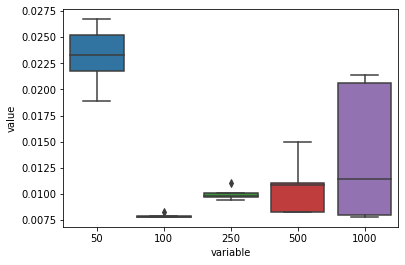

In [51]:
g = sns.boxplot(x='variable', y='value', data=df_melted) #100

In [54]:
dic = {}
for i in [65,70,75,80,90]:
    train_size = int(len(ds) * i/100) 
    train_dataset, test_dataset = ds[0:train_size,:], ds[train_size:len(ds),:]
    dic[i] = exp(6,5,128,100,7)
    df_1 = pd.DataFrame(dic)
df_melted = pd.melt(df_1)

Model: "sequential_313"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_313 (LSTM)             (None, 128)               66560     
                                                                 
 dense_400 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 - 2s - loss: 2.7947 - 2s/epoch - 406ms/step
Epoch 2/100
4/4 - 0s - loss: 1.3269 - 45ms/epoch - 11ms/step
Epoch 3/100
4/4 - 0s - loss: 0.3423 - 38ms/epoch - 9ms/step
Epoch 4/100
4/4 - 0s - loss: 0.0314 - 43ms/epoch - 11ms/step
Epoch 5/100
4/4 - 0s - loss: 0.2147 - 37ms/epoch - 9ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0850 - 42ms/epoch - 10ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0034 - 39ms/epoch - 10ms/step
Epoch 8/100
4/4 - 0s

4/4 - 0s - loss: 0.1404 - 41ms/epoch - 10ms/step
Epoch 4/100
4/4 - 0s - loss: 0.0872 - 39ms/epoch - 10ms/step
Epoch 5/100
4/4 - 0s - loss: 0.1546 - 35ms/epoch - 9ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0162 - 37ms/epoch - 9ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0191 - 37ms/epoch - 9ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0427 - 35ms/epoch - 9ms/step
Epoch 9/100
4/4 - 0s - loss: 0.0248 - 34ms/epoch - 8ms/step
Epoch 10/100
4/4 - 0s - loss: 0.0029 - 36ms/epoch - 9ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0057 - 37ms/epoch - 9ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0089 - 34ms/epoch - 8ms/step
Epoch 13/100
4/4 - 0s - loss: 0.0025 - 35ms/epoch - 9ms/step
Epoch 14/100
4/4 - 0s - loss: 0.0014 - 34ms/epoch - 9ms/step
Epoch 15/100
4/4 - 0s - loss: 0.0031 - 34ms/epoch - 8ms/step
Epoch 16/100
4/4 - 0s - loss: 0.0019 - 34ms/epoch - 8ms/step
Epoch 17/100
4/4 - 0s - loss: 8.9310e-04 - 32ms/epoch - 8ms/step
Epoch 18/100
4/4 - 0s - loss: 0.0015 - 33ms/epoch - 8ms/step
Epoch 19/100
4/4 - 0s - loss: 0.0012 

Epoch 18/100
4/4 - 0s - loss: 0.0011 - 29ms/epoch - 7ms/step
Epoch 19/100
4/4 - 0s - loss: 0.0010 - 29ms/epoch - 7ms/step
Epoch 20/100
4/4 - 0s - loss: 0.0014 - 28ms/epoch - 7ms/step
Epoch 21/100
4/4 - 0s - loss: 0.0010 - 30ms/epoch - 7ms/step
Epoch 22/100
4/4 - 0s - loss: 8.3921e-04 - 29ms/epoch - 7ms/step
Epoch 23/100
4/4 - 0s - loss: 0.0010 - 28ms/epoch - 7ms/step
Epoch 24/100
4/4 - 0s - loss: 9.3308e-04 - 28ms/epoch - 7ms/step
Epoch 25/100
4/4 - 0s - loss: 8.3785e-04 - 29ms/epoch - 7ms/step
Epoch 26/100
4/4 - 0s - loss: 8.2156e-04 - 28ms/epoch - 7ms/step
Epoch 27/100
4/4 - 0s - loss: 8.0402e-04 - 28ms/epoch - 7ms/step
Epoch 28/100
4/4 - 0s - loss: 7.9459e-04 - 28ms/epoch - 7ms/step
Epoch 29/100
4/4 - 0s - loss: 8.0723e-04 - 28ms/epoch - 7ms/step
Epoch 30/100
4/4 - 0s - loss: 7.9660e-04 - 29ms/epoch - 7ms/step
Epoch 31/100
4/4 - 0s - loss: 7.9560e-04 - 30ms/epoch - 7ms/step
Epoch 32/100
4/4 - 0s - loss: 7.8477e-04 - 26ms/epoch - 6ms/step
Epoch 33/100
4/4 - 0s - loss: 7.8101e-04 - 29

Epoch 32/100
4/4 - 0s - loss: 7.8457e-04 - 33ms/epoch - 8ms/step
Epoch 33/100
4/4 - 0s - loss: 7.4342e-04 - 31ms/epoch - 8ms/step
Epoch 34/100
4/4 - 0s - loss: 7.4731e-04 - 32ms/epoch - 8ms/step
Epoch 35/100
4/4 - 0s - loss: 7.4370e-04 - 33ms/epoch - 8ms/step
Epoch 36/100
4/4 - 0s - loss: 7.3418e-04 - 32ms/epoch - 8ms/step
Epoch 37/100
4/4 - 0s - loss: 7.3121e-04 - 32ms/epoch - 8ms/step
Epoch 38/100
4/4 - 0s - loss: 7.2836e-04 - 33ms/epoch - 8ms/step
Epoch 39/100
4/4 - 0s - loss: 7.2610e-04 - 32ms/epoch - 8ms/step
Epoch 40/100
4/4 - 0s - loss: 7.3724e-04 - 32ms/epoch - 8ms/step
Epoch 41/100
4/4 - 0s - loss: 7.2845e-04 - 32ms/epoch - 8ms/step
Epoch 42/100
4/4 - 0s - loss: 7.1071e-04 - 33ms/epoch - 8ms/step
Epoch 43/100
4/4 - 0s - loss: 7.2067e-04 - 33ms/epoch - 8ms/step
Epoch 44/100
4/4 - 0s - loss: 7.0352e-04 - 33ms/epoch - 8ms/step
Epoch 45/100
4/4 - 0s - loss: 7.5151e-04 - 33ms/epoch - 8ms/step
Epoch 46/100
4/4 - 0s - loss: 7.4526e-04 - 32ms/epoch - 8ms/step
Epoch 47/100
4/4 - 0s - l

Epoch 46/100
4/4 - 0s - loss: 7.3191e-04 - 37ms/epoch - 9ms/step
Epoch 47/100
4/4 - 0s - loss: 7.4580e-04 - 34ms/epoch - 8ms/step
Epoch 48/100
4/4 - 0s - loss: 7.2429e-04 - 32ms/epoch - 8ms/step
Epoch 49/100
4/4 - 0s - loss: 7.1690e-04 - 36ms/epoch - 9ms/step
Epoch 50/100
4/4 - 0s - loss: 7.1480e-04 - 36ms/epoch - 9ms/step
Epoch 51/100
4/4 - 0s - loss: 7.0917e-04 - 35ms/epoch - 9ms/step
Epoch 52/100
4/4 - 0s - loss: 7.0232e-04 - 37ms/epoch - 9ms/step
Epoch 53/100
4/4 - 0s - loss: 7.2417e-04 - 37ms/epoch - 9ms/step
Epoch 54/100
4/4 - 0s - loss: 7.1197e-04 - 44ms/epoch - 11ms/step
Epoch 55/100
4/4 - 0s - loss: 6.9469e-04 - 39ms/epoch - 10ms/step
Epoch 56/100
4/4 - 0s - loss: 6.9607e-04 - 42ms/epoch - 10ms/step
Epoch 57/100
4/4 - 0s - loss: 7.0576e-04 - 40ms/epoch - 10ms/step
Epoch 58/100
4/4 - 0s - loss: 6.9870e-04 - 42ms/epoch - 10ms/step
Epoch 59/100
4/4 - 0s - loss: 6.8304e-04 - 41ms/epoch - 10ms/step
Epoch 60/100
4/4 - 0s - loss: 6.6765e-04 - 42ms/epoch - 10ms/step
Epoch 61/100
4/4 -

Epoch 59/100
4/4 - 0s - loss: 7.3578e-04 - 38ms/epoch - 9ms/step
Epoch 60/100
4/4 - 0s - loss: 7.5649e-04 - 36ms/epoch - 9ms/step
Epoch 61/100
4/4 - 0s - loss: 7.0912e-04 - 35ms/epoch - 9ms/step
Epoch 62/100
4/4 - 0s - loss: 6.9959e-04 - 37ms/epoch - 9ms/step
Epoch 63/100
4/4 - 0s - loss: 6.9876e-04 - 37ms/epoch - 9ms/step
Epoch 64/100
4/4 - 0s - loss: 6.9341e-04 - 38ms/epoch - 9ms/step
Epoch 65/100
4/4 - 0s - loss: 6.8081e-04 - 37ms/epoch - 9ms/step
Epoch 66/100
4/4 - 0s - loss: 6.7643e-04 - 36ms/epoch - 9ms/step
Epoch 67/100
4/4 - 0s - loss: 6.6594e-04 - 40ms/epoch - 10ms/step
Epoch 68/100
4/4 - 0s - loss: 6.7537e-04 - 37ms/epoch - 9ms/step
Epoch 69/100
4/4 - 0s - loss: 6.6516e-04 - 37ms/epoch - 9ms/step
Epoch 70/100
4/4 - 0s - loss: 6.6006e-04 - 38ms/epoch - 9ms/step
Epoch 71/100
4/4 - 0s - loss: 6.5490e-04 - 37ms/epoch - 9ms/step
Epoch 72/100
4/4 - 0s - loss: 6.4311e-04 - 36ms/epoch - 9ms/step
Epoch 73/100
4/4 - 0s - loss: 6.3401e-04 - 40ms/epoch - 10ms/step
Epoch 74/100
4/4 - 0s -

4/4 - 0s - loss: 6.1200e-04 - 37ms/epoch - 9ms/step
Epoch 73/100
4/4 - 0s - loss: 6.0250e-04 - 37ms/epoch - 9ms/step
Epoch 74/100
4/4 - 0s - loss: 5.9966e-04 - 35ms/epoch - 9ms/step
Epoch 75/100
4/4 - 0s - loss: 5.9852e-04 - 37ms/epoch - 9ms/step
Epoch 76/100
4/4 - 0s - loss: 5.8632e-04 - 36ms/epoch - 9ms/step
Epoch 77/100
4/4 - 0s - loss: 5.8780e-04 - 37ms/epoch - 9ms/step
Epoch 78/100
4/4 - 0s - loss: 5.8450e-04 - 36ms/epoch - 9ms/step
Epoch 79/100
4/4 - 0s - loss: 5.8014e-04 - 37ms/epoch - 9ms/step
Epoch 80/100
4/4 - 0s - loss: 5.7226e-04 - 37ms/epoch - 9ms/step
Epoch 81/100
4/4 - 0s - loss: 5.6447e-04 - 37ms/epoch - 9ms/step
Epoch 82/100
4/4 - 0s - loss: 5.6017e-04 - 37ms/epoch - 9ms/step
Epoch 83/100
4/4 - 0s - loss: 5.5834e-04 - 36ms/epoch - 9ms/step
Epoch 84/100
4/4 - 0s - loss: 5.5766e-04 - 40ms/epoch - 10ms/step
Epoch 85/100
4/4 - 0s - loss: 5.5129e-04 - 35ms/epoch - 9ms/step
Epoch 86/100
4/4 - 0s - loss: 5.5003e-04 - 36ms/epoch - 9ms/step
Epoch 87/100
4/4 - 0s - loss: 5.3758e

Epoch 87/100
4/4 - 0s - loss: 6.1485e-04 - 36ms/epoch - 9ms/step
Epoch 88/100
4/4 - 0s - loss: 6.1134e-04 - 36ms/epoch - 9ms/step
Epoch 89/100
4/4 - 0s - loss: 6.0235e-04 - 38ms/epoch - 9ms/step
Epoch 90/100
4/4 - 0s - loss: 5.9214e-04 - 36ms/epoch - 9ms/step
Epoch 91/100
4/4 - 0s - loss: 5.9573e-04 - 35ms/epoch - 9ms/step
Epoch 92/100
4/4 - 0s - loss: 5.7717e-04 - 35ms/epoch - 9ms/step
Epoch 93/100
4/4 - 0s - loss: 5.7980e-04 - 37ms/epoch - 9ms/step
Epoch 94/100
4/4 - 0s - loss: 5.8400e-04 - 36ms/epoch - 9ms/step
Epoch 95/100
4/4 - 0s - loss: 5.6020e-04 - 35ms/epoch - 9ms/step
Epoch 96/100
4/4 - 0s - loss: 5.5953e-04 - 34ms/epoch - 8ms/step
Epoch 97/100
4/4 - 0s - loss: 5.5714e-04 - 36ms/epoch - 9ms/step
Epoch 98/100
4/4 - 0s - loss: 5.4680e-04 - 35ms/epoch - 9ms/step
Epoch 99/100
4/4 - 0s - loss: 5.4049e-04 - 36ms/epoch - 9ms/step
Epoch 100/100
4/4 - 0s - loss: 5.3781e-04 - 34ms/epoch - 8ms/step
4/4 [==============================] - 0s 4ms/step - loss: 5.2724e-04
Train Score: 0.0005

4/4 [==============================] - 0s 4ms/step - loss: 4.5734e-04
Train Score: 0.0005 MSE (0.02139 RMSE)
2/2 [==============================] - 0s 5ms/step - loss: 3.6036e-04
Test Score: 0.0004 MSE (0.01898 RMSE)
Model: "sequential_322"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_322 (LSTM)             (None, 128)               66560     
                                                                 
 dense_409 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 - 2s - loss: 2.0310 - 2s/epoch - 514ms/step
Epoch 2/100
4/4 - 0s - loss: 0.8563 - 40ms/epoch - 10ms/step
Epoch 3/100
4/4 - 0s - loss: 0.1124 - 37ms/epoch - 9ms/step
Epoch 4/100
4/4 - 0s - loss: 0.1442 - 39ms/epo

Epoch 1/100
4/4 - 2s - loss: 2.1378 - 2s/epoch - 452ms/step
Epoch 2/100
4/4 - 0s - loss: 0.8717 - 37ms/epoch - 9ms/step
Epoch 3/100
4/4 - 0s - loss: 0.1129 - 38ms/epoch - 9ms/step
Epoch 4/100
4/4 - 0s - loss: 0.1402 - 38ms/epoch - 9ms/step
Epoch 5/100
4/4 - 0s - loss: 0.1573 - 41ms/epoch - 10ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0137 - 37ms/epoch - 9ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0247 - 38ms/epoch - 9ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0477 - 40ms/epoch - 10ms/step
Epoch 9/100
4/4 - 0s - loss: 0.0271 - 37ms/epoch - 9ms/step
Epoch 10/100
4/4 - 0s - loss: 0.0033 - 36ms/epoch - 9ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0054 - 36ms/epoch - 9ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0102 - 37ms/epoch - 9ms/step
Epoch 13/100
4/4 - 0s - loss: 0.0036 - 37ms/epoch - 9ms/step
Epoch 14/100
4/4 - 0s - loss: 0.0012 - 41ms/epoch - 10ms/step
Epoch 15/100
4/4 - 0s - loss: 0.0030 - 37ms/epoch - 9ms/step
Epoch 16/100
4/4 - 0s - loss: 0.0023 - 36ms/epoch - 9ms/step
Epoch 17/100
4/4 - 0s - loss: 

Epoch 16/100
4/4 - 0s - loss: 0.0028 - 35ms/epoch - 9ms/step
Epoch 17/100
4/4 - 0s - loss: 0.0011 - 35ms/epoch - 9ms/step
Epoch 18/100
4/4 - 0s - loss: 0.0012 - 35ms/epoch - 9ms/step
Epoch 19/100
4/4 - 0s - loss: 0.0015 - 35ms/epoch - 9ms/step
Epoch 20/100
4/4 - 0s - loss: 9.7298e-04 - 38ms/epoch - 9ms/step
Epoch 21/100
4/4 - 0s - loss: 9.2232e-04 - 36ms/epoch - 9ms/step
Epoch 22/100
4/4 - 0s - loss: 0.0011 - 35ms/epoch - 9ms/step
Epoch 23/100
4/4 - 0s - loss: 9.2676e-04 - 36ms/epoch - 9ms/step
Epoch 24/100
4/4 - 0s - loss: 8.5847e-04 - 36ms/epoch - 9ms/step
Epoch 25/100
4/4 - 0s - loss: 9.0474e-04 - 36ms/epoch - 9ms/step
Epoch 26/100
4/4 - 0s - loss: 8.8391e-04 - 35ms/epoch - 9ms/step
Epoch 27/100
4/4 - 0s - loss: 8.4052e-04 - 34ms/epoch - 8ms/step
Epoch 28/100
4/4 - 0s - loss: 8.4461e-04 - 35ms/epoch - 9ms/step
Epoch 29/100
4/4 - 0s - loss: 8.3278e-04 - 35ms/epoch - 9ms/step
Epoch 30/100
4/4 - 0s - loss: 8.2203e-04 - 36ms/epoch - 9ms/step
Epoch 31/100
4/4 - 0s - loss: 8.1858e-04 - 36

Epoch 31/100
4/4 - 0s - loss: 0.0011 - 35ms/epoch - 9ms/step
Epoch 32/100
4/4 - 0s - loss: 0.0011 - 33ms/epoch - 8ms/step
Epoch 33/100
4/4 - 0s - loss: 0.0011 - 33ms/epoch - 8ms/step
Epoch 34/100
4/4 - 0s - loss: 0.0010 - 34ms/epoch - 8ms/step
Epoch 35/100
4/4 - 0s - loss: 0.0010 - 33ms/epoch - 8ms/step
Epoch 36/100
4/4 - 0s - loss: 0.0010 - 32ms/epoch - 8ms/step
Epoch 37/100
4/4 - 0s - loss: 0.0010 - 33ms/epoch - 8ms/step
Epoch 38/100
4/4 - 0s - loss: 0.0010 - 32ms/epoch - 8ms/step
Epoch 39/100
4/4 - 0s - loss: 9.9672e-04 - 32ms/epoch - 8ms/step
Epoch 40/100
4/4 - 0s - loss: 0.0010 - 32ms/epoch - 8ms/step
Epoch 41/100
4/4 - 0s - loss: 9.8126e-04 - 32ms/epoch - 8ms/step
Epoch 42/100
4/4 - 0s - loss: 9.6868e-04 - 32ms/epoch - 8ms/step
Epoch 43/100
4/4 - 0s - loss: 9.6951e-04 - 33ms/epoch - 8ms/step
Epoch 44/100
4/4 - 0s - loss: 9.5195e-04 - 32ms/epoch - 8ms/step
Epoch 45/100
4/4 - 0s - loss: 9.4454e-04 - 32ms/epoch - 8ms/step
Epoch 46/100
4/4 - 0s - loss: 9.3058e-04 - 33ms/epoch - 8ms/s

4/4 - 0s - loss: 7.8026e-04 - 33ms/epoch - 8ms/step
Epoch 46/100
4/4 - 0s - loss: 7.7370e-04 - 34ms/epoch - 8ms/step
Epoch 47/100
4/4 - 0s - loss: 7.7177e-04 - 34ms/epoch - 8ms/step
Epoch 48/100
4/4 - 0s - loss: 7.6281e-04 - 34ms/epoch - 8ms/step
Epoch 49/100
4/4 - 0s - loss: 7.4789e-04 - 33ms/epoch - 8ms/step
Epoch 50/100
4/4 - 0s - loss: 7.4612e-04 - 34ms/epoch - 8ms/step
Epoch 51/100
4/4 - 0s - loss: 7.3511e-04 - 34ms/epoch - 8ms/step
Epoch 52/100
4/4 - 0s - loss: 7.2398e-04 - 34ms/epoch - 8ms/step
Epoch 53/100
4/4 - 0s - loss: 7.1750e-04 - 34ms/epoch - 8ms/step
Epoch 54/100
4/4 - 0s - loss: 7.0874e-04 - 33ms/epoch - 8ms/step
Epoch 55/100
4/4 - 0s - loss: 7.0666e-04 - 34ms/epoch - 8ms/step
Epoch 56/100
4/4 - 0s - loss: 6.9797e-04 - 33ms/epoch - 8ms/step
Epoch 57/100
4/4 - 0s - loss: 6.9460e-04 - 32ms/epoch - 8ms/step
Epoch 58/100
4/4 - 0s - loss: 6.8022e-04 - 33ms/epoch - 8ms/step
Epoch 59/100
4/4 - 0s - loss: 6.7195e-04 - 32ms/epoch - 8ms/step
Epoch 60/100
4/4 - 0s - loss: 6.6420e-

Epoch 59/100
4/4 - 0s - loss: 6.4987e-04 - 31ms/epoch - 8ms/step
Epoch 60/100
4/4 - 0s - loss: 6.4706e-04 - 31ms/epoch - 8ms/step
Epoch 61/100
4/4 - 0s - loss: 6.3776e-04 - 32ms/epoch - 8ms/step
Epoch 62/100
4/4 - 0s - loss: 6.4142e-04 - 32ms/epoch - 8ms/step
Epoch 63/100
4/4 - 0s - loss: 6.2803e-04 - 32ms/epoch - 8ms/step
Epoch 64/100
4/4 - 0s - loss: 6.2810e-04 - 33ms/epoch - 8ms/step
Epoch 65/100
4/4 - 0s - loss: 6.3495e-04 - 33ms/epoch - 8ms/step
Epoch 66/100
4/4 - 0s - loss: 6.0099e-04 - 32ms/epoch - 8ms/step
Epoch 67/100
4/4 - 0s - loss: 5.9778e-04 - 32ms/epoch - 8ms/step
Epoch 68/100
4/4 - 0s - loss: 5.9309e-04 - 33ms/epoch - 8ms/step
Epoch 69/100
4/4 - 0s - loss: 5.8304e-04 - 32ms/epoch - 8ms/step
Epoch 70/100
4/4 - 0s - loss: 5.7738e-04 - 33ms/epoch - 8ms/step
Epoch 71/100
4/4 - 0s - loss: 5.7944e-04 - 33ms/epoch - 8ms/step
Epoch 72/100
4/4 - 0s - loss: 5.7086e-04 - 32ms/epoch - 8ms/step
Epoch 73/100
4/4 - 0s - loss: 5.6535e-04 - 31ms/epoch - 8ms/step
Epoch 74/100
4/4 - 0s - l

Epoch 72/100
4/4 - 0s - loss: 4.9064e-04 - 38ms/epoch - 9ms/step
Epoch 73/100
4/4 - 0s - loss: 4.7825e-04 - 39ms/epoch - 10ms/step
Epoch 74/100
4/4 - 0s - loss: 4.8393e-04 - 36ms/epoch - 9ms/step
Epoch 75/100
4/4 - 0s - loss: 4.6906e-04 - 40ms/epoch - 10ms/step
Epoch 76/100
4/4 - 0s - loss: 4.6947e-04 - 37ms/epoch - 9ms/step
Epoch 77/100
4/4 - 0s - loss: 4.6008e-04 - 35ms/epoch - 9ms/step
Epoch 78/100
4/4 - 0s - loss: 4.5623e-04 - 38ms/epoch - 9ms/step
Epoch 79/100
4/4 - 0s - loss: 4.5264e-04 - 39ms/epoch - 10ms/step
Epoch 80/100
4/4 - 0s - loss: 4.4555e-04 - 39ms/epoch - 10ms/step
Epoch 81/100
4/4 - 0s - loss: 4.4420e-04 - 38ms/epoch - 9ms/step
Epoch 82/100
4/4 - 0s - loss: 4.3855e-04 - 37ms/epoch - 9ms/step
Epoch 83/100
4/4 - 0s - loss: 4.3475e-04 - 38ms/epoch - 9ms/step
Epoch 84/100
4/4 - 0s - loss: 4.3164e-04 - 38ms/epoch - 9ms/step
Epoch 85/100
4/4 - 0s - loss: 4.2494e-04 - 37ms/epoch - 9ms/step
Epoch 86/100
4/4 - 0s - loss: 4.2445e-04 - 39ms/epoch - 10ms/step
Epoch 87/100
4/4 - 0

Epoch 86/100
4/4 - 0s - loss: 5.3334e-04 - 37ms/epoch - 9ms/step
Epoch 87/100
4/4 - 0s - loss: 5.2318e-04 - 39ms/epoch - 10ms/step
Epoch 88/100
4/4 - 0s - loss: 5.2644e-04 - 36ms/epoch - 9ms/step
Epoch 89/100
4/4 - 0s - loss: 5.1062e-04 - 38ms/epoch - 9ms/step
Epoch 90/100
4/4 - 0s - loss: 5.0363e-04 - 38ms/epoch - 9ms/step
Epoch 91/100
4/4 - 0s - loss: 5.0312e-04 - 36ms/epoch - 9ms/step
Epoch 92/100
4/4 - 0s - loss: 4.9215e-04 - 39ms/epoch - 10ms/step
Epoch 93/100
4/4 - 0s - loss: 4.9165e-04 - 38ms/epoch - 9ms/step
Epoch 94/100
4/4 - 0s - loss: 4.9644e-04 - 41ms/epoch - 10ms/step
Epoch 95/100
4/4 - 0s - loss: 4.7857e-04 - 37ms/epoch - 9ms/step
Epoch 96/100
4/4 - 0s - loss: 4.8550e-04 - 36ms/epoch - 9ms/step
Epoch 97/100
4/4 - 0s - loss: 4.7082e-04 - 39ms/epoch - 10ms/step
Epoch 98/100
4/4 - 0s - loss: 4.6526e-04 - 37ms/epoch - 9ms/step
Epoch 99/100
4/4 - 0s - loss: 4.5527e-04 - 36ms/epoch - 9ms/step
Epoch 100/100
4/4 - 0s - loss: 4.5216e-04 - 38ms/epoch - 9ms/step
4/4 [===============

Epoch 99/100
4/4 - 0s - loss: 3.9643e-04 - 38ms/epoch - 9ms/step
Epoch 100/100
4/4 - 0s - loss: 3.8363e-04 - 36ms/epoch - 9ms/step
4/4 [==============================] - 0s 4ms/step - loss: 3.8290e-04
Train Score: 0.0004 MSE (0.01957 RMSE)
1/1 [==============================] - 0s 21ms/step - loss: 1.8621e-04
Test Score: 0.0002 MSE (0.01365 RMSE)
Model: "sequential_331"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_331 (LSTM)             (None, 128)               66560     
                                                                 
 dense_418 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 - 2s - loss: 2.0699 - 2s/epoch - 440ms/step
Epoch 2/100
4/4 - 0s - loss: 0.8671

Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 - 2s - loss: 2.6717 - 2s/epoch - 437ms/step
Epoch 2/100
4/4 - 0s - loss: 1.3242 - 34ms/epoch - 8ms/step
Epoch 3/100
4/4 - 0s - loss: 0.4240 - 35ms/epoch - 9ms/step
Epoch 4/100
4/4 - 0s - loss: 0.0315 - 34ms/epoch - 8ms/step
Epoch 5/100
4/4 - 0s - loss: 0.1592 - 33ms/epoch - 8ms/step
Epoch 6/100
4/4 - 0s - loss: 0.1105 - 33ms/epoch - 8ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0091 - 32ms/epoch - 8ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0173 - 32ms/epoch - 8ms/step
Epoch 9/100
4/4 - 0s - loss: 0.0368 - 32ms/epoch - 8ms/step
Epoch 10/100
4/4 - 0s - loss: 0.0247 - 31ms/epoch - 8ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0050 - 33ms/epoch - 8ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0028 - 33ms/epoch - 8ms/step
Epoch 13/100
4/4 - 0s - loss: 0.0078 - 31ms/epoch - 8ms/step
Epoch 14/100
4/4 - 0s - loss: 0.0051 - 30ms/epoch - 7ms/step
Epoch 15/100
4/4 - 

Epoch 14/100
5/5 - 0s - loss: 0.0019 - 47ms/epoch - 9ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0019 - 47ms/epoch - 9ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0018 - 44ms/epoch - 9ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0015 - 43ms/epoch - 9ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0016 - 46ms/epoch - 9ms/step
Epoch 19/100
5/5 - 0s - loss: 0.0015 - 46ms/epoch - 9ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0015 - 44ms/epoch - 9ms/step
Epoch 21/100
5/5 - 0s - loss: 0.0014 - 42ms/epoch - 8ms/step
Epoch 22/100
5/5 - 0s - loss: 0.0013 - 45ms/epoch - 9ms/step
Epoch 23/100
5/5 - 0s - loss: 0.0013 - 46ms/epoch - 9ms/step
Epoch 24/100
5/5 - 0s - loss: 0.0013 - 43ms/epoch - 9ms/step
Epoch 25/100
5/5 - 0s - loss: 0.0013 - 42ms/epoch - 8ms/step
Epoch 26/100
5/5 - 0s - loss: 0.0012 - 46ms/epoch - 9ms/step
Epoch 27/100
5/5 - 0s - loss: 0.0012 - 44ms/epoch - 9ms/step
Epoch 28/100
5/5 - 0s - loss: 0.0012 - 43ms/epoch - 9ms/step
Epoch 29/100
5/5 - 0s - loss: 0.0012 - 45ms/epoch - 9ms/step
Epoch 30/100
5/5 - 0s - 

Epoch 29/100
5/5 - 0s - loss: 9.1754e-04 - 44ms/epoch - 9ms/step
Epoch 30/100
5/5 - 0s - loss: 8.8826e-04 - 43ms/epoch - 9ms/step
Epoch 31/100
5/5 - 0s - loss: 8.7041e-04 - 45ms/epoch - 9ms/step
Epoch 32/100
5/5 - 0s - loss: 8.6300e-04 - 45ms/epoch - 9ms/step
Epoch 33/100
5/5 - 0s - loss: 8.5093e-04 - 42ms/epoch - 8ms/step
Epoch 34/100
5/5 - 0s - loss: 8.0506e-04 - 42ms/epoch - 8ms/step
Epoch 35/100
5/5 - 0s - loss: 8.1959e-04 - 44ms/epoch - 9ms/step
Epoch 36/100
5/5 - 0s - loss: 7.7801e-04 - 42ms/epoch - 8ms/step
Epoch 37/100
5/5 - 0s - loss: 7.7398e-04 - 43ms/epoch - 9ms/step
Epoch 38/100
5/5 - 0s - loss: 7.4959e-04 - 43ms/epoch - 9ms/step
Epoch 39/100
5/5 - 0s - loss: 7.3823e-04 - 42ms/epoch - 8ms/step
Epoch 40/100
5/5 - 0s - loss: 7.2044e-04 - 42ms/epoch - 8ms/step
Epoch 41/100
5/5 - 0s - loss: 7.0449e-04 - 46ms/epoch - 9ms/step
Epoch 42/100
5/5 - 0s - loss: 6.9540e-04 - 42ms/epoch - 8ms/step
Epoch 43/100
5/5 - 0s - loss: 6.8786e-04 - 42ms/epoch - 8ms/step
Epoch 44/100
5/5 - 0s - l

Epoch 43/100
5/5 - 0s - loss: 7.3449e-04 - 45ms/epoch - 9ms/step
Epoch 44/100
5/5 - 0s - loss: 7.1865e-04 - 45ms/epoch - 9ms/step
Epoch 45/100
5/5 - 0s - loss: 7.0398e-04 - 41ms/epoch - 8ms/step
Epoch 46/100
5/5 - 0s - loss: 6.8926e-04 - 44ms/epoch - 9ms/step
Epoch 47/100
5/5 - 0s - loss: 6.7183e-04 - 44ms/epoch - 9ms/step
Epoch 48/100
5/5 - 0s - loss: 6.6389e-04 - 42ms/epoch - 8ms/step
Epoch 49/100
5/5 - 0s - loss: 6.4288e-04 - 45ms/epoch - 9ms/step
Epoch 50/100
5/5 - 0s - loss: 6.4312e-04 - 45ms/epoch - 9ms/step
Epoch 51/100
5/5 - 0s - loss: 6.2524e-04 - 42ms/epoch - 8ms/step
Epoch 52/100
5/5 - 0s - loss: 6.1550e-04 - 45ms/epoch - 9ms/step
Epoch 53/100
5/5 - 0s - loss: 5.9780e-04 - 45ms/epoch - 9ms/step
Epoch 54/100
5/5 - 0s - loss: 5.8117e-04 - 42ms/epoch - 8ms/step
Epoch 55/100
5/5 - 0s - loss: 5.6803e-04 - 42ms/epoch - 8ms/step
Epoch 56/100
5/5 - 0s - loss: 5.5948e-04 - 43ms/epoch - 9ms/step
Epoch 57/100
5/5 - 0s - loss: 5.4653e-04 - 43ms/epoch - 9ms/step
Epoch 58/100
5/5 - 0s - l

Epoch 57/100
5/5 - 0s - loss: 5.0496e-04 - 43ms/epoch - 9ms/step
Epoch 58/100
5/5 - 0s - loss: 4.9588e-04 - 44ms/epoch - 9ms/step
Epoch 59/100
5/5 - 0s - loss: 4.8744e-04 - 43ms/epoch - 9ms/step
Epoch 60/100
5/5 - 0s - loss: 4.7866e-04 - 41ms/epoch - 8ms/step
Epoch 61/100
5/5 - 0s - loss: 4.7473e-04 - 44ms/epoch - 9ms/step
Epoch 62/100
5/5 - 0s - loss: 4.6713e-04 - 41ms/epoch - 8ms/step
Epoch 63/100
5/5 - 0s - loss: 4.5952e-04 - 46ms/epoch - 9ms/step
Epoch 64/100
5/5 - 0s - loss: 4.5657e-04 - 43ms/epoch - 9ms/step
Epoch 65/100
5/5 - 0s - loss: 4.4858e-04 - 41ms/epoch - 8ms/step
Epoch 66/100
5/5 - 0s - loss: 4.3687e-04 - 44ms/epoch - 9ms/step
Epoch 67/100
5/5 - 0s - loss: 4.2936e-04 - 44ms/epoch - 9ms/step
Epoch 68/100
5/5 - 0s - loss: 4.2233e-04 - 43ms/epoch - 9ms/step
Epoch 69/100
5/5 - 0s - loss: 4.1605e-04 - 44ms/epoch - 9ms/step
Epoch 70/100
5/5 - 0s - loss: 4.1478e-04 - 44ms/epoch - 9ms/step
Epoch 71/100
5/5 - 0s - loss: 4.0430e-04 - 42ms/epoch - 8ms/step
Epoch 72/100
5/5 - 0s - l

5/5 - 0s - loss: 4.3676e-04 - 40ms/epoch - 8ms/step
Epoch 72/100
5/5 - 0s - loss: 4.2489e-04 - 42ms/epoch - 8ms/step
Epoch 73/100
5/5 - 0s - loss: 4.1981e-04 - 41ms/epoch - 8ms/step
Epoch 74/100
5/5 - 0s - loss: 4.1455e-04 - 39ms/epoch - 8ms/step
Epoch 75/100
5/5 - 0s - loss: 4.1161e-04 - 40ms/epoch - 8ms/step
Epoch 76/100
5/5 - 0s - loss: 4.1784e-04 - 40ms/epoch - 8ms/step
Epoch 77/100
5/5 - 0s - loss: 4.2211e-04 - 40ms/epoch - 8ms/step
Epoch 78/100
5/5 - 0s - loss: 3.8650e-04 - 40ms/epoch - 8ms/step
Epoch 79/100
5/5 - 0s - loss: 4.0858e-04 - 41ms/epoch - 8ms/step
Epoch 80/100
5/5 - 0s - loss: 3.7665e-04 - 40ms/epoch - 8ms/step
Epoch 81/100
5/5 - 0s - loss: 3.9139e-04 - 41ms/epoch - 8ms/step
Epoch 82/100
5/5 - 0s - loss: 3.6943e-04 - 39ms/epoch - 8ms/step
Epoch 83/100
5/5 - 0s - loss: 3.7426e-04 - 37ms/epoch - 7ms/step
Epoch 84/100
5/5 - 0s - loss: 3.8706e-04 - 40ms/epoch - 8ms/step
Epoch 85/100
5/5 - 0s - loss: 3.7132e-04 - 41ms/epoch - 8ms/step
Epoch 86/100
5/5 - 0s - loss: 3.6901e-

<AxesSubplot:xlabel='variable', ylabel='value'>

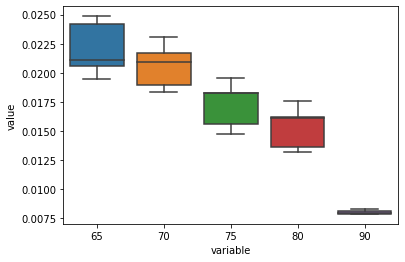

In [55]:
sns.boxplot(x='variable', y='value', data=df_melted) #90

In [56]:
dic

{65: [0.02109843363245231,
  0.020552662075928416,
  0.024151351807775927,
  0.02486201367739282,
  0.019430795514822546],
 70: [0.020924790174616573,
  0.021658792231344186,
  0.023103657223796998,
  0.018983208438711943,
  0.018344219558417085],
 75: [0.014693844474673232,
  0.018284838430738946,
  0.019509876000006882,
  0.018246605013283398,
  0.015556059026203262],
 80: [0.01321379141387262,
  0.017602786506839496,
  0.013645895687346345,
  0.016205154566637986,
  0.016072892737476384],
 90: [0.007862564416931221,
  0.008257426613558595,
  0.007847281977665755,
  0.008090815976503738,
  0.007946603160771604]}